In [1]:
import config
import pandas as pd
import numpy as np
from math import isnan
from scipy.spatial.distance import cosine
from read_and_write_functions import read_dataframe_from_csv_file
from read_and_write_functions import write_dataframe_to_csv_file
from computing_centroids import compute_centroid_from_sentence
from word_vectors_creating import create_word_vectors_with_word2vec
from compute_iwcs import compute_iwcs_from_sentence
from sklearn import preprocessing
from textblob import TextBlob
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt

[nltk_data] Downloading package punkt to /home/aram/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/aram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/aram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
ANSWERS_SCRAPPED_FROM_YELP_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_scrapped_from_yelp_with_wvc.csv"

ANSWERS_FROM_REVIEWS_WITH_IWCS_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_reviews_with_iwcs.csv"
ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_reviews_with_iwcs_and_bidaf.csv"
ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.csv"
#ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BERT_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_reviews_with_iwcs_and_bert.csv"
#ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert.csv"

ANSWERS_FROM_REVIEWS_WITH_TF_IDF_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_reviews_with_tf_idf.csv"
ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_reviews_with_tf_idf_and_bidaf.csv"
#ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BERT_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_reviews_with_tf_idf_and_bert.csv"

ANSWERS_FROM_REVIEWS_WITH_WV_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_reviews_with_wv_with_wvc.csv"
ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_reviews_with_wv_and_bidaf.csv"
ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.csv"
#ANSWERS_FROM_REVIEWS_WITH_WV_AND_BERT_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_reviews_with_wv_and_bert.csv"
#ANSWERS_FROM_REVIEWS_WITH_WV_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert.csv"

ANSWERS_FROM_TIPS_WITH_IWCS_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/answers_from_tips_with_iwcs.csv"
ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/answers_from_tips_with_iwcs_and_bidaf.csv"
ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.csv"
#ANSWERS_FROM_TIPS_WITH_IWCS_AND_BERT_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/answers_from_tips_with_iwcs_and_bert.csv"
#ANSWERS_FROM_TIPS_WITH_IWCS_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert.csv"

ANSWERS_FROM_TIPS_WITH_TF_IDF_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_tips_with_tf_idf.csv"
ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_tips_with_tf_idf_and_bidaf.csv"
#ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BERT_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_tips_with_tf_idf_and_bert.csv"

ANSWERS_FROM_TIPS_WITH_WV_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_tips_with_wv.csv"
ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_tips_with_wv_and_bidaf.csv"
ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.csv"
#ANSWERS_FROM_TIPS_WITH_WV_AND_BERT_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_tips_with_wv_and_bert.csv"
#ANSWERS_FROM_TIPS_WITH_WV_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_WITH_WVC_FILE_PATH = "../data/Analysis_of_answers/Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert.csv"

In [3]:
USER_RATED_ANSWERS_FROM_REVIEWS_WITH_IWCS_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_reviews_with_iwcs.csv"
USER_RATED_ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_reviews_with_iwcs_and_bidaf.csv"
USER_RATED_ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.csv"
#USER_RATED_ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BERT_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_reviews_with_iwcs_and_bert.csv"
#USER_RATED_ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert.csv"

USER_RATED_ANSWERS_FROM_REVIEWS_WITH_TF_IDF_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_reviews_with_tf_idf.csv"
USER_RATED_ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_reviews_with_tf_idf_and_bidaf.csv"
#USER_RATED_ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BERT_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_reviews_with_tf_idf_and_bert.csv"

USER_RATED_ANSWERS_FROM_REVIEWS_WITH_WV_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_reviews_with_wv.csv"
USER_RATED_ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_reviews_with_wv_and_bidaf.csv"
USER_RATED_ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.csv"
#USER_RATED_ANSWERS_FROM_REVIEWS_WITH_WV_AND_BERT_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_reviews_with_wv_and_bert.csv"
#USER_RATED_ANSWERS_FROM_REVIEWS_WITH_WV_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert.csv"

USER_RATED_ANSWERS_FROM_TIPS_WITH_IWCS_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_tips_with_iwcs.csv"
USER_RATED_ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_tips_with_iwcs_and_bidaf.csv"
USER_RATED_ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.csv"
#USER_RATED_ANSWERS_FROM_TIPS_WITH_IWCS_AND_BERT_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_tips_with_iwcs_and_bert.csv"
#USER_RATED_ANSWERS_FROM_TIPS_WITH_IWCS_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert.csv"

USER_RATED_ANSWERS_FROM_TIPS_WITH_TF_IDF_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_tips_with_tf_idf.csv"
USER_RATED_ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_tips_with_tf_idf_and_bidaf.csv"
#USER_RATED_ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BERT_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_tips_with_tf_idf_and_bert.csv"

USER_RATED_ANSWERS_FROM_TIPS_WITH_WV_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_tips_with_wv.csv"
USER_RATED_ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_tips_with_wv_and_bidaf.csv"
USER_RATED_ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.csv"
#USER_RATED_ANSWERS_FROM_TIPS_WITH_WV_AND_BERT_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_tips_with_wv_and_bert.csv"
#USER_RATED_ANSWERS_FROM_TIPS_WITH_WV_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_WITH_WVC_FILE_PATH = "../data/User_rating_of_answers/Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert.csv"

In [4]:
def normalize_similarities(dataframe, column_name = "similarity"):
    similarities_unscaled = dataframe[[column_name]].values.astype(float)
    similarities_scaled = min_max_scaler.fit_transform(similarities_unscaled)
    similarities_scaled = [similarity[0] for similarity in similarities_scaled]
    dataframe = dataframe.drop([column_name], axis=1)
    dataframe[column_name] = similarities_scaled
    
    return dataframe

In [5]:
def add_number_of_words_from_answers_to_dataframe(dataframe, with_execution_time = True):
    temp_list_of_question = []
    temp_list_of_businesses = []
    temp_list_of_answer = []
    temp_list_of_similarity = []
    temp_list_of_number_of_words = []
    temp_list_of_execution_time_in_sec = []
    
    for index, row in dataframe.iterrows():
        zen = TextBlob(row['answer'])
        number_of_words = len(zen.words)
        
        temp_list_of_question.append(row['question'])
        temp_list_of_businesses.append(row['business'])
        temp_list_of_answer.append(row['answer'])
        temp_list_of_similarity.append(row['similarity'])
        temp_list_of_number_of_words.append(number_of_words)
        if with_execution_time:
            temp_list_of_execution_time_in_sec.append(row['execution_time_in_sec'])
    
    if with_execution_time:
        raw_data = {'question':temp_list_of_question,
                    'business':temp_list_of_businesses,
                    'answer':temp_list_of_answer,
                    'similarity':temp_list_of_similarity,
                    'number_of_words':temp_list_of_number_of_words,
                    'execution_time_in_sec':temp_list_of_execution_time_in_sec
                   }

        dataframe = pd.DataFrame(
            raw_data,
            columns = ['question', 'business', 'answer', 'similarity', 'number_of_words', 'execution_time_in_sec'])
    else:
        raw_data = {'question':temp_list_of_question,
                    'business':temp_list_of_businesses,
                    'answer':temp_list_of_answer,
                    'similarity':temp_list_of_similarity,
                    'number_of_words':temp_list_of_number_of_words
                   }
        
        dataframe = pd.DataFrame(
            raw_data,
            columns = ['question', 'business', 'answer', 'similarity', 'number_of_words'])
    return dataframe

In [6]:
def preprocess_for_answers_scrapped_from_yelp(dataframe):
    temp_list_of_question = []
    temp_list_of_businesses = []
    temp_list_of_answer = []
    temp_list_of_similarity = []
    
    for index, row in dataframe.iterrows():
        temp_list_of_question.append(row['question'])
        
        temp_business_name = row['business']
        if " - Temporarily Closed" in temp_business_name:
            temp_business_name = temp_business_name.replace(" - Temporarily Closed", "")
        temp_list_of_businesses.append(temp_business_name)
        
        temp_list_of_answer.append(row['answer'])
        temp_list_of_similarity.append(row['similarity'])
    
    raw_data = {'question':temp_list_of_question,
                'business':temp_list_of_businesses,
                'answer':temp_list_of_answer,
                'similarity':temp_list_of_similarity
               }
    
    dataframe = pd.DataFrame(raw_data, columns = ['question', 'business', 'answer', 'similarity'])
    
    return dataframe

In [7]:
def compute_list_of_keys(yelp_questions_with_answers, computed_with_some_model_questions_with_answers):
    questions_from_some_model = computed_with_some_model_questions_with_answers["question"].tolist()
    businesses_from_some_model = computed_with_some_model_questions_with_answers["business"].tolist()

    questions_scrapped_from_yelp = yelp_questions_with_answers["question"].tolist()
    businesses_scrapped_from_yelp = yelp_questions_with_answers["business"].tolist()

    questions_and_businesses = []

    for question_comp, business_comp in zip(questions_from_some_model, businesses_from_some_model):
        for questions_scrapped, businesses_scrapped in zip(questions_scrapped_from_yelp, businesses_scrapped_from_yelp):
            if (question_comp == questions_scrapped) and (business_comp == businesses_scrapped):
                questions_and_businesses.append((question_comp, business_comp))
    
    return set(questions_and_businesses)

## Loading models and computed Answers that we will use ##

In [8]:
config.wv = create_word_vectors_with_word2vec()
config.index2word_set = set(config.wv.index2word)
min_max_scaler = preprocessing.MinMaxScaler()

In [9]:
Answers_scrapped_from_yelp = read_dataframe_from_csv_file(config.QUESTIONS_WITH_ANSWERS_FROM_YELP_FILE_PATH)
Answers_scrapped_from_yelp = Answers_scrapped_from_yelp.rename(columns = {"answer": "answer", 
                                  "business_name": "business", 
                                  "helpful": "similarity", "question": "question"})
clist = ['question', 'business', 'answer', 'similarity']
Answers_scrapped_from_yelp = Answers_scrapped_from_yelp[clist]
Answers_scrapped_from_yelp = preprocess_for_answers_scrapped_from_yelp(Answers_scrapped_from_yelp)

Answers_from_reviews_with_iwcs = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_REVIEWS_WITH_IWCS_FILE_PATH)
Answers_from_reviews_with_iwcs_and_bidaf = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_FILE_PATH)
Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_FILE_PATH)
#Answers_from_reviews_with_iwcs_and_bert = read_dataframe_from_csv_file(
#    config.ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BERT_FILE_PATH)
#Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert = read_dataframe_from_csv_file(
#    config.ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_FILE_PATH)

Answers_from_reviews_with_tf_idf = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_REVIEWS_WITH_TF_IDF_FILE_PATH)
Answers_from_reviews_with_tf_idf_and_bidaf = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BIDAF_FILE_PATH)
#Answers_from_reviews_with_tf_idf_and_bert = read_dataframe_from_csv_file(
#    config.ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BERT_FILE_PATH)

Answers_from_reviews_with_wv = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_REVIEWS_WITH_WV_FILE_PATH)
Answers_from_reviews_with_wv_and_bidaf = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_FILE_PATH)
Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = read_dataframe_from_csv_file(
     config.ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_FILE_PATH)
#Answers_from_reviews_with_wv_and_bert = read_dataframe_from_csv_file(
#    config.ANSWERS_FROM_REVIEWS_WITH_WV_AND_BERT_FILE_PATH)
#Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert = read_dataframe_from_csv_file(
#     config.ANSWERS_FROM_REVIEWS_WITH_WV_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_FILE_PATH)

Answers_from_tips_with_iwcs = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_TIPS_WITH_IWCS_FILE_PATH)
Answers_from_tips_with_iwcs_and_bidaf = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_FILE_PATH)
Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_FILE_PATH)
#Answers_from_tips_with_iwcs_and_bert = read_dataframe_from_csv_file(
#    config.ANSWERS_FROM_TIPS_WITH_IWCS_AND_BERT_FILE_PATH)
#Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert = read_dataframe_from_csv_file(
#    config.ANSWERS_FROM_TIPS_WITH_IWCS_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_FILE_PATH)

Answers_from_tips_with_tf_idf = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_TIPS_WITH_TF_IDF_FILE_PATH)
Answers_from_tips_with_tf_idf_and_bidaf = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BIDAF_FILE_PATH)
#Answers_from_tips_with_tf_idf_and_bert = read_dataframe_from_csv_file(
#    config.ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BERT_FILE_PATH)

Answers_from_tips_with_wv = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_TIPS_WITH_WV_FILE_PATH)
Answers_from_tips_with_wv_and_bidaf = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_FILE_PATH)
Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = read_dataframe_from_csv_file(
    config.ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_FILE_PATH)
#Answers_from_tips_with_wv_and_bert = read_dataframe_from_csv_file(
#    config.ANSWERS_FROM_TIPS_WITH_WV_AND_BERT_FILE_PATH)
#Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert = read_dataframe_from_csv_file(
#    config.ANSWERS_FROM_TIPS_WITH_WV_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_FILE_PATH)


In [10]:
column_names = ['question', 'business', 'answer', 'similarity', 'number_of_words']

Answers_scrapped_from_yelp = add_number_of_words_from_answers_to_dataframe(Answers_scrapped_from_yelp, False)
Answers_scrapped_from_yelp = Answers_scrapped_from_yelp.reindex(columns=column_names)

column_names = ['question', 'business', 'answer', 'similarity', 'number_of_words', 'execution_time_in_sec']

Answers_from_reviews_with_iwcs = add_number_of_words_from_answers_to_dataframe(Answers_from_reviews_with_iwcs)
Answers_from_reviews_with_iwcs = Answers_from_reviews_with_iwcs.reindex(columns=column_names)

Answers_from_reviews_with_iwcs_and_bidaf = add_number_of_words_from_answers_to_dataframe(Answers_from_reviews_with_iwcs_and_bidaf)
Answers_from_reviews_with_iwcs_and_bidaf = Answers_from_reviews_with_iwcs_and_bidaf.reindex(columns=column_names)

Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = add_number_of_words_from_answers_to_dataframe(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)
Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.reindex(columns=column_names)

#Answers_from_reviews_with_iwcs_and_bert = add_number_of_words_from_answers_to_dataframe(Answers_from_reviews_with_iwcs_and_bert)
#Answers_from_reviews_with_iwcs_and_bert = Answers_from_reviews_with_iwcs_and_bert.reindex(columns=column_names)

#Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert = add_number_of_words_from_answers_to_dataframe(Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert)
#Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert = Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert.reindex(columns=column_names)

Answers_from_reviews_with_tf_idf = add_number_of_words_from_answers_to_dataframe(Answers_from_reviews_with_tf_idf)
Answers_from_reviews_with_tf_idf = Answers_from_reviews_with_tf_idf.reindex(columns=column_names)

Answers_from_reviews_with_tf_idf_and_bidaf = add_number_of_words_from_answers_to_dataframe(Answers_from_reviews_with_tf_idf_and_bidaf)
Answers_from_reviews_with_tf_idf_and_bidaf = Answers_from_reviews_with_tf_idf_and_bidaf.reindex(columns=column_names)

#Answers_from_reviews_with_tf_idf_and_bert = add_number_of_words_from_answers_to_dataframe(Answers_from_reviews_with_tf_idf_and_bert)
#Answers_from_reviews_with_tf_idf_and_bert = Answers_from_reviews_with_tf_idf_and_bert.reindex(columns=column_names)

Answers_from_reviews_with_wv = add_number_of_words_from_answers_to_dataframe(Answers_from_reviews_with_wv)
Answers_from_reviews_with_wv = Answers_from_reviews_with_wv.reindex(columns=column_names)

Answers_from_reviews_with_wv_and_bidaf = add_number_of_words_from_answers_to_dataframe(Answers_from_reviews_with_wv_and_bidaf)
Answers_from_reviews_with_wv_and_bidaf = Answers_from_reviews_with_wv_and_bidaf.reindex(columns=column_names)

Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = add_number_of_words_from_answers_to_dataframe(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)
Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.reindex(columns=column_names)

#Answers_from_reviews_with_wv_and_bert = add_number_of_words_from_answers_to_dataframe(Answers_from_reviews_with_wv_and_bert)
#Answers_from_reviews_with_wv_and_bert = Answers_from_reviews_with_wv_and_bert.reindex(columns=column_names)

#Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert = add_number_of_words_from_answers_to_dataframe(Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert)
#Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert = Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert.reindex(columns=column_names)



Answers_from_tips_with_iwcs = add_number_of_words_from_answers_to_dataframe(Answers_from_tips_with_iwcs)
Answers_from_tips_with_iwcs = Answers_from_tips_with_iwcs.reindex(columns=column_names)

Answers_from_tips_with_iwcs_and_bidaf = add_number_of_words_from_answers_to_dataframe(Answers_from_tips_with_iwcs_and_bidaf)
Answers_from_tips_with_iwcs_and_bidaf = Answers_from_tips_with_iwcs_and_bidaf.reindex(columns=column_names)

Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = add_number_of_words_from_answers_to_dataframe(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)
Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.reindex(columns=column_names)

#Answers_from_tips_with_iwcs_and_bert = add_number_of_words_from_answers_to_dataframe(Answers_from_tips_with_iwcs_and_bert)
#Answers_from_tips_with_iwcs_and_bert = Answers_from_tips_with_iwcs_and_bert.reindex(columns=column_names)

#Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert = add_number_of_words_from_answers_to_dataframe(Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert)
#Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert = Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert.reindex(columns=column_names)

Answers_from_tips_with_tf_idf = add_number_of_words_from_answers_to_dataframe(Answers_from_tips_with_tf_idf)
Answers_from_tips_with_tf_idf = Answers_from_tips_with_tf_idf.reindex(columns=column_names)

Answers_from_tips_with_tf_idf_and_bidaf = add_number_of_words_from_answers_to_dataframe(Answers_from_tips_with_tf_idf_and_bidaf)
Answers_from_tips_with_tf_idf_and_bidaf = Answers_from_tips_with_tf_idf_and_bidaf.reindex(columns=column_names)

#Answers_from_tips_with_tf_idf_and_bert = add_number_of_words_from_answers_to_dataframe(Answers_from_tips_with_tf_idf_and_bert)
#Answers_from_tips_with_tf_idf_and_bert = Answers_from_tips_with_tf_idf_and_bert.reindex(columns=column_names)

Answers_from_tips_with_wv = add_number_of_words_from_answers_to_dataframe(Answers_from_tips_with_wv)
Answers_from_tips_with_wv = Answers_from_tips_with_wv.reindex(columns=column_names)

Answers_from_tips_with_wv_and_bidaf = add_number_of_words_from_answers_to_dataframe(Answers_from_tips_with_wv_and_bidaf)
Answers_from_tips_with_wv_and_bidaf = Answers_from_tips_with_wv_and_bidaf.reindex(columns=column_names)

Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = add_number_of_words_from_answers_to_dataframe(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)
Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.reindex(columns=column_names)

#Answers_from_tips_with_wv_and_bert = add_number_of_words_from_answers_to_dataframe(Answers_from_tips_with_wv_and_bert)
#Answers_from_tips_with_wv_and_bert = Answers_from_tips_with_wv_and_bert.reindex(columns=column_names)

#Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert = add_number_of_words_from_answers_to_dataframe(Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert)
#Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert = Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert.reindex(columns=column_names)

In [11]:
Answers_scrapped_from_yelp = normalize_similarities(Answers_scrapped_from_yelp)

Answers_from_reviews_with_tf_idf = normalize_similarities(
    Answers_from_reviews_with_tf_idf)

Answers_from_reviews_with_tf_idf_and_bidaf = normalize_similarities(
    Answers_from_reviews_with_tf_idf_and_bidaf)

#Answers_from_reviews_with_tf_idf_and_bert = normalize_similarities(
#    Answers_from_reviews_with_tf_idf_and_bert)

Answers_from_tips_with_tf_idf = normalize_similarities(
    Answers_from_tips_with_tf_idf)

Answers_from_tips_with_tf_idf_and_bidaf = normalize_similarities(
    Answers_from_tips_with_tf_idf_and_bidaf)

#Answers_from_tips_with_tf_idf_and_bert = normalize_similarities(
#    Answers_from_tips_with_tf_idf_and_bert)

In [12]:
def remove_answers_from_df_if_not_in_common_questions_list(dataframe, questions_list):
    temp_list_of_question = []
    temp_list_of_business = []
    temp_list_of_answer = []
    temp_list_of_number_of_words = []
    temp_list_of_execution_time_in_sec = []
    temp_list_of_similarity = []
    
    for index, row in dataframe.iterrows():
        if ([row["question"], row["business"]] in questions_list):
            temp_list_of_question.append(row['question'])
            temp_list_of_business.append(row['business'])
            temp_list_of_answer.append(row['answer'])
            temp_list_of_number_of_words.append(row['number_of_words'])
            temp_list_of_execution_time_in_sec.append(row['execution_time_in_sec'])
            temp_list_of_similarity.append(row['similarity'])
    
    raw_data = {'question':temp_list_of_question,
                'business':temp_list_of_business,
                'answer':temp_list_of_answer,
                'number_of_words':temp_list_of_number_of_words,
                'execution_time_in_sec':temp_list_of_execution_time_in_sec,
                'similarity':temp_list_of_similarity
               }
    
    dataframe = pd.DataFrame(raw_data, columns = ['question', 'business', 'answer', 'number_of_words', 'execution_time_in_sec', 'similarity'])
    
    return dataframe

In [13]:
def compute_questions_list(dataframe):
    dataframe_grouped = dataframe.groupby(['question', 'business'])
    questions_list = []
    
    for key, group in dataframe_grouped:
        #print(key)
        query = key[0]
        business = key[1]
        
        questions_list.append([query, business])
    
    return questions_list

def keep_only_common_questions_from_questions_list(user_rated_questions_list, new_user_rated_questions_list):
    temp_questions_list = []
    
    for x in new_user_rated_questions_list:
        if x in user_rated_questions_list:
            temp_questions_list.append(x)
    
    return temp_questions_list

In [14]:
common_questions_list = compute_questions_list(Answers_from_reviews_with_iwcs)
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_reviews_with_iwcs_and_bidaf))
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf))
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_reviews_with_tf_idf))
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_reviews_with_tf_idf_and_bidaf))
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_reviews_with_wv))
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_reviews_with_wv_and_bidaf))
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf))
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_tips_with_iwcs))
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_tips_with_iwcs_and_bidaf))
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf))
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_tips_with_tf_idf))
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_tips_with_tf_idf_and_bidaf))
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_tips_with_wv))
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_tips_with_wv_and_bidaf))
print(": " + str(len(common_questions_list)))

common_questions_list = keep_only_common_questions_from_questions_list(
    common_questions_list,
    compute_questions_list(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf))
print(": " + str(len(common_questions_list)))

print(len(common_questions_list))
common_questions_list

: 889
: 889
: 889
: 888
: 888
: 888
: 888
: 888
: 888
: 888
: 888
: 862
: 862
: 862
: 862
: 862
862


[['AYCE? Or ala carte?', 'Soho Japanese Restaurant'],
 ['About how much is the extra fees added up after paying for the hotel? Is the 40 dollars per night added to your total when you book?',
  'The LINQ Hotel & Casino'],
 ['Air conditioning inside the carriage?', 'High Roller'],
 ['All you can eat?', 'Gangnam Asian BBQ Dining'],
 ['All you can eat?', 'Soho Japanese Restaurant'],
 ['An you order and pick up, if so how long is that process? Thanks',
  'Little Miss BBQ'],
 ['Any discount by showing your players card?', 'Studio B Buffet'],
 ['Any dress code?', 'Eiffel Tower'],
 ['Any food allergy menu?', 'Wicked Spoon'],
 ['Any gluten free accomodations?', 'Meat & Potatoes'],
 ['Any kids pricing, between what age?', 'The Buffet at Bellagio'],
 ['Any locals know when they are going to open again?\n\nThanks for the updates on the closing...anyone other Thai restaurant recommendations since Lotus is closed?',
  'Lotus of Siam'],
 ['Any options for vegan or vegetarian diners? Trying to find a

In [15]:
print(len(Answers_from_reviews_with_iwcs))
print(len(Answers_from_reviews_with_iwcs_and_bidaf))
print(len(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf))

print(len(Answers_from_reviews_with_tf_idf))
print(len(Answers_from_reviews_with_tf_idf_and_bidaf))

print(len(Answers_from_reviews_with_wv))
print(len(Answers_from_reviews_with_wv_and_bidaf))
print(len(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf))

print(len(Answers_from_tips_with_iwcs))
print(len(Answers_from_tips_with_iwcs_and_bidaf))
print(len(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf))

print(len(Answers_from_tips_with_tf_idf))
print(len(Answers_from_tips_with_tf_idf_and_bidaf))

print(len(Answers_from_tips_with_wv))
print(len(Answers_from_tips_with_wv_and_bidaf))
print(len(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf))

4445
4445
4445
4438
4438
4445
4445
4445
4445
4442
4442
4159
4181
4445
4442
4442


In [16]:
print(len(Answers_from_reviews_with_iwcs.groupby(['question', 'business'])))
print(len(Answers_from_reviews_with_iwcs_and_bidaf.groupby(['question', 'business'])))
print(len(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

print(len(Answers_from_reviews_with_tf_idf.groupby(['question', 'business'])))
print(len(Answers_from_reviews_with_tf_idf_and_bidaf.groupby(['question', 'business'])))

print(len(Answers_from_reviews_with_wv.groupby(['question', 'business'])))
print(len(Answers_from_reviews_with_wv_and_bidaf.groupby(['question', 'business'])))
print(len(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

print(len(Answers_from_tips_with_iwcs.groupby(['question', 'business'])))
print(len(Answers_from_tips_with_iwcs_and_bidaf.groupby(['question', 'business'])))
print(len(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

print(len(Answers_from_tips_with_tf_idf.groupby(['question', 'business'])))
print(len(Answers_from_tips_with_tf_idf_and_bidaf.groupby(['question', 'business'])))

print(len(Answers_from_tips_with_wv.groupby(['question', 'business'])))
print(len(Answers_from_tips_with_wv_and_bidaf.groupby(['question', 'business'])))
print(len(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

889
889
889
888
888
889
889
889
889
889
889
862
866
889
889
889


In [17]:
Answers_from_reviews_with_iwcs = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_reviews_with_iwcs,
    common_questions_list)
Answers_from_reviews_with_iwcs_and_bidaf = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_reviews_with_iwcs_and_bidaf,
    common_questions_list)
Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf,
    common_questions_list)

Answers_from_reviews_with_tf_idf = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_reviews_with_tf_idf,
    common_questions_list)
Answers_from_reviews_with_tf_idf_and_bidaf = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_reviews_with_tf_idf_and_bidaf,
    common_questions_list)

Answers_from_reviews_with_wv = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_reviews_with_wv,
    common_questions_list)
Answers_from_reviews_with_wv_and_bidaf = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_reviews_with_wv_and_bidaf,
    common_questions_list)
Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf,
    common_questions_list)

Answers_from_tips_with_iwcs = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_tips_with_iwcs,
    common_questions_list)
Answers_from_tips_with_iwcs_and_bidaf = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_tips_with_iwcs_and_bidaf,
    common_questions_list)
Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf,
    common_questions_list)

Answers_from_tips_with_tf_idf = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_tips_with_tf_idf,
    common_questions_list)
Answers_from_tips_with_tf_idf_and_bidaf = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_tips_with_tf_idf_and_bidaf,
    common_questions_list)

Answers_from_tips_with_wv = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_tips_with_wv,
    common_questions_list)
Answers_from_tips_with_wv_and_bidaf = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_tips_with_wv_and_bidaf,
    common_questions_list)
Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = remove_answers_from_df_if_not_in_common_questions_list(
    Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf,
    common_questions_list)

In [18]:
print()
print("Answers_from_reviews_with_iwcs: " + str(len(Answers_from_reviews_with_iwcs)))
print("Answers_from_reviews_with_iwcs_and_bidaf: " + str(len(Answers_from_reviews_with_iwcs_and_bidaf)))
print("Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf: " + str(len(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)))

print("Answers_from_reviews_with_tf_idf: " + str(len(Answers_from_reviews_with_tf_idf)))
print("Answers_from_reviews_with_tf_idf_and_bidaf: " + str(len(Answers_from_reviews_with_tf_idf_and_bidaf)))

print("Answers_from_reviews_with_wv: " + str(len(Answers_from_reviews_with_wv)))
print("Answers_from_reviews_with_wv_and_bidaf: " + str(len(Answers_from_reviews_with_wv_and_bidaf)))
print("Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf: " + str(len(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)))

print("Answers_from_tips_with_iwcs: " + str(len(Answers_from_tips_with_iwcs)))
print("Answers_from_tips_with_iwcs_and_bidaf: " + str(len(Answers_from_tips_with_iwcs_and_bidaf)))
print("Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf: " + str(len(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)))

print("Answers_from_tips_with_tf_idf: " + str(len(Answers_from_tips_with_tf_idf)))
print("Answers_from_tips_with_tf_idf_and_bidaf: " + str(len(Answers_from_tips_with_tf_idf_and_bidaf)))

print("Answers_from_tips_with_wv: " + str(len(Answers_from_tips_with_wv)))
print("Answers_from_tips_with_wv_and_bidaf: " + str(len(Answers_from_tips_with_wv_and_bidaf)))
print("Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf: " + str(len(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)))


Answers_from_reviews_with_iwcs: 4310
Answers_from_reviews_with_iwcs_and_bidaf: 4310
Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf: 4310
Answers_from_reviews_with_tf_idf: 4308
Answers_from_reviews_with_tf_idf_and_bidaf: 4308
Answers_from_reviews_with_wv: 4310
Answers_from_reviews_with_wv_and_bidaf: 4310
Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf: 4310
Answers_from_tips_with_iwcs: 4310
Answers_from_tips_with_iwcs_and_bidaf: 4310
Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf: 4310
Answers_from_tips_with_tf_idf: 4159
Answers_from_tips_with_tf_idf_and_bidaf: 4177
Answers_from_tips_with_wv: 4310
Answers_from_tips_with_wv_and_bidaf: 4310
Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf: 4310


In [19]:
print(len(Answers_from_reviews_with_iwcs.groupby(['question', 'business'])))
print(len(Answers_from_reviews_with_iwcs_and_bidaf.groupby(['question', 'business'])))
print(len(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

print(len(Answers_from_reviews_with_tf_idf.groupby(['question', 'business'])))
print(len(Answers_from_reviews_with_tf_idf_and_bidaf.groupby(['question', 'business'])))

print(len(Answers_from_reviews_with_wv.groupby(['question', 'business'])))
print(len(Answers_from_reviews_with_wv_and_bidaf.groupby(['question', 'business'])))
print(len(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

print(len(Answers_from_tips_with_iwcs.groupby(['question', 'business'])))
print(len(Answers_from_tips_with_iwcs_and_bidaf.groupby(['question', 'business'])))
print(len(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

print(len(Answers_from_tips_with_tf_idf.groupby(['question', 'business'])))
print(len(Answers_from_tips_with_tf_idf_and_bidaf.groupby(['question', 'business'])))

print(len(Answers_from_tips_with_wv.groupby(['question', 'business'])))
print(len(Answers_from_tips_with_wv_and_bidaf.groupby(['question', 'business'])))
print(len(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

862
862
862
862
862
862
862
862
862
862
862
862
862
862
862
862


In [20]:
print(len(Answers_from_reviews_with_iwcs.groupby(['business'])))
print(len(Answers_from_reviews_with_iwcs_and_bidaf.groupby(['business'])))
print(len(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.groupby(['business'])))

print(len(Answers_from_reviews_with_tf_idf.groupby(['business'])))
print(len(Answers_from_reviews_with_tf_idf_and_bidaf.groupby(['business'])))

print(len(Answers_from_reviews_with_wv.groupby(['business'])))
print(len(Answers_from_reviews_with_wv_and_bidaf.groupby(['business'])))
print(len(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.groupby(['business'])))

print(len(Answers_from_tips_with_iwcs.groupby(['business'])))
print(len(Answers_from_tips_with_iwcs_and_bidaf.groupby(['business'])))
print(len(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.groupby(['business'])))

print(len(Answers_from_tips_with_tf_idf.groupby(['business'])))
print(len(Answers_from_tips_with_tf_idf_and_bidaf.groupby(['business'])))

print(len(Answers_from_tips_with_wv.groupby(['business'])))
print(len(Answers_from_tips_with_wv_and_bidaf.groupby(['business'])))
print(len(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.groupby(['business'])))

57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57


In [21]:
Answers_scrapped_from_yelp

,question,business,answer,number_of_words,similarity
0,I'm just trying to come here to eat... omg eve...,Bacchanal Buffet,Depending on your luck... this is all I can say,10,0.004065
1,I'm just trying to come here to eat... omg eve...,Bacchanal Buffet,Unfortunately nothing is free but you can grab...,40,0.004065
2,Are there fewer choices during the early bird ...,Bacchanal Buffet,"Mike , We don't offer crab legs for the early ...",32,0.016260
3,Are there fewer choices during the early bird ...,Bacchanal Buffet,"Crab legs yes for breakfast, prime rib I've on...",16,0.000000
4,Any food allergies menu?,The Buffet At Wynn,"No. During my visit, a chef was walking someon...",16,0.008130
...,...,...,...,...,...
2942,How much would the seafood buffet be on a Wedn...,The Buffet At Wynn,"Expect to pay at least $40.00 per person, depe...",13,0.000000
2943,Is their Vegan Pho actually Vegan? Veggie brot...,Pho Kim Long,It is really vegan and its delicious. If you w...,24,0.020325
2944,Is their Vegan Pho actually Vegan? Veggie brot...,Pho Kim Long,It is completely vegan. You can taste the diff...,12,0.008130
2945,Is their Vegan Pho actually Vegan? Veggie brot...,Pho Kim Long,Vegetarian,1,0.000000


In [22]:
Answers_from_reviews_with_iwcs

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,It comes with the NY steak but you can also or...,14,1.948145,0.605517
1,AYCE? Or ala carte?,Soho Japanese Restaurant,Their prices are super reasonable for ala kart.,8,1.948145,0.533492
2,AYCE? Or ala carte?,Soho Japanese Restaurant,Not that imitation crap....best sushi I've eve...,10,1.948145,0.468312
3,AYCE? Or ala carte?,Soho Japanese Restaurant,"lol\n\nYeah, those 5 stars are well-deserved !",7,1.948145,0.454926
4,AYCE? Or ala carte?,Soho Japanese Restaurant,"Terrific service, delicious sushi etc, etc etc.",7,1.948145,0.448699
...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"(Yes, we're a little older in age.",8,2.689606,0.692098
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,The lounge is kind of an older crowd but on da...,16,2.689606,0.678277
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"I think this is a place for an older crowd, bu...",23,2.689606,0.587112
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"Go there - large portions, fun older ""Vegas"" a...",8,2.689606,0.575868


In [23]:
Answers_from_reviews_with_iwcs_and_bidaf

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,ala carte,2,3.233636,1.000000
1,AYCE? Or ala carte?,Soho Japanese Restaurant,ala kart,2,3.233636,0.595187
2,AYCE? Or ala carte?,Soho Japanese Restaurant,imitation crap,2,3.233636,0.503638
3,AYCE? Or ala carte?,Soho Japanese Restaurant,Yeah,1,3.233636,0.343931
4,AYCE? Or ala carte?,Soho Japanese Restaurant,Terrific,1,3.233636,0.234700
...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,older crowd,2,4.172798,0.848351
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,younger crowd,2,4.172798,0.788437
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,older,1,4.172798,0.763351
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,age.,1,4.172798,0.457185


In [24]:
Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,ala carte,2,2.127973,0.606062
1,AYCE? Or ala carte?,Soho Japanese Restaurant,ala kart,2,2.127973,0.534556
2,AYCE? Or ala carte?,Soho Japanese Restaurant,imitation crap,2,2.127973,0.468409
3,AYCE? Or ala carte?,Soho Japanese Restaurant,Yeah,1,2.127973,0.454025
4,AYCE? Or ala carte?,Soho Japanese Restaurant,Terrific,1,2.127973,0.448372
...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,age.,1,3.148798,0.690046
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,older crowd,2,3.148798,0.678819
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,older,1,3.148798,0.586809
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,.,0,3.148798,0.573639


In [25]:
#Answers_from_reviews_with_iwcs_and_bert

In [26]:
#Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert

In [27]:
Answers_from_reviews_with_tf_idf

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,No more AYCE for us!,5,0.154746,0.144577
1,AYCE? Or ala carte?,Soho Japanese Restaurant,It's not AYCE but it's worth it.,9,0.154746,0.144577
2,AYCE? Or ala carte?,Soho Japanese Restaurant,"The sushi, AYCE quality (this is not an AYCE r...",10,0.154746,0.109912
3,AYCE? Or ala carte?,Soho Japanese Restaurant,It comes with the NY steak but you can also or...,14,0.154746,0.109789
4,AYCE? Or ala carte?,Soho Japanese Restaurant,Delicious sushi that is not AYCE.,6,0.154746,0.086803
...,...,...,...,...,...,...
4303,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,The only issue is the crowds.,6,0.143042,0.140299
4304,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,We were there for an early dinner.,7,0.143042,0.138049
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"Sleep late, wake up late.",5,0.143042,0.109219
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Late to the game again.,5,0.143042,0.109219


In [28]:
Answers_from_reviews_with_tf_idf_and_bidaf

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,It's not AYCE,4,0.200474,0.147622
1,AYCE? Or ala carte?,Soho Japanese Restaurant,No more AYCE,3,0.200474,0.147622
2,AYCE? Or ala carte?,Soho Japanese Restaurant,AYCE,1,0.200474,0.112371
3,AYCE? Or ala carte?,Soho Japanese Restaurant,ala carte,2,0.200474,0.112034
4,AYCE? Or ala carte?,Soho Japanese Restaurant,Delicious sushi,2,0.200474,0.088870
...,...,...,...,...,...,...
4303,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,crowds,1,0.227956,0.142217
4304,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Crowded,1,0.227956,0.142217
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,We were there for an early dinner.,7,0.227956,0.140091
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Late to the game again.,5,0.227956,0.111301


In [29]:
#Answers_from_reviews_with_tf_idf_and_bert

In [30]:
Answers_from_reviews_with_wv

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,"Or like me, order one (or a few) of everything.",10,4.140527,0.580248
1,AYCE? Or ala carte?,Soho Japanese Restaurant,It comes with the NY steak but you can also or...,14,4.140527,0.555814
2,AYCE? Or ala carte?,Soho Japanese Restaurant,And dont skip the dessert either.,6,4.140527,0.554635
3,AYCE? Or ala carte?,Soho Japanese Restaurant,Try it if you dare ;) I swear...ghost chili is...,11,4.140527,0.545984
4,AYCE? Or ala carte?,Soho Japanese Restaurant,"If you like urchin, definitely go for the uni ...",10,4.140527,0.542498
...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,They are open 24/7 so even if your late night ...,23,1.930579,0.708112
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"If you're skittish or conservative, I would re...",18,1.930579,0.701674
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,The lounge is kind of an older crowd but on da...,16,1.930579,0.700572
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"(Yes, we're a little older in age.",8,1.930579,0.690671


In [31]:
Answers_from_reviews_with_wv_and_bidaf

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,ala carte,2,4.527965,0.863876
1,AYCE? Or ala carte?,Soho Japanese Restaurant,I,1,4.527965,0.317715
2,AYCE? Or ala carte?,Soho Japanese Restaurant,me,1,4.527965,0.297548
3,AYCE? Or ala carte?,Soho Japanese Restaurant,!,0,4.527965,NaN
4,AYCE? Or ala carte?,Soho Japanese Restaurant,.,0,4.527965,NaN
...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,I would recommend coming early in the evening ...,12,2.915314,0.670976
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,older crowd,2,2.915314,0.651869
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,late night turns into an early morning which t...,15,2.915314,0.637758
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,late,1,2.915314,0.510743


In [32]:
Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,!,0,4.458422,0.686843
1,AYCE? Or ala carte?,Soho Japanese Restaurant,I,1,4.458422,0.653376
2,AYCE? Or ala carte?,Soho Japanese Restaurant,me,1,4.458422,0.580248
3,AYCE? Or ala carte?,Soho Japanese Restaurant,ala carte,2,4.458422,0.555814
4,AYCE? Or ala carte?,Soho Japanese Restaurant,.,0,4.458422,0.554635
...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,late night turns into an early morning which t...,15,2.867821,0.708112
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,I would recommend coming early in the evening ...,12,2.867821,0.701674
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,older crowd,2,2.867821,0.700572
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,age.,1,2.867821,0.690671


In [33]:
#Answers_from_reviews_with_wv_and_bert

In [34]:
#Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert

In [35]:
Answers_from_tips_with_iwcs

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,Maybe even order 3 to yourself!,6,0.248712,0.366570
1,AYCE? Or ala carte?,Soho Japanese Restaurant,"My fave was the Firecracker roll, Fried mushro...",13,0.248712,0.329726
2,AYCE? Or ala carte?,Soho Japanese Restaurant,You gotta come to know what I mean!!,9,0.248712,0.316463
3,AYCE? Or ala carte?,Soho Japanese Restaurant,lol \n\nMy favorites from last night:\n1.,7,0.248712,0.315963
4,AYCE? Or ala carte?,Soho Japanese Restaurant,"My go to favs here: hamachi kama, uni duo, yel...",13,0.248712,0.315421
...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Great late night place to eat!,6,0.135724,0.432794
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Slightly expensive but food is great AND plent...,13,0.135724,0.427893
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Still the best people watching in Vegas: espec...,12,0.135724,0.423920
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"Great ambiance, they got HH specials, and sit ...",17,0.135724,0.420132


In [36]:
Answers_from_tips_with_iwcs_and_bidaf

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,da shit,2,0.705592,0.474619
1,AYCE? Or ala carte?,Soho Japanese Restaurant,Try their sashimi specials,4,0.705592,0.254363
2,AYCE? Or ala carte?,Soho Japanese Restaurant,Amazing,1,0.705592,0.182433
3,AYCE? Or ala carte?,Soho Japanese Restaurant,Yellow tail hamachi,3,0.705592,0.163145
4,AYCE? Or ala carte?,Soho Japanese Restaurant,Thurs,1,0.705592,0.108550
...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Slightly expensive but food is great AND plent...,13,0.453587,0.429814
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Great late night place to eat!,6,0.453587,0.413788
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Still the best people watching in Vegas,7,0.453587,0.379252
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,crowded,1,0.453587,0.256859


In [37]:
Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,da shit,2,0.36637,0.467395
1,AYCE? Or ala carte?,Soho Japanese Restaurant,Try their sashimi specials,4,0.36637,0.371500
2,AYCE? Or ala carte?,Soho Japanese Restaurant,Thurs,1,0.36637,0.352557
3,AYCE? Or ala carte?,Soho Japanese Restaurant,Amazing,1,0.36637,0.334805
4,AYCE? Or ala carte?,Soho Japanese Restaurant,Yellow tail hamachi,3,0.36637,0.322736
...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Slightly expensive but food is great AND plent...,13,0.35114,0.429814
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Great late night place to eat!,6,0.35114,0.413788
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,crowded,1,0.35114,0.405429
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Still the best people watching in Vegas,7,0.35114,0.393966


In [38]:
#Answers_from_tips_with_iwcs_and_bert

In [39]:
#Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert

In [40]:
Answers_from_tips_with_tf_idf

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,Don't expect this to be like your normal AYCE ...,11,0.065619,0.062382
1,AYCE? Or ala carte?,Soho Japanese Restaurant,Best non-AYCE sushi bang for your bucks in Las...,10,0.065619,0.042369
2,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,I suggest booking a room above 10th floor.,8,0.021722,0.054310
3,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,Check out my hotel rates!!,5,0.021722,0.044787
4,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,One of the worst hotels ever.,6,0.021722,0.029173
...,...,...,...,...,...,...
4154,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Lots of people from Sema here which is probabl...,14,0.011831,0.083001
4155,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Get here early or be prepared for a long wait.,10,0.011831,0.077461
4156,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Arrive early or take counter seating.,6,0.011831,0.077461
4157,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Love that they are open 24/7!,6,0.011831,0.076893


In [41]:
Answers_from_tips_with_tf_idf_and_bidaf

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,AYCE sushi,2,0.103206,0.094534
1,AYCE? Or ala carte?,Soho Japanese Restaurant,Best non-AYCE sushi bang for your bucks in Las...,10,0.103206,0.068002
2,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,Hidden fees everywhere.,3,0.119156,0.078383
3,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,I suggest booking a room above 10th floor.,8,0.119156,0.038393
4,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,Really enjoyed our stay! Great hotel!,6,0.119156,0.030747
...,...,...,...,...,...,...
4172,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Late night grub.,3,0.083009,0.150901
4173,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Late,1,0.083009,0.150901
4174,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Late night food:),3,0.083009,0.150901
4175,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Late night dinner date,4,0.083009,0.110277


In [42]:
#Answers_from_tips_with_tf_idf_and_bert

In [43]:
Answers_from_tips_with_wv

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,Maybe even order 3 to yourself!,6,3.129693,0.572388
1,AYCE? Or ala carte?,Soho Japanese Restaurant,You might change your mind like me.,7,3.129693,0.498893
2,AYCE? Or ala carte?,Soho Japanese Restaurant,Try their sashimi specials even if you've neve...,12,3.129693,0.480415
3,AYCE? Or ala carte?,Soho Japanese Restaurant,If you appreciate sashimi try the Shima-Aji (S...,11,3.129693,0.470844
4,AYCE? Or ala carte?,Soho Japanese Restaurant,Do yourself a favor eat here if you love fresh...,29,3.129693,0.466902
...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,They have 9/6 Jack or Better at the quarter le...,11,0.207480,0.620446
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,If your in vegas it's a must stop!,9,0.207480,0.609423
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"Great ambiance, they got HH specials, and sit ...",17,0.207480,0.601915
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Still the best people watching in Vegas: espec...,12,0.207480,0.600494


In [44]:
Answers_from_tips_with_wv_and_bidaf

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,da shit,2,5.492848,0.485021
1,AYCE? Or ala carte?,Soho Japanese Restaurant,If your not asin your not eatin,7,5.492848,0.466088
2,AYCE? Or ala carte?,Soho Japanese Restaurant,Try their sashimi specials,4,5.492848,0.375600
3,AYCE? Or ala carte?,Soho Japanese Restaurant,Shima-Aji,1,5.492848,NaN
4,AYCE? Or ala carte?,Soho Japanese Restaurant,:),0,5.492848,NaN
...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,The Peppermill is everything you expect from V...,20,3.241451,0.609693
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,crowded,1,3.241451,0.254166
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,3 stars.,2,3.241451,0.205109
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,.,0,3.241451,NaN


In [45]:
Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf

,question,business,answer,number_of_words,execution_time_in_sec,similarity
0,AYCE? Or ala carte?,Soho Japanese Restaurant,Try their sashimi specials,4,2.910434,0.536407
1,AYCE? Or ala carte?,Soho Japanese Restaurant,da shit,2,2.910434,0.488488
2,AYCE? Or ala carte?,Soho Japanese Restaurant,Shima-Aji,1,2.910434,0.470844
3,AYCE? Or ala carte?,Soho Japanese Restaurant,If your not asin your not eatin,7,2.910434,0.466087
4,AYCE? Or ala carte?,Soho Japanese Restaurant,:),0,2.910434,0.457792
...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,.,0,0.246694,0.620446
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,3 stars.,2,0.246694,0.617181
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,.,0,0.246694,0.616308
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,The Peppermill is everything you expect from V...,20,0.246694,0.609693


In [46]:
#Answers_from_tips_with_wv_and_bert

In [47]:
#Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert

## Computing WVCs and cosine similarities between scrapped Answers and computed Answers ##

In [48]:
def compute_wv_centroid_of_answers_scrapped(answers):
    temp_list_of_queries = []
    temp_list_of_businesses = []
    temp_list_of_wvc_of_answers = []
    answers_grouped = answers.groupby(['question', 'business'])
    
    for key, group in answers_grouped:
        query = key[0]
        business = key[1]
        
        answers = answers_grouped.get_group(key)['answer'].values.tolist()
        centroids_of_answers = [compute_centroid_from_sentence(answer) for answer in answers]
        number_of_words = answers_grouped.get_group(key)['number_of_words'].values.tolist()
        
        centroid_of_answers = np.zeros((config.NUM_OF_FEATURES, ), dtype='float32')
        for centroid_of_answer in centroids_of_answers:
            centroid_of_answers = np.add(centroid_of_answer, centroid_of_answers)
        
        centroid_of_answers = np.divide(centroid_of_answers, len(centroids_of_answers))
        
        temp_list_of_queries.append(query)
        temp_list_of_businesses.append(business)
        temp_list_of_wvc_of_answers.append(centroid_of_answers)
    
    raw_data = {
        'question':temp_list_of_queries,
        'business':temp_list_of_businesses,
        'wvc_of_answers':temp_list_of_wvc_of_answers
    }
    
    new_df_with_wvc = pd.DataFrame(raw_data,
                                columns = ['question', 'business', 'wvc_of_answers'])
    return new_df_with_wvc.dropna()

In [49]:
def compute_wv_centroid_of_answers_computed(answers):
    temp_list_of_queries = []
    temp_list_of_businesses = []
    temp_list_of_answers = []
    temp_list_of_similarities = []
    temp_list_of_number_of_words = []
    temp_list_of_execution_time_in_sec = []
    temp_list_of_wvc_of_answers = []
    answers_grouped = answers.groupby(['question', 'business'])
    
    for key, group in answers_grouped:
        query = key[0]
        business = key[1]
        answers = answers_grouped.get_group(key)['answer'].values.tolist()
        similarities = answers_grouped.get_group(key)['similarity'].values.tolist()
        numbers_of_words = answers_grouped.get_group(key)['number_of_words'].values.tolist()
        executions_time_in_sec = answers_grouped.get_group(key)['execution_time_in_sec'].values.tolist()
        
        centroids_of_answers = [compute_centroid_from_sentence(answer) for answer in answers]
        for i in range(len(centroids_of_answers)):
            temp_list_of_queries.append(query)
            temp_list_of_businesses.append(business)
        
        temp_list_of_wvc_of_answers = temp_list_of_wvc_of_answers + centroids_of_answers
        temp_list_of_answers = temp_list_of_answers + answers
        temp_list_of_similarities = temp_list_of_similarities + similarities
        temp_list_of_number_of_words = temp_list_of_number_of_words + numbers_of_words
        temp_list_of_execution_time_in_sec = temp_list_of_execution_time_in_sec + executions_time_in_sec
    
    raw_data = {
        'question':temp_list_of_queries,
        'business':temp_list_of_businesses,
        'answer':temp_list_of_answers,
        'similarity':temp_list_of_similarities,
        'number_of_words':temp_list_of_number_of_words,
        'execution_time_in_sec':temp_list_of_execution_time_in_sec,
        'wvc_of_answers':temp_list_of_wvc_of_answers
    }
    
    new_df_with_wvc = pd.DataFrame(raw_data,
                                columns = ['question', 'business', 'answer', 'similarity', 'number_of_words', 'execution_time_in_sec', 'wvc_of_answers'])
    return new_df_with_wvc.dropna()

In [50]:
def add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(computed_answers_with_wvc):
    temp_list_of_question = []
    temp_list_of_business = []
    temp_list_of_answer = []
    temp_list_of_similarity = []
    temp_list_of_number_of_words = []
    temp_list_of_execution_time_in_sec = []
    temp_list_of_wvc_of_answers = []
    temp_list_of_similarity_with_yelp_answers_with_wvc = []
    Answers_scrapped_from_yelp_with_wvc_group = Answers_scrapped_from_yelp_with_wvc.groupby(["question", "business"])
    
    for index, row in computed_answers_with_wvc.iterrows():
        question_from_computed_answers = row["question"]
        business_from_computed_answers = row["business"]
        wvc_of_answers_from_computed_answers = row["wvc_of_answers"]
        
        temp_list_of_question.append(row["question"])
        temp_list_of_business.append(row["business"])
        temp_list_of_answer.append(row["answer"])
        temp_list_of_similarity.append(row["similarity"])
        temp_list_of_number_of_words.append(row["number_of_words"])
        temp_list_of_execution_time_in_sec.append(row["execution_time_in_sec"])
        temp_list_of_wvc_of_answers.append(row["wvc_of_answers"])
        
        try:
            wvc_of_answers_from_yelp = Answers_scrapped_from_yelp_with_wvc_group.get_group((question_from_computed_answers, business_from_computed_answers))
            wvc_of_answers_from_yelp = wvc_of_answers_from_yelp["wvc_of_answers"].tolist()
            sim = 1 - cosine(wvc_of_answers_from_computed_answers, wvc_of_answers_from_yelp)
            temp_list_of_similarity_with_yelp_answers_with_wvc.append(sim)
        except KeyError:
            temp_list_of_similarity_with_yelp_answers_with_wvc.append(float("nan"))
    
    raw_data = {
        'question':temp_list_of_question,
        'business':temp_list_of_business,
        'answer':temp_list_of_answer,
        'similarity':temp_list_of_similarity,
        'number_of_words':temp_list_of_number_of_words,
        'execution_time_in_sec':temp_list_of_execution_time_in_sec,
        'wvc_of_answers':temp_list_of_wvc_of_answers,
        'similarity_with_yelp_answers_with_wvc':temp_list_of_similarity_with_yelp_answers_with_wvc
    }
    
    new_df_with_wvc = pd.DataFrame(raw_data,
                                columns = ['question', 'business', 'answer', 'similarity', 'number_of_words', 'execution_time_in_sec', 'wvc_of_answers', 'similarity_with_yelp_answers_with_wvc'])
    return new_df_with_wvc#.dropna()

In [51]:
def remove_answers_with_wv_from_df_if_not_in_common_questions_list(dataframe, questions_list):
    temp_list_of_question = []
    temp_list_of_business = []
    temp_list_of_answer = []
    temp_list_of_similarity = []
    temp_list_of_number_of_words = []
    temp_list_of_execution_time_in_sec = []
    temp_list_of_wvc_of_answers = []
    temp_list_of_similarity_with_yelp_answers_with_wvc = []
    
    for index, row in dataframe.iterrows():
        if ([row["question"], row["business"]] in questions_list):
            temp_list_of_question.append(row['question'])
            temp_list_of_business.append(row['business'])
            temp_list_of_answer.append(row['answer'])
            temp_list_of_similarity.append(row['similarity'])
            temp_list_of_number_of_words.append(row['number_of_words'])
            temp_list_of_execution_time_in_sec.append(row['execution_time_in_sec'])
            temp_list_of_wvc_of_answers.append(row['wvc_of_answers'])
            temp_list_of_similarity_with_yelp_answers_with_wvc.append(row['similarity_with_yelp_answers_with_wvc'])
    
    raw_data = {'question':temp_list_of_question,
                'business':temp_list_of_business,
                'answer':temp_list_of_answer,
                'similarity':temp_list_of_similarity,
                'number_of_words':temp_list_of_number_of_words,
                'execution_time_in_sec':temp_list_of_execution_time_in_sec,
                'wvc_of_answers':temp_list_of_wvc_of_answers,
                'similarity_with_yelp_answers_with_wvc':temp_list_of_similarity_with_yelp_answers_with_wvc
               }
    
    dataframe = pd.DataFrame(raw_data, columns = ['question', 'business', 'answer', 'similarity', 'number_of_words', 'execution_time_in_sec', 'wvc_of_answers', 'similarity_with_yelp_answers_with_wvc'])
    
    return dataframe

#### Computing and then saving WVC from Answers_scrapped_from_yelp_with_wvc ####

In [50]:
Answers_scrapped_from_yelp_with_wvc = compute_wv_centroid_of_answers_scrapped(Answers_scrapped_from_yelp)

KeyboardInterrupt: 

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_SCRAPPED_FROM_YELP_WITH_WVC_FILE_PATH,
    Answers_scrapped_from_yelp_with_wvc)

In [ ]:
Answers_scrapped_from_yelp_with_wvc = Answers_scrapped_from_yelp_with_wvc.drop(columns=['Unnamed: 0'])
Answers_scrapped_from_yelp_with_wvc

#### Computing and then saving WVC from Answers_from_reviews_with_iwcs and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_reviews_with_iwcs)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [53]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_WITH_WVC_FILE_PATH)

In [54]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4430
886


In [55]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [56]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4300
860


In [57]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,It comes with the NY steak but you can also or...,0.605517,14,1.948145,[ 0.05881911 0.06963745 0.04258141 0.102482...,0.227618
1,AYCE? Or ala carte?,Soho Japanese Restaurant,Their prices are super reasonable for ala kart.,0.533492,8,1.948145,[-3.12805176e-04 1.34353638e-02 -1.49536133e-...,0.225703
2,AYCE? Or ala carte?,Soho Japanese Restaurant,Not that imitation crap....best sushi I've eve...,0.468312,10,1.948145,[-3.17749009e-02 8.96148663e-03 7.96508789e-...,0.124119
3,AYCE? Or ala carte?,Soho Japanese Restaurant,"lol\n\nYeah, those 5 stars are well-deserved !",0.454926,7,1.948145,[-0.01194255 0.03303019 0.09350586 0.173095...,0.163642
4,AYCE? Or ala carte?,Soho Japanese Restaurant,"Terrific service, delicious sushi etc, etc etc.",0.448699,7,1.948145,[-9.24421027e-02 3.83126400e-02 -1.87639501e-...,0.275945
...,...,...,...,...,...,...,...,...
4295,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"(Yes, we're a little older in age.",0.692098,8,2.689606,[ 8.26764777e-02 1.00280762e-01 6.45228801e-...,0.720403
4296,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,The lounge is kind of an older crowd but on da...,0.678277,16,2.689606,[ 0.06272583 0.03905525 0.07260742 0.095182...,0.834618
4297,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"I think this is a place for an older crowd, bu...",0.587112,23,2.689606,[ 5.21934144e-02 6.22027256e-02 2.13826504e-...,0.828755
4298,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"Go there - large portions, fun older ""Vegas"" a...",0.575868,8,2.689606,[ 2.85034180e-02 7.33795166e-02 2.68096924e-...,0.697016


In [58]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_reviews_with_iwcs_and_bidaf and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_reviews_with_iwcs_and_bidaf)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [59]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH)

In [60]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

3841
880


In [61]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [62]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

3730
854


In [63]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,ala carte,1.000000,2,3.233636,[ 0.27929688 -0.00946045 0.13378906 0.232421...,0.487038
1,AYCE? Or ala carte?,Soho Japanese Restaurant,ala kart,0.595187,2,3.233636,[ 1.62719727e-01 -7.45544434e-02 1.12304688e-...,0.328658
2,AYCE? Or ala carte?,Soho Japanese Restaurant,imitation crap,0.503638,2,3.233636,[ 0.2109375 -0.03155518 0.11157227 0.265625...,0.226640
3,AYCE? Or ala carte?,Soho Japanese Restaurant,Yeah,0.343931,1,3.233636,[ 5.71289062e-02 1.62109375e-01 1.17675781e-...,0.096283
4,AYCE? Or ala carte?,Soho Japanese Restaurant,Terrific,0.234700,1,3.233636,[-0.01623535 0.26953125 -0.17382812 -0.051513...,0.083889
...,...,...,...,...,...,...,...,...
3725,Years ago you guys had at breakfast peppered b...,Bacchanal Buffet,everything is small plates,0.439166,4,11.489789,[ 2.08053589e-02 4.15039062e-02 2.63671875e-...,0.474733
3726,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,older crowd,0.848351,2,4.172798,[ 1.81274414e-01 6.93359375e-02 1.42822266e-...,0.479841
3727,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,younger crowd,0.788437,2,4.172798,[ 0.2265625 0.10327148 0.01330566 -0.03125 ...,0.476662
3728,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,older,0.763351,1,4.172798,[ 5.59082031e-02 -4.00390625e-02 -4.32128906e-...,0.374943


In [64]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [65]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)

In [66]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4430
886


In [67]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [68]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4300
860


In [69]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,ala carte,0.606062,2,2.127973,[ 0.27929688 -0.00946045 0.13378906 0.232421...,0.487038
1,AYCE? Or ala carte?,Soho Japanese Restaurant,ala kart,0.534556,2,2.127973,[ 1.62719727e-01 -7.45544434e-02 1.12304688e-...,0.328658
2,AYCE? Or ala carte?,Soho Japanese Restaurant,imitation crap,0.468409,2,2.127973,[ 0.2109375 -0.03155518 0.11157227 0.265625...,0.226640
3,AYCE? Or ala carte?,Soho Japanese Restaurant,Yeah,0.454025,1,2.127973,[ 5.71289062e-02 1.62109375e-01 1.17675781e-...,0.096283
4,AYCE? Or ala carte?,Soho Japanese Restaurant,Terrific,0.448372,1,2.127973,[-0.01623535 0.26953125 -0.17382812 -0.051513...,0.083889
...,...,...,...,...,...,...,...,...
4295,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,age.,0.690046,1,3.148798,[ 1.55273438e-01 2.08984375e-01 -1.51367188e-...,0.328556
4296,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,older crowd,0.678819,2,3.148798,[ 1.81274414e-01 6.93359375e-02 1.42822266e-...,0.479841
4297,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,older,0.586809,1,3.148798,[ 5.59082031e-02 -4.00390625e-02 -4.32128906e-...,0.374943
4298,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,.,0.573639,0,3.148798,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN


In [70]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_reviews_with_iwcs_and_bert and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
#Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_reviews_with_iwcs_and_bert)

In [ ]:
#Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
#Answers_with_wvc

In [ ]:
#write_dataframe_to_csv_file(
#    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BERT_WITH_WVC_FILE_PATH,
#    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
#Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert)

In [ ]:
#Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
#Answers_with_wvc

In [ ]:
#write_dataframe_to_csv_file(
#    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_WITH_WVC_FILE_PATH,
#    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_reviews_with_tf_idf and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_reviews_with_tf_idf)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [84]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_WITH_WVC_FILE_PATH)

In [85]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4308
862


In [73]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [74]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4308
862


In [75]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,No more AYCE for us!,0.144577,5,0.154746,[ 0.01756287 -0.11029053 0.05690384 0.109657...,0.057236
1,AYCE? Or ala carte?,Soho Japanese Restaurant,It's not AYCE but it's worth it.,0.144577,9,0.154746,[ 0.02754974 0.00682402 0.09683228 0.066757...,0.066186
2,AYCE? Or ala carte?,Soho Japanese Restaurant,"The sushi, AYCE quality (this is not an AYCE r...",0.109912,10,0.154746,[-6.54029846e-02 8.67919922e-02 8.76159668e-...,0.129754
3,AYCE? Or ala carte?,Soho Japanese Restaurant,It comes with the NY steak but you can also or...,0.109789,14,0.154746,[ 0.05881911 0.06963745 0.04258141 0.102482...,0.227618
4,AYCE? Or ala carte?,Soho Japanese Restaurant,Delicious sushi that is not AYCE.,0.086803,6,0.154746,[-0.03257446 -0.06289063 0.05019531 0.155688...,0.119140
...,...,...,...,...,...,...,...,...
4303,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,The only issue is the crowds.,0.140299,6,0.143042,[ 0.09166972 0.11909994 0.04162598 0.045806...,0.693703
4304,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,We were there for an early dinner.,0.138049,7,0.143042,[-0.00761196 0.0599714 0.04052734 0.105399...,0.743655
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"Sleep late, wake up late.",0.109219,5,0.143042,[ 0.04897461 0.03337402 0.06640625 0.070703...,0.363874
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Late to the game again.,0.109219,5,0.143042,[ 1.23413086e-01 1.08154297e-01 2.31323242e-...,0.483521


In [76]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_reviews_with_tf_idf_and_bidaf and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_reviews_with_tf_idf_and_bidaf)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [77]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH)

In [78]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4438
888


In [79]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [80]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4308
862


In [81]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,It's not AYCE,0.147622,4,0.200474,[-0.02597046 0.01090495 0.16536458 0.045328...,0.044284
1,AYCE? Or ala carte?,Soho Japanese Restaurant,No more AYCE,0.147622,3,0.200474,[ 2.60620117e-02 -2.25097656e-01 8.95996094e-...,0.019469
2,AYCE? Or ala carte?,Soho Japanese Restaurant,AYCE,0.112371,1,0.200474,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN
3,AYCE? Or ala carte?,Soho Japanese Restaurant,ala carte,0.112034,2,0.200474,[ 0.27929688 -0.00946045 0.13378906 0.232421...,0.487038
4,AYCE? Or ala carte?,Soho Japanese Restaurant,Delicious sushi,0.088870,2,0.200474,[-1.19567871e-01 -5.88378906e-02 -6.17675781e-...,0.123505
...,...,...,...,...,...,...,...,...
4303,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,crowds,0.142217,1,0.227956,[ 3.98437500e-01 4.51171875e-01 4.34570312e-...,0.350101
4304,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Crowded,0.142217,1,0.227956,[-3.71093750e-02 1.99218750e-01 -9.81445312e-...,0.223833
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,We were there for an early dinner.,0.140091,7,0.227956,[-0.00761196 0.0599714 0.04052734 0.105399...,0.743655
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Late to the game again.,0.111301,5,0.227956,[ 1.23413086e-01 1.08154297e-01 2.31323242e-...,0.483521


In [82]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_reviews_with_tf_idf_and_bert and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
#Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_reviews_with_tf_idf_and_bert)

In [ ]:
#Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
#Answers_with_wvc

In [ ]:
#write_dataframe_to_csv_file(
#    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BERT_WITH_WVC_FILE_PATH,
#    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_reviews_with_wv and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_reviews_with_wv)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [83]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_WITH_WVC_FILE_PATH)

In [84]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4445
889


In [85]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [86]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4310
862


In [87]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,"Or like me, order one (or a few) of everything.",0.580248,10,4.140527,[ 9.01184082e-02 3.98254395e-03 3.81717682e-...,0.193198
1,AYCE? Or ala carte?,Soho Japanese Restaurant,It comes with the NY steak but you can also or...,0.555814,14,4.140527,[ 0.05881911 0.06963745 0.04258141 0.102482...,0.227618
2,AYCE? Or ala carte?,Soho Japanese Restaurant,And dont skip the dessert either.,0.554635,6,4.140527,[ 0.04532878 -0.00736491 0.07625326 0.270629...,0.222309
3,AYCE? Or ala carte?,Soho Japanese Restaurant,Try it if you dare ;) I swear...ghost chili is...,0.545984,11,4.140527,[ 0.11654108 -0.00920122 0.11134616 0.168423...,0.157722
4,AYCE? Or ala carte?,Soho Japanese Restaurant,"If you like urchin, definitely go for the uni ...",0.542498,10,4.140527,[-0.01107449 0.06247287 0.00367059 0.216498...,0.170720
...,...,...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,They are open 24/7 so even if your late night ...,0.708112,23,1.930579,[ 2.89972480e-02 6.07688203e-02 5.15622236e-...,0.807140
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"If you're skittish or conservative, I would re...",0.701674,18,1.930579,[ 8.13802108e-02 2.32764352e-02 6.54907227e-...,0.745771
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,The lounge is kind of an older crowd but on da...,0.700572,16,1.930579,[ 0.06272583 0.03905525 0.07260742 0.095182...,0.834618
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"(Yes, we're a little older in age.",0.690671,8,1.930579,[ 8.26764777e-02 1.00280762e-01 6.45228801e-...,0.720403


In [88]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_reviews_with_wv_and_bidaf and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_reviews_with_wv_and_bidaf)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [89]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH)

In [90]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4161
888


In [91]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [92]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4044
861


In [93]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,ala carte,0.863876,2,4.527965,[ 0.27929688 -0.00946045 0.13378906 0.232421...,0.487038
1,AYCE? Or ala carte?,Soho Japanese Restaurant,I,0.317715,1,4.527965,[ 0.07910156 -0.0050354 0.11181641 0.212890...,0.061048
2,AYCE? Or ala carte?,Soho Japanese Restaurant,me,0.297548,1,4.527965,[ 1.38671875e-01 -9.17968750e-02 3.49121094e-...,0.052498
3,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,By the time you add up the price of the bucket...,0.868965,33,2.861935,[ 4.83895764e-02 2.82868985e-02 6.34155273e-...,0.574295
4,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,338 for 3 nights 4 days now they charged me an...,0.735162,13,2.861935,[ 0.07182728 0.00966575 0.04023327 0.060791...,0.604011
...,...,...,...,...,...,...,...,...
4039,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,I would recommend coming early in the evening ...,0.670976,12,2.915314,[ 0.03597005 0.0220108 0.07772827 0.107837...,0.735514
4040,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,older crowd,0.651869,2,2.915314,[ 1.81274414e-01 6.93359375e-02 1.42822266e-...,0.479841
4041,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,late night turns into an early morning which t...,0.637758,15,2.915314,[ 0.04616002 0.08110701 0.0211356 0.085745...,0.707415
4042,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,late,0.510743,1,2.915314,[ 0.13769531 0.19140625 0.06982422 0.088378...,0.266274


In [94]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [95]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)

In [96]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4445
889


In [97]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [98]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4310
862


In [99]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,!,0.686843,0,4.458422,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN
1,AYCE? Or ala carte?,Soho Japanese Restaurant,I,0.653376,1,4.458422,[ 0.07910156 -0.0050354 0.11181641 0.212890...,0.061048
2,AYCE? Or ala carte?,Soho Japanese Restaurant,me,0.580248,1,4.458422,[ 1.38671875e-01 -9.17968750e-02 3.49121094e-...,0.052498
3,AYCE? Or ala carte?,Soho Japanese Restaurant,ala carte,0.555814,2,4.458422,[ 0.27929688 -0.00946045 0.13378906 0.232421...,0.487038
4,AYCE? Or ala carte?,Soho Japanese Restaurant,.,0.554635,0,4.458422,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN
...,...,...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,late night turns into an early morning which t...,0.708112,15,2.867821,[ 0.04616002 0.08110701 0.0211356 0.085745...,0.707415
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,I would recommend coming early in the evening ...,0.701674,12,2.867821,[ 0.03597005 0.0220108 0.07772827 0.107837...,0.735514
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,older crowd,0.700572,2,2.867821,[ 1.81274414e-01 6.93359375e-02 1.42822266e-...,0.479841
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,age.,0.690671,1,2.867821,[ 1.55273438e-01 2.08984375e-01 -1.51367188e-...,0.328556


In [100]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_reviews_with_wv_and_bert and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
#Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_reviews_with_wv_and_bert)

In [ ]:
#Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
#Answers_with_wvc

In [ ]:
#write_dataframe_to_csv_file(
#    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BERT_WITH_WVC_FILE_PATH,
#    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
#Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert)

In [ ]:
#Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
#Answers_with_wvc

In [ ]:
#write_dataframe_to_csv_file(
#    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_WITH_WVC_FILE_PATH,
#    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_tips_with_iwcs and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_tips_with_iwcs)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [101]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_WITH_WVC_FILE_PATH)

In [102]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4435
887


In [103]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [104]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4305
861


In [105]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,Maybe even order 3 to yourself!,0.366570,6,0.248712,[ 1.11450195e-01 7.82226548e-02 8.09082016e-...,0.205240
1,AYCE? Or ala carte?,Soho Japanese Restaurant,"My fave was the Firecracker roll, Fried mushro...",0.329726,13,0.248712,[-0.00465139 0.06773376 0.07703654 0.173665...,0.211052
2,AYCE? Or ala carte?,Soho Japanese Restaurant,You gotta come to know what I mean!!,0.316463,9,0.248712,[ 0.01933289 0.04892349 0.07316589 0.150634...,0.172167
3,AYCE? Or ala carte?,Soho Japanese Restaurant,lol \n\nMy favorites from last night:\n1.,0.315963,7,0.248712,[-0.00238037 0.04423428 0.10777064 0.092476...,0.194062
4,AYCE? Or ala carte?,Soho Japanese Restaurant,"My go to favs here: hamachi kama, uni duo, yel...",0.315421,13,0.248712,[ 1.11083984e-02 3.21533196e-02 1.95312503e-...,0.173385
...,...,...,...,...,...,...,...,...
4300,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Great late night place to eat!,0.432794,6,0.135724,[-0.03005371 0.10087891 0.02651367 0.139965...,0.540925
4301,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Slightly expensive but food is great AND plent...,0.427893,13,0.135724,[-8.45475588e-03 7.38414451e-02 -4.93829884e-...,0.685953
4302,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Still the best people watching in Vegas: espec...,0.423920,12,0.135724,[ 4.76481132e-02 9.79309082e-02 6.76879883e-...,0.769887
4303,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"Great ambiance, they got HH specials, and sit ...",0.420132,17,0.135724,[ 0.01437988 0.08599447 0.02344564 0.137459...,0.732886


In [106]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_tips_with_iwcs_and_bidaf and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_tips_with_iwcs_and_bidaf)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [107]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH)

In [108]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

3848
886


In [109]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [110]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

3735
860


In [111]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,da shit,0.474619,2,0.705592,[-1.44042969e-02 -9.97314453e-02 1.47460938e-...,0.360374
1,AYCE? Or ala carte?,Soho Japanese Restaurant,Try their sashimi specials,0.254363,4,0.705592,[-0.04516602 0.17828369 0.02411652 0.262451...,0.219511
2,AYCE? Or ala carte?,Soho Japanese Restaurant,Amazing,0.182433,1,0.705592,[ 7.95898438e-02 -7.66601562e-02 -1.63085938e-...,0.035412
3,AYCE? Or ala carte?,Soho Japanese Restaurant,Yellow tail hamachi,0.163145,3,0.705592,[-0.16699219 -0.04663086 -0.11669922 -0.029052...,0.111338
4,AYCE? Or ala carte?,Soho Japanese Restaurant,Thurs,0.108550,1,0.705592,[-1.88476562e-01 -1.12304688e-01 -1.03515625e-...,0.142084
...,...,...,...,...,...,...,...,...
3730,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Slightly expensive but food is great AND plent...,0.429814,13,0.453587,[-8.45475588e-03 7.38414451e-02 -4.93829884e-...,0.685953
3731,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Great late night place to eat!,0.413788,6,0.453587,[-0.03005371 0.10087891 0.02651367 0.139965...,0.540925
3732,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Still the best people watching in Vegas,0.379252,7,0.453587,[ 0.07477678 0.08536202 0.10546875 0.153529...,0.711597
3733,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,crowded,0.256859,1,0.453587,[ 1.94091797e-02 1.69921875e-01 -2.13867188e-...,0.318956


In [112]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [113]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)

In [114]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4432
887


In [115]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [116]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4305
861


In [117]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,da shit,0.467395,2,0.36637,[-1.44042969e-02 -9.97314453e-02 1.47460938e-...,0.360374
1,AYCE? Or ala carte?,Soho Japanese Restaurant,Try their sashimi specials,0.371500,4,0.36637,[-0.04516602 0.17828369 0.02411652 0.262451...,0.219511
2,AYCE? Or ala carte?,Soho Japanese Restaurant,Thurs,0.352557,1,0.36637,[-1.88476562e-01 -1.12304688e-01 -1.03515625e-...,0.142084
3,AYCE? Or ala carte?,Soho Japanese Restaurant,Amazing,0.334805,1,0.36637,[ 7.95898438e-02 -7.66601562e-02 -1.63085938e-...,0.035412
4,AYCE? Or ala carte?,Soho Japanese Restaurant,Yellow tail hamachi,0.322736,3,0.36637,[-0.16699219 -0.04663086 -0.11669922 -0.029052...,0.111338
...,...,...,...,...,...,...,...,...
4300,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Slightly expensive but food is great AND plent...,0.429814,13,0.35114,[-8.45475588e-03 7.38414451e-02 -4.93829884e-...,0.685953
4301,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Great late night place to eat!,0.413788,6,0.35114,[-0.03005371 0.10087891 0.02651367 0.139965...,0.540925
4302,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,crowded,0.405429,1,0.35114,[ 1.94091797e-02 1.69921875e-01 -2.13867188e-...,0.318956
4303,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Still the best people watching in Vegas,0.393966,7,0.35114,[ 0.07477678 0.08536202 0.10546875 0.153529...,0.711597


In [118]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_tips_with_iwcs_and_bert and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
#Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_tips_with_iwcs_and_bert)

In [ ]:
#Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
#Answers_with_wvc

In [ ]:
#write_dataframe_to_csv_file(
#    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BERT_WITH_WVC_FILE_PATH,
#    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
#Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert)

In [ ]:
#Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
#Answers_with_wvc

In [ ]:
#write_dataframe_to_csv_file(
#    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_WITH_WVC_FILE_PATH,
#    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_tips_with_tf_idf and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_tips_with_tf_idf)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_TF_IDF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [119]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_TF_IDF_WITH_WVC_FILE_PATH)

In [120]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4159
862


In [121]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [122]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4159
862


In [123]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,Don't expect this to be like your normal AYCE ...,0.062382,11,0.065619,[ 0.00447591 0.09369574 0.05374485 0.236382...,0.103865
1,AYCE? Or ala carte?,Soho Japanese Restaurant,Best non-AYCE sushi bang for your bucks in Las...,0.042369,10,0.065619,[-0.00632731 0.01750522 0.03249783 0.198676...,0.295468
2,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,I suggest booking a room above 10th floor.,0.054310,8,0.021722,[-0.0258037 -0.00228882 -0.07226562 0.131277...,0.481901
3,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,Check out my hotel rates!!,0.044787,5,0.021722,[-0.08461914 0.07119141 -0.00263672 0.170703...,0.440091
4,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,One of the worst hotels ever.,0.029173,6,0.021722,[ 2.53662113e-02 1.69433597e-02 1.77044675e-...,0.424117
...,...,...,...,...,...,...,...,...
4154,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Lots of people from Sema here which is probabl...,0.083001,14,0.011831,[ 0.02154541 0.01512902 0.0445005 0.142681...,0.777431
4155,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Get here early or be prepared for a long wait.,0.077461,10,0.011831,[-0.02374268 0.00075955 0.00100369 0.127631...,0.643781
4156,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Arrive early or take counter seating.,0.077461,6,0.011831,[ 0.11541748 0.07720947 -0.01570638 0.021484...,0.522303
4157,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Love that they are open 24/7!,0.076893,6,0.011831,[-6.00179052e-03 -4.79329415e-02 7.21842423e-...,0.639595


In [124]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_TF_IDF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_tips_with_tf_idf_and_bidaf and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_tips_with_tf_idf_and_bidaf)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [125]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH)

In [126]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4181
866


In [127]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [128]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4177
862


In [129]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,AYCE sushi,0.094534,2,0.103206,[-2.69531250e-01 1.04980469e-01 1.04003906e-...,0.113508
1,AYCE? Or ala carte?,Soho Japanese Restaurant,Best non-AYCE sushi bang for your bucks in Las...,0.068002,10,0.103206,[-0.00632731 0.01750522 0.03249783 0.198676...,0.295468
2,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,Hidden fees everywhere.,0.078383,3,0.119156,[ 0.16536458 0.05741374 -0.00390625 0.063557...,0.374468
3,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,I suggest booking a room above 10th floor.,0.038393,8,0.119156,[-0.0258037 -0.00228882 -0.07226562 0.131277...,0.481901
4,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,Really enjoyed our stay! Great hotel!,0.030747,6,0.119156,[-0.02434286 0.05328369 -0.04388428 0.192062...,0.407684
...,...,...,...,...,...,...,...,...
4172,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Late night grub.,0.150901,3,0.083009,[ 3.06396484e-02 9.14713517e-02 -2.92968750e-...,0.389877
4173,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Late,0.150901,1,0.083009,[ 2.11914062e-01 1.23535156e-01 2.29492188e-...,0.143537
4174,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Late night food:),0.150901,3,0.083009,[ 1.53401690e-02 1.21744789e-01 -5.84309883e-...,0.416233
4175,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Late night dinner date,0.110277,4,0.083009,[ 0.0486145 0.03344727 0.01184082 0.125473...,0.453457


In [130]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_tips_with_tf_idf_and_bert and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
#Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_tips_with_tf_idf_and_bert)

In [ ]:
#Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
#Answers_with_wvc

In [ ]:
#write_dataframe_to_csv_file(
#    ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BERT_WITH_WVC_FILE_PATH,
#    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_tips_with_wv and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_tips_with_wv)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [131]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_WITH_WVC_FILE_PATH)

In [132]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4445
889


In [133]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [134]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4310
862


In [135]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,Maybe even order 3 to yourself!,0.572388,6,3.129693,[ 1.11450195e-01 7.82226548e-02 8.09082016e-...,0.205240
1,AYCE? Or ala carte?,Soho Japanese Restaurant,You might change your mind like me.,0.498893,7,3.129693,[ 0.1311384 0.06689453 0.04847281 0.253487...,0.092789
2,AYCE? Or ala carte?,Soho Japanese Restaurant,Try their sashimi specials even if you've neve...,0.480415,12,3.129693,[-1.14949541e-02 6.22355156e-02 1.91434231e-...,0.192888
3,AYCE? Or ala carte?,Soho Japanese Restaurant,If you appreciate sashimi try the Shima-Aji (S...,0.470844,11,3.129693,[-0.0423584 0.08200683 -0.01904297 0.127294...,0.167742
4,AYCE? Or ala carte?,Soho Japanese Restaurant,Do yourself a favor eat here if you love fresh...,0.466902,29,3.129693,[ 0.01836914 0.03485596 0.06562866 0.145681...,0.149648
...,...,...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,They have 9/6 Jack or Better at the quarter le...,0.620446,11,0.207480,[-6.06578477e-02 3.99655439e-02 5.69291562e-...,0.705760
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,If your in vegas it's a must stop!,0.609423,9,0.207480,[ 3.61900330e-02 6.65452480e-02 1.08833313e-...,0.687508
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,"Great ambiance, they got HH specials, and sit ...",0.601915,17,0.207480,[ 0.01437988 0.08599447 0.02344564 0.137459...,0.732886
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,Still the best people watching in Vegas: espec...,0.600494,12,0.207480,[ 4.76481132e-02 9.79309082e-02 6.76879883e-...,0.769887


In [136]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_tips_with_wv_and_bidaf and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_tips_with_wv_and_bidaf)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [137]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH)

In [138]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4147
888


In [139]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [140]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4022
861


In [141]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,da shit,0.485021,2,5.492848,[-1.44042969e-02 -9.97314453e-02 1.47460938e-...,0.360374
1,AYCE? Or ala carte?,Soho Japanese Restaurant,If your not asin your not eatin,0.466088,7,5.492848,[ 0.08565848 0.0289481 0.09455217 0.262067...,0.112268
2,AYCE? Or ala carte?,Soho Japanese Restaurant,Try their sashimi specials,0.375600,4,5.492848,[-0.04516602 0.17828369 0.02411652 0.262451...,0.219511
3,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,ended up taking so much time every time I rode...,0.737456,12,1.081510,[ 0.03125 0.03071848 -0.01040904 0.102111...,0.471644
4,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,Don't stay here unless you want filthy rooms t...,0.721832,24,1.081510,[ 0.0147997 0.05097497 0.06100995 0.116639...,0.421441
...,...,...,...,...,...,...,...,...
4017,Years ago you guys had at breakfast peppered b...,Bacchanal Buffet,'s how good it is :),0.526328,5,0.482662,[ 8.17260742e-02 3.20053106e-04 9.47509781e-...,0.629241
4018,Years ago you guys had at breakfast peppered b...,Bacchanal Buffet,Great dim sum choices,0.387867,4,0.482662,[ 9.93652344e-02 2.00012207e-01 4.51660156e-...,0.341559
4019,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,The Peppermill is everything you expect from V...,0.609693,20,3.241451,[ 0.02104865 0.02664232 0.06967502 0.115661...,0.824412
4020,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,crowded,0.254166,1,3.241451,[ 1.94091797e-02 1.69921875e-01 -2.13867188e-...,0.318956


In [142]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)

In [ ]:
Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
Answers_with_wvc

In [ ]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

In [143]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)

In [144]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4442
889


In [145]:
Answers_with_wvc = remove_answers_with_wv_from_df_if_not_in_common_questions_list(
    Answers_with_wvc,
    common_questions_list)

In [146]:
print(len(Answers_with_wvc))
print(len(Answers_with_wvc.groupby(['question', 'business'])))

4310
862


In [147]:
Answers_with_wvc

,question,business,answer,similarity,number_of_words,execution_time_in_sec,wvc_of_answers,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,Try their sashimi specials,0.536407,4,2.910434,[-0.04516602 0.17828369 0.02411652 0.262451...,0.219511
1,AYCE? Or ala carte?,Soho Japanese Restaurant,da shit,0.488488,2,2.910434,[-1.44042969e-02 -9.97314453e-02 1.47460938e-...,0.360374
2,AYCE? Or ala carte?,Soho Japanese Restaurant,Shima-Aji,0.470844,1,2.910434,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN
3,AYCE? Or ala carte?,Soho Japanese Restaurant,If your not asin your not eatin,0.466087,7,2.910434,[ 0.08565848 0.0289481 0.09455217 0.262067...,0.112268
4,AYCE? Or ala carte?,Soho Japanese Restaurant,:),0.457792,0,2.910434,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN
...,...,...,...,...,...,...,...,...
4305,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,.,0.620446,0,0.246694,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,3 stars.,0.617181,2,0.246694,[ 0.04815674 0.04370117 0.07226562 0.114013...,0.289359
4307,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,.,0.616308,0,0.246694,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,The Peppermill is everything you expect from V...,0.609693,20,0.246694,[ 0.02104865 0.02664232 0.06967502 0.115661...,0.824412


In [148]:
write_dataframe_to_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH,
    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_tips_with_wv_and_bert and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
#Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_tips_with_wv_and_bert)

In [ ]:
#Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
#Answers_with_wvc

In [ ]:
#write_dataframe_to_csv_file(
#    ANSWERS_FROM_TIPS_WITH_WV_AND_BERT_WITH_WVC_FILE_PATH,
#    Answers_with_wvc)

#### Computing and then saving WVC from Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert and then cosine similarity with Answers_scrapped_from_yelp_with_wvc ####

In [ ]:
#Answers_with_wvc = compute_wv_centroid_of_answers_computed(Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert)

In [ ]:
#Answers_with_wvc = add_cosine_similarity_between_yelp_answers_with_wvc_and_computed_answers_with_wvc(Answers_with_wvc)

In [ ]:
#Answers_with_wvc

In [ ]:
#write_dataframe_to_csv_file(
#    ANSWERS_FROM_TIPS_WITH_WV_AND_BERT_WITHOUT_REARRANGING_AFTER_BERT_WITH_WVC_FILE_PATH,
#    Answers_with_wvc)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfae84c250>]],
      dtype=object)

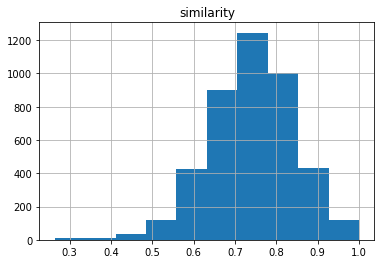

In [52]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfb00004d0>]],
      dtype=object)

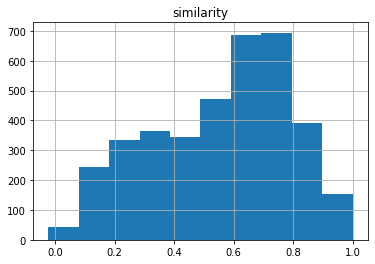

In [53]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfafe95810>]],
      dtype=object)

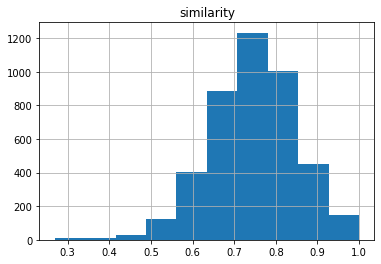

In [54]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfafe13150>]],
      dtype=object)

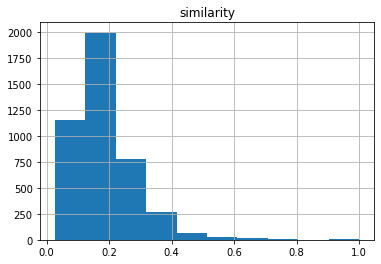

In [55]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfac06a990>]],
      dtype=object)

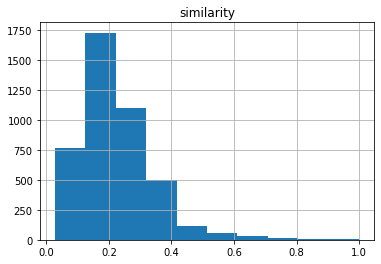

In [56]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfafb6c190>]],
      dtype=object)

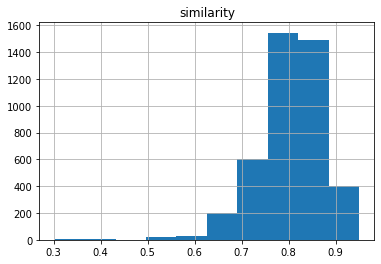

In [57]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfac4bcf90>]],
      dtype=object)

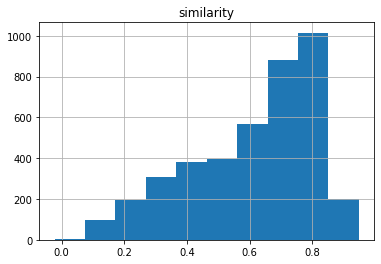

In [58]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfaf29b7d0>]],
      dtype=object)

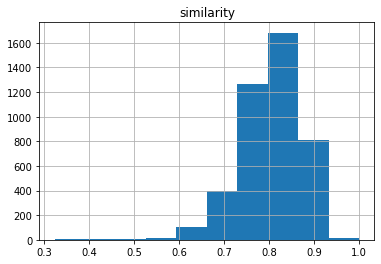

In [59]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfaf799350>]],
      dtype=object)

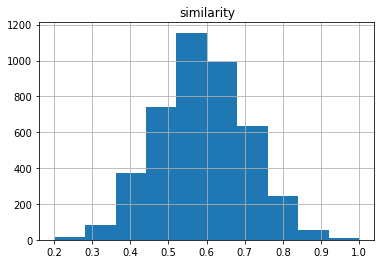

In [60]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfaf212290>]],
      dtype=object)

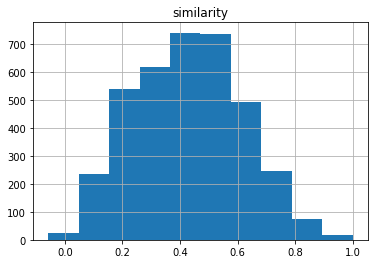

In [61]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfaedd2f50>]],
      dtype=object)

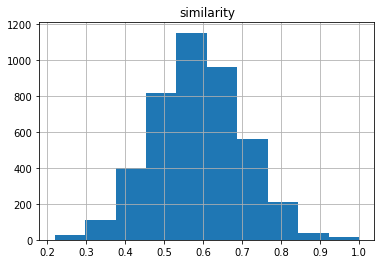

In [62]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfaec33290>]],
      dtype=object)

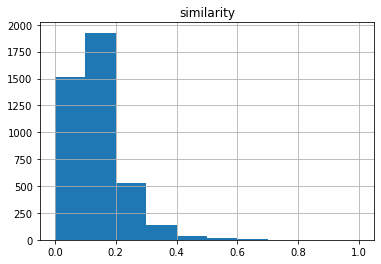

In [63]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_TF_IDF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfaee54d10>]],
      dtype=object)

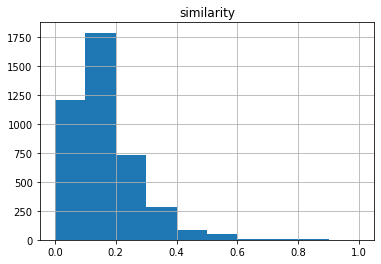

In [64]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfae7413d0>]],
      dtype=object)

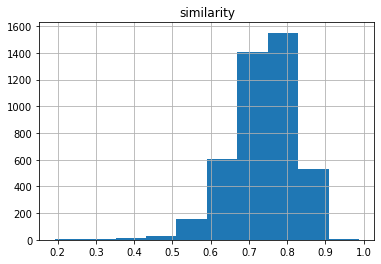

In [65]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfaea70310>]],
      dtype=object)

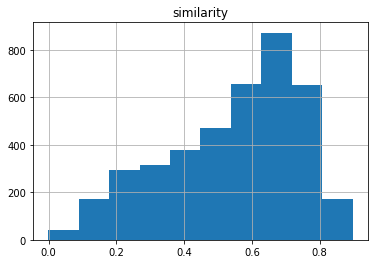

In [66]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfae26fbd0>]],
      dtype=object)

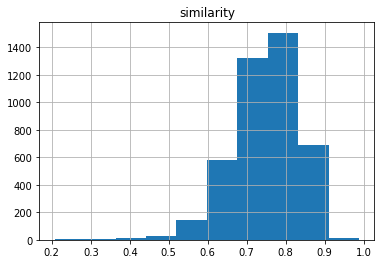

In [67]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfae093590>]],
      dtype=object)

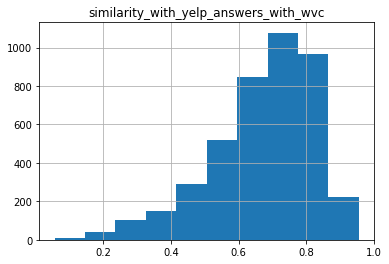

In [68]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfadfc7910>]],
      dtype=object)

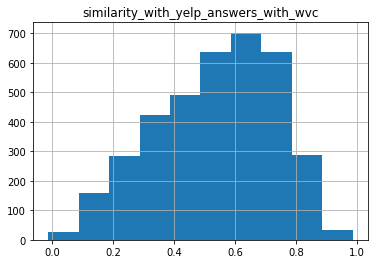

In [69]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfad941b50>]],
      dtype=object)

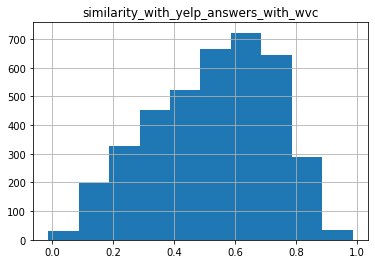

In [70]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfadd8fd90>]],
      dtype=object)

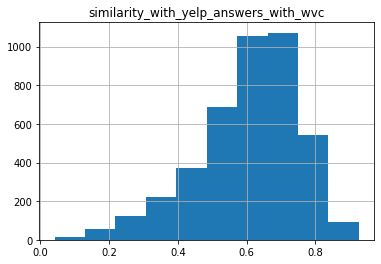

In [71]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfadaf3290>]],
      dtype=object)

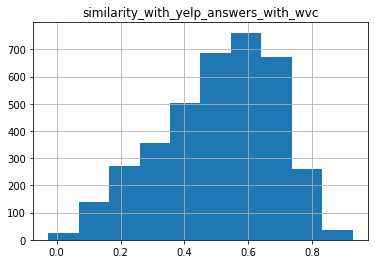

In [72]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfad4c7310>]],
      dtype=object)

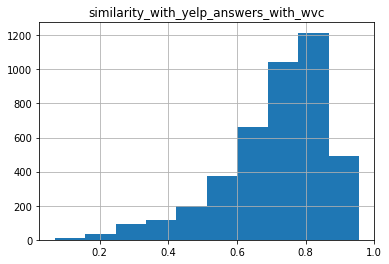

In [73]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfad74d550>]],
      dtype=object)

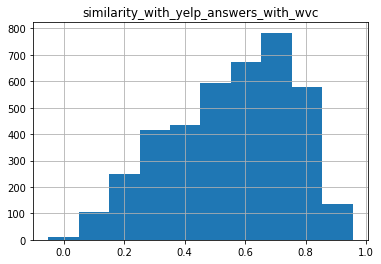

In [74]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfac3a4610>]],
      dtype=object)

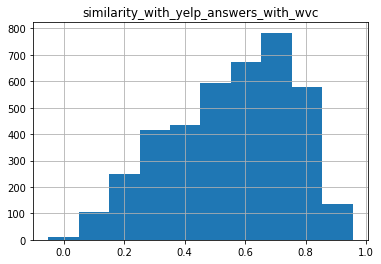

In [75]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfac2e0150>]],
      dtype=object)

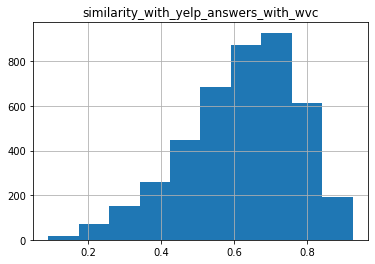

In [76]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfac4c3610>]],
      dtype=object)

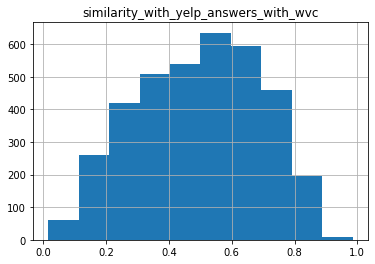

In [77]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfabec5c50>]],
      dtype=object)

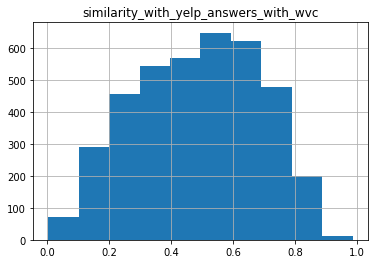

In [78]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfacbd3890>]],
      dtype=object)

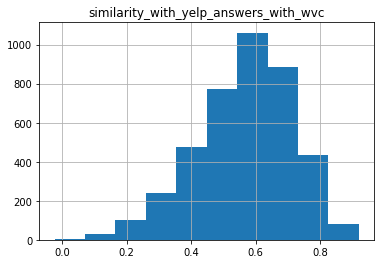

In [79]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_TF_IDF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfac106cd0>]],
      dtype=object)

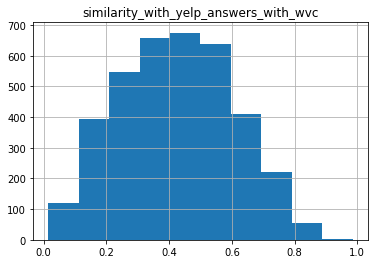

In [80]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfa4428910>]],
      dtype=object)

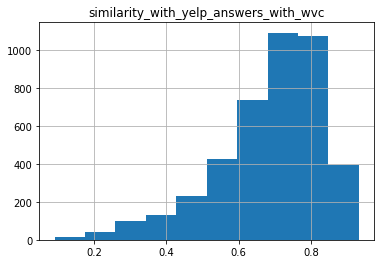

In [81]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfa43f4bd0>]],
      dtype=object)

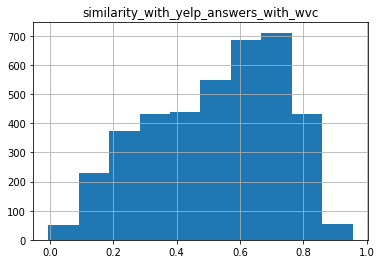

In [82]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfa43498d0>]],
      dtype=object)

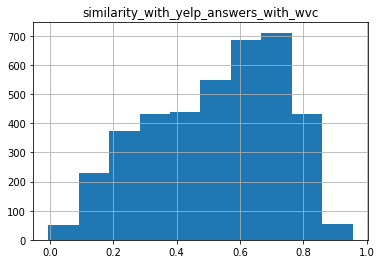

In [83]:
Answers_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc.hist(column='similarity_with_yelp_answers_with_wvc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfad842d90>]],
      dtype=object)

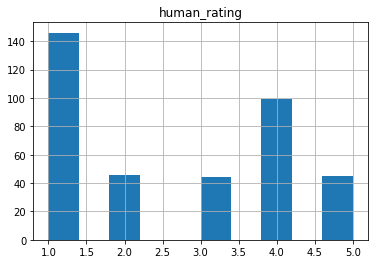

In [86]:
Answers_with_wvc = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_REVIEWS_WITH_IWCS_WITH_WVC_FILE_PATH)
Answers_with_wvc = Answers_with_wvc.dropna()
Answers_with_wvc.hist(column='human_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfa418af10>]],
      dtype=object)

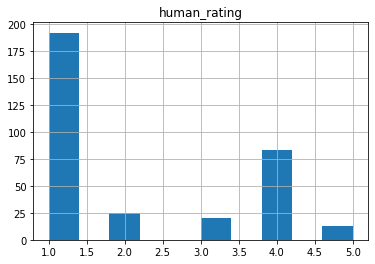

In [87]:
Answers_with_wvc = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc = Answers_with_wvc.dropna()
Answers_with_wvc.hist(column='human_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfa4185f50>]],
      dtype=object)

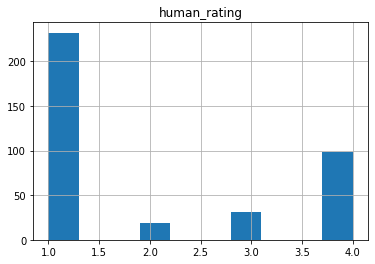

In [88]:
Answers_with_wvc = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_REVIEWS_WITH_TF_IDF_WITH_WVC_FILE_PATH)
Answers_with_wvc = Answers_with_wvc.dropna()
Answers_with_wvc.hist(column='human_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfa4083390>]],
      dtype=object)

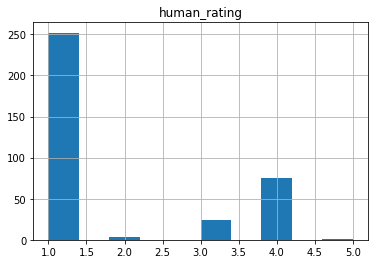

In [89]:
Answers_with_wvc = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc = Answers_with_wvc.dropna()
Answers_with_wvc.hist(column='human_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfa4080750>]],
      dtype=object)

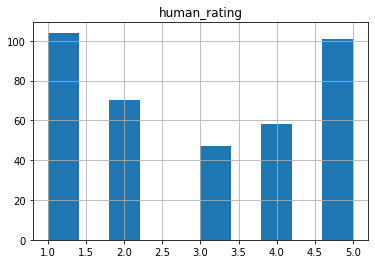

In [90]:
Answers_with_wvc = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_REVIEWS_WITH_WV_WITH_WVC_FILE_PATH)
Answers_with_wvc = Answers_with_wvc.dropna()
Answers_with_wvc.hist(column='human_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf9ef23f10>]],
      dtype=object)

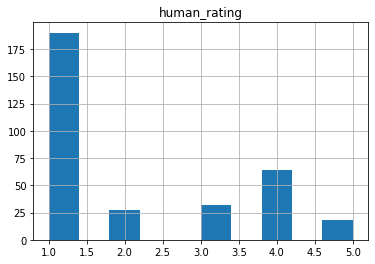

In [91]:
Answers_with_wvc = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc = Answers_with_wvc.dropna()
Answers_with_wvc.hist(column='human_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf9ef1d8d0>]],
      dtype=object)

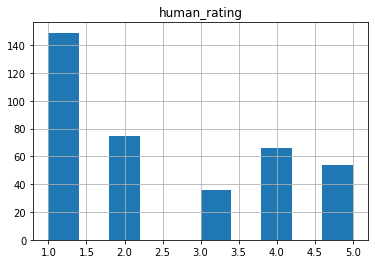

In [92]:
Answers_with_wvc = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_TIPS_WITH_IWCS_WITH_WVC_FILE_PATH)
Answers_with_wvc = Answers_with_wvc.dropna()
Answers_with_wvc.hist(column='human_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf9ee17f50>]],
      dtype=object)

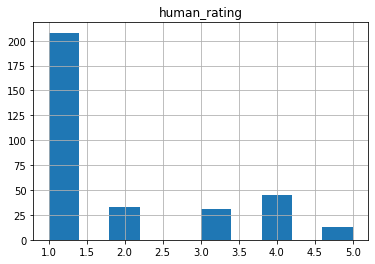

In [93]:
Answers_with_wvc = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc = Answers_with_wvc.dropna()
Answers_with_wvc.hist(column='human_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf9ee11950>]],
      dtype=object)

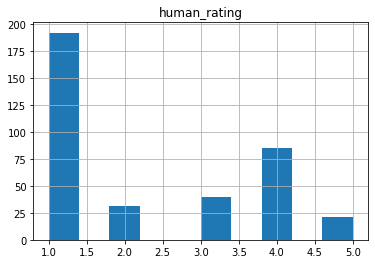

In [94]:
Answers_with_wvc = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_TIPS_WITH_TF_IDF_WITH_WVC_FILE_PATH)
Answers_with_wvc = Answers_with_wvc.dropna()
Answers_with_wvc.hist(column='human_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf9ed1eed0>]],
      dtype=object)

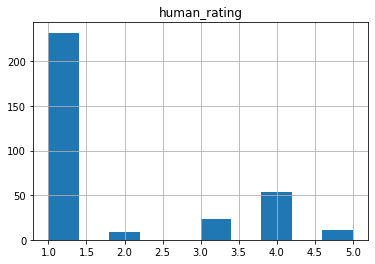

In [95]:
Answers_with_wvc = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc = Answers_with_wvc.dropna()
Answers_with_wvc.hist(column='human_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf9ed1aad0>]],
      dtype=object)

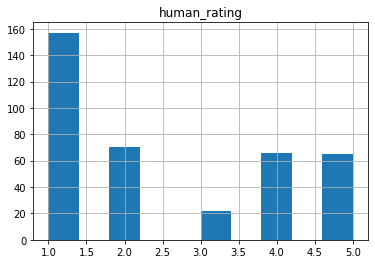

In [96]:
Answers_with_wvc = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_TIPS_WITH_WV_WITH_WVC_FILE_PATH)
Answers_with_wvc = Answers_with_wvc.dropna()
Answers_with_wvc.hist(column='human_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf9ebc6ed0>]],
      dtype=object)

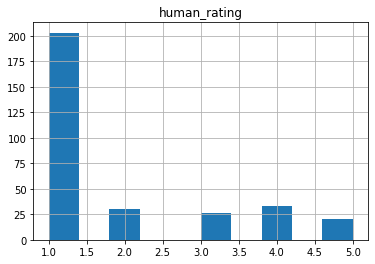

In [97]:
Answers_with_wvc = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc = Answers_with_wvc.dropna()
Answers_with_wvc.hist(column='human_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf9eb60fd0>]],
      dtype=object)

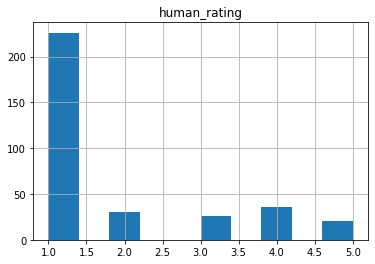

In [98]:
Answers_with_wvc = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)
Answers_with_wvc = Answers_with_wvc.dropna()
Answers_with_wvc.hist(column='human_rating')

In [99]:
print("Mean number of words in answers from:")
temp_list_of_names = []
temp_list_of_number_of_words = []

temp_list_of_names.append("scrapped from Yelp \t\t\t\t\t\t: ")
temp_list_of_number_of_words.append(int(Answers_scrapped_from_yelp["number_of_words"].mean()))

temp_list_of_names.append("Reviews with IWCS \t\t\t\t\t\t: ")
temp_list_of_number_of_words.append(int(Answers_from_reviews_with_iwcs["number_of_words"].mean()))

temp_list_of_names.append("Reviews with IWCS and BiDAF \t\t\t\t\t: ")
temp_list_of_number_of_words.append(int(Answers_from_reviews_with_iwcs_and_bidaf["number_of_words"].mean()))

temp_list_of_names.append("Reviews with IWCS and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_number_of_words.append(int(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf["number_of_words"].mean()))

#temp_list_of_names.append("Reviews with IWCS and BERT \t\t\t\t\t: ")
#temp_list_of_number_of_words.append(int(Answers_from_reviews_with_iwcs_and_bert["number_of_words"].mean()))

#temp_list_of_names.append("Reviews with IWCS and BERT without rearranging after BERT \t: ")
#temp_list_of_number_of_words.append(int(Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert["number_of_words"].mean()))

temp_list_of_names.append("Reviews with TF-IDF \t\t\t\t\t\t: ")
temp_list_of_number_of_words.append(int(Answers_from_reviews_with_tf_idf["number_of_words"].mean()))

temp_list_of_names.append("Reviews with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_number_of_words.append(int(Answers_from_reviews_with_tf_idf_and_bidaf["number_of_words"].mean()))

#temp_list_of_names.append("Reviews with TF-IDF and BERT \t\t\t\t\t: ")
#temp_list_of_number_of_words.append(int(Answers_from_reviews_with_tf_idf_and_bert["number_of_words"].mean()))

temp_list_of_names.append("Reviews with Centroid \t\t\t\t\t\t: ")
temp_list_of_number_of_words.append(int(Answers_from_reviews_with_wv["number_of_words"].mean()))

temp_list_of_names.append("Reviews with Centroid and BiDAF \t\t\t\t: ")
temp_list_of_number_of_words.append(int(Answers_from_reviews_with_wv_and_bidaf["number_of_words"].mean()))

temp_list_of_names.append("Reviews with Centroid and BiDAF without rearranging after BiDAF : ")
temp_list_of_number_of_words.append(int(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf["number_of_words"].mean()))

#temp_list_of_names.append("Reviews with Centroid and BERT \t\t\t\t\t: ")
#temp_list_of_number_of_words.append(int(Answers_from_reviews_with_wv_and_bert["number_of_words"].mean()))

#temp_list_of_names.append("Reviews with Centroid and BERT without rearranging after BERT : ")
#temp_list_of_number_of_words.append(int(Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert["number_of_words"].mean()))



temp_list_of_names.append("Tips with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_number_of_words.append(int(Answers_from_tips_with_iwcs["number_of_words"].mean()))

temp_list_of_names.append("Tips with IWCS and BiDAF \t\t\t\t\t: ")
temp_list_of_number_of_words.append(int(Answers_from_tips_with_iwcs_and_bidaf["number_of_words"].mean()))

temp_list_of_names.append("Tips with IWCS and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_number_of_words.append(int(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf["number_of_words"].mean()))

#temp_list_of_names.append("Tips with IWCS and BERT \t\t\t\t\t: ")
#temp_list_of_number_of_words.append(int(Answers_from_tips_with_iwcs_and_bert["number_of_words"].mean()))

#temp_list_of_names.append("Tips with IWCS and BERT without rearranging after BERT \t\t: ")
#temp_list_of_number_of_words.append(int(Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert["number_of_words"].mean()))

temp_list_of_names.append("Tips with TF-IDF \t\t\t\t\t\t: ")
temp_list_of_number_of_words.append(int(Answers_from_tips_with_tf_idf["number_of_words"].mean()))

temp_list_of_names.append("Tips with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_number_of_words.append(int(Answers_from_tips_with_tf_idf_and_bidaf["number_of_words"].mean()))

#temp_list_of_names.append("Tips with TF-IDF and BERT \t\t\t\t\t: ")
#temp_list_of_number_of_words.append(int(Answers_from_tips_with_tf_idf_and_bert["number_of_words"].mean()))

temp_list_of_names.append("Tips with Centroid \t\t\t\t\t\t: ")
temp_list_of_number_of_words.append(int(Answers_from_tips_with_wv["number_of_words"].mean()))

temp_list_of_names.append("Tips with Centroid and BiDAF \t\t\t\t\t: ")
temp_list_of_number_of_words.append(int(Answers_from_tips_with_wv_and_bidaf["number_of_words"].mean()))

temp_list_of_names.append("Tips with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_number_of_words.append(int(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf["number_of_words"].mean()))

#temp_list_of_names.append("Tips with Centroid and BERT \t\t\t\t\t: ")
#temp_list_of_number_of_words.append(int(Answers_from_tips_with_wv_and_bert["number_of_words"].mean()))

#temp_list_of_names.append("Tips with Centroid and BERT without rearranging after BERT \t: ")
#temp_list_of_number_of_words.append(int(Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert["number_of_words"].mean()))

raw_data = {'model_names':temp_list_of_names,
            'number_of_words':temp_list_of_number_of_words
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'number_of_words'])

temp_dataframe = temp_dataframe.sort_values(by='number_of_words', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        number_of_words = row[1]
        print(model_names + str(number_of_words))

Mean number of words in answers from:
scrapped from Yelp 						: 23
Reviews with Centroid 						: 19
Reviews with IWCS 						: 16
Tips with Centroid 						: 16
Tips with IWCS 							: 12
Tips with Centroid and BiDAF 					: 7
Tips with TF-IDF 						: 7
Reviews with Centroid and BiDAF without rearranging after BiDAF : 7
Reviews with Centroid and BiDAF 				: 7
Reviews with TF-IDF 						: 7
Tips with Centroid and BiDAF without rearranging after BiDAF 	: 7
Tips with IWCS and BiDAF 					: 6
Tips with IWCS and BiDAF without rearranging after BiDAF 	: 6
Reviews with IWCS and BiDAF without rearranging after BiDAF 	: 6
Reviews with IWCS and BiDAF 					: 6
Reviews with TF-IDF and BiDAF 					: 3
Tips with TF-IDF and BiDAF 					: 3


In [100]:
print("Mean answer computation time(sec) from:")
temp_list_of_names = []
temp_list_of_execution_time_in_sec = []

temp_list_of_names.append("Reviews with IWCS \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs["execution_time_in_sec"].mean())

temp_list_of_names.append("Reviews with IWCS and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs_and_bidaf["execution_time_in_sec"].mean())

temp_list_of_names.append("Reviews with IWCS and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf["execution_time_in_sec"].mean())

#temp_list_of_names.append("Reviews with IWCS and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs_and_bert["execution_time_in_sec"].mean())

#temp_list_of_names.append("Reviews with IWCS and BERT without rearranging after BERT \t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert["execution_time_in_sec"].mean())

temp_list_of_names.append("Reviews with TF-IDF \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_tf_idf["execution_time_in_sec"].mean())

temp_list_of_names.append("Reviews with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_tf_idf_and_bidaf["execution_time_in_sec"].mean())

#temp_list_of_names.append("Reviews with TF-IDF and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_tf_idf_and_bert["execution_time_in_sec"].mean())

temp_list_of_names.append("Reviews with Centroid \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv["execution_time_in_sec"].mean())

temp_list_of_names.append("Reviews with Centroid and BiDAF \t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv_and_bidaf["execution_time_in_sec"].mean())

temp_list_of_names.append("Reviews with Centroid and BiDAF without rearranging after BiDAF : ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf["execution_time_in_sec"].mean())

#temp_list_of_names.append("Reviews with Centroid and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv_and_bert["execution_time_in_sec"].mean())

#temp_list_of_names.append("Reviews with Centroid and BERT without rearranging after BERT : ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert["execution_time_in_sec"].mean())



temp_list_of_names.append("Tips with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs["execution_time_in_sec"].mean())

temp_list_of_names.append("Tips with IWCS and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs_and_bidaf["execution_time_in_sec"].mean())

temp_list_of_names.append("Tips with IWCS and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf["execution_time_in_sec"].mean())

#temp_list_of_names.append("Tips with IWCS and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs_and_bert["execution_time_in_sec"].mean())

#temp_list_of_names.append("Tips with IWCS and BERT without rearranging after BERT \t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert["execution_time_in_sec"].mean())

temp_list_of_names.append("Tips with TF-IDF \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_tf_idf["execution_time_in_sec"].mean())

temp_list_of_names.append("Tips with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_tf_idf_and_bidaf["execution_time_in_sec"].mean())

#temp_list_of_names.append("Tips with TF-IDF and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_tf_idf_and_bert["execution_time_in_sec"].mean())

temp_list_of_names.append("Tips with Centroid \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv["execution_time_in_sec"].mean())

temp_list_of_names.append("Tips with Centroid and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv_and_bidaf["execution_time_in_sec"].mean())

temp_list_of_names.append("Tips with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf["execution_time_in_sec"].mean())

#temp_list_of_names.append("Tips with Centroid and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv_and_bert["execution_time_in_sec"].mean())

#temp_list_of_names.append("Tips with Centroid and BERT without rearranging after BERT \t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert["execution_time_in_sec"].mean())

raw_data = {'model_names':temp_list_of_names,
            'execution_time_in_sec':temp_list_of_execution_time_in_sec
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'execution_time_in_sec'])

temp_dataframe = temp_dataframe.sort_values(by='execution_time_in_sec', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        execution_time_in_sec = row[1]
        print(model_names + str(execution_time_in_sec))

Mean answer computation time(sec) from:
Reviews with IWCS and BiDAF 					: 6.859266762943666
Reviews with Centroid and BiDAF 				: 6.370310374589641
Reviews with IWCS and BiDAF without rearranging after BiDAF 	: 5.4614760090192895
Reviews with Centroid and BiDAF without rearranging after BiDAF : 5.415567750720579
Reviews with IWCS 						: 4.753476775439323
Reviews with Centroid 						: 3.09934627788526
Tips with Centroid and BiDAF 					: 2.6176447766009727
Tips with Centroid and BiDAF without rearranging after BiDAF 	: 0.6638630161152639
Tips with IWCS and BiDAF 					: 0.6422463862912561
Tips with Centroid 						: 0.5844285371961837
Reviews with TF-IDF and BiDAF 					: 0.3869129110511631
Tips with IWCS and BiDAF without rearranging after BiDAF 	: 0.35169699960960865
Reviews with TF-IDF 						: 0.2830992404132832
Tips with IWCS 							: 0.22609107427973205
Tips with TF-IDF and BiDAF 					: 0.10672349932092727
Tips with TF-IDF 						: 0.01477429602518194


In [101]:
print("Max answer computation time(sec) from:")
temp_list_of_names = []
temp_list_of_execution_time_in_sec = []

temp_list_of_names.append("Reviews with IWCS \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs["execution_time_in_sec"].max())

temp_list_of_names.append("Reviews with IWCS and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs_and_bidaf["execution_time_in_sec"].max())

temp_list_of_names.append("Reviews with IWCS and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf["execution_time_in_sec"].max())

#temp_list_of_names.append("Reviews with IWCS and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs_and_bert["execution_time_in_sec"].max())

#temp_list_of_names.append("Reviews with IWCS and BERT without rearranging after BERT \t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert["execution_time_in_sec"].max())

temp_list_of_names.append("Reviews with TF-IDF \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_tf_idf["execution_time_in_sec"].max())

temp_list_of_names.append("Reviews with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_tf_idf_and_bidaf["execution_time_in_sec"].max())

#temp_list_of_names.append("Reviews with TF-IDF and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_tf_idf_and_bert["execution_time_in_sec"].max())

temp_list_of_names.append("Reviews with Centroid \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv["execution_time_in_sec"].max())

temp_list_of_names.append("Reviews with Centroid and BiDAF \t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv_and_bidaf["execution_time_in_sec"].max())

temp_list_of_names.append("Reviews with Centroid and BiDAF without rearranging after BiDAF : ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf["execution_time_in_sec"].max())

#temp_list_of_names.append("Reviews with Centroid and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv_and_bert["execution_time_in_sec"].max())

#temp_list_of_names.append("Reviews with Centroid and BERT without rearranging after BERT : ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert["execution_time_in_sec"].max())


temp_list_of_names.append("Tips with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs["execution_time_in_sec"].max())

temp_list_of_names.append("Tips with IWCS and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs_and_bidaf["execution_time_in_sec"].max())

temp_list_of_names.append("Tips with IWCS and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf["execution_time_in_sec"].max())

#temp_list_of_names.append("Tips with IWCS and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs_and_bert["execution_time_in_sec"].max())

#temp_list_of_names.append("Tips with IWCS and BERT without rearranging after BERT \t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert["execution_time_in_sec"].max())

temp_list_of_names.append("Tips with TF-IDF \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_tf_idf["execution_time_in_sec"].max())

temp_list_of_names.append("Tips with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_tf_idf_and_bidaf["execution_time_in_sec"].max())

#temp_list_of_names.append("Tips with TF-IDF and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_tf_idf_and_bert["execution_time_in_sec"].max())

temp_list_of_names.append("Tips with Centroid \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv["execution_time_in_sec"].max())

temp_list_of_names.append("Tips with Centroid and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv_and_bidaf["execution_time_in_sec"].max())

temp_list_of_names.append("Tips with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf["execution_time_in_sec"].max())

#temp_list_of_names.append("Tips with Centroid and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv_and_bert["execution_time_in_sec"].max())

#temp_list_of_names.append("Tips with Centroid and BERT without rearranging after BERT \t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert["execution_time_in_sec"].max())


raw_data = {'model_names':temp_list_of_names,
            'execution_time_in_sec':temp_list_of_execution_time_in_sec
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'execution_time_in_sec'])

temp_dataframe = temp_dataframe.sort_values(by='execution_time_in_sec', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        execution_time_in_sec = row[1]
        print(model_names + str(execution_time_in_sec))

Max answer computation time(sec) from:
Tips with Centroid and BiDAF 					: 219.22966241836548
Reviews with IWCS and BiDAF 					: 23.75855374336243
Reviews with Centroid and BiDAF 				: 21.77109146118164
Reviews with Centroid and BiDAF without rearranging after BiDAF : 18.079249143600464
Reviews with Centroid 						: 13.524743556976318
Reviews with IWCS and BiDAF without rearranging after BiDAF 	: 11.388845682144165
Tips with Centroid 						: 10.360035181045534
Reviews with IWCS 						: 10.037939548492432
Tips with Centroid and BiDAF without rearranging after BiDAF 	: 9.770492792129515
Tips with IWCS and BiDAF 					: 5.230401277542113
Tips with IWCS and BiDAF without rearranging after BiDAF 	: 1.7082962989807131
Tips with IWCS 							: 1.6797051429748535
Reviews with TF-IDF and BiDAF 					: 0.8552665710449219
Reviews with TF-IDF 						: 0.7017378807067871
Tips with TF-IDF and BiDAF 					: 0.2728524208068848
Tips with TF-IDF 						: 0.1533055305480957


In [102]:
print("Min answer computation time(sec) from:")
temp_list_of_names = []
temp_list_of_execution_time_in_sec = []

temp_list_of_names.append("Reviews with IWCS \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs["execution_time_in_sec"].min())

temp_list_of_names.append("Reviews with IWCS and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs_and_bidaf["execution_time_in_sec"].min())

temp_list_of_names.append("Reviews with IWCS and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf["execution_time_in_sec"].min())

#temp_list_of_names.append("Reviews with IWCS and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs_and_bert["execution_time_in_sec"].min())

#temp_list_of_names.append("Reviews with IWCS and BERT without rearranging after BERT \t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert["execution_time_in_sec"].min())

temp_list_of_names.append("Reviews with TF-IDF \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_tf_idf["execution_time_in_sec"].min())

temp_list_of_names.append("Reviews with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_tf_idf_and_bidaf["execution_time_in_sec"].min())

#temp_list_of_names.append("Reviews with TF-IDF and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_tf_idf_and_bert["execution_time_in_sec"].min())

temp_list_of_names.append("Reviews with Centroid \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv["execution_time_in_sec"].min())

temp_list_of_names.append("Reviews with Centroid and BiDAF \t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv_and_bidaf["execution_time_in_sec"].min())

temp_list_of_names.append("Reviews with Centroid and BiDAF without rearranging after BiDAF : ")
temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf["execution_time_in_sec"].min())

#temp_list_of_names.append("Reviews with Centroid and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv_and_bert["execution_time_in_sec"].min())

#temp_list_of_names.append("Reviews with Centroid and BERT without rearranging after BERT : ")
#temp_list_of_execution_time_in_sec.append(Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert["execution_time_in_sec"].min())



temp_list_of_names.append("Tips with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs["execution_time_in_sec"].min())

temp_list_of_names.append("Tips with IWCS and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs_and_bidaf["execution_time_in_sec"].min())

temp_list_of_names.append("Tips with IWCS and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf["execution_time_in_sec"].min())

#temp_list_of_names.append("Tips with IWCS and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs_and_bert["execution_time_in_sec"].min())

#temp_list_of_names.append("Tips with IWCS and BERT without rearranging after BERT \t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert["execution_time_in_sec"].min())

temp_list_of_names.append("Tips with TF-IDF \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_tf_idf["execution_time_in_sec"].min())

temp_list_of_names.append("Tips with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_tf_idf_and_bidaf["execution_time_in_sec"].min())

#temp_list_of_names.append("Tips with TF-IDF and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_tf_idf_and_bert["execution_time_in_sec"].min())

temp_list_of_names.append("Tips with Centroid \t\t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv["execution_time_in_sec"].min())

temp_list_of_names.append("Tips with Centroid and BiDAF \t\t\t\t\t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv_and_bidaf["execution_time_in_sec"].min())

temp_list_of_names.append("Tips with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf["execution_time_in_sec"].min())

#temp_list_of_names.append("Tips with Centroid and BERT \t\t\t\t\t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv_and_bert["execution_time_in_sec"].min())

#temp_list_of_names.append("Tips with Centroid and BERT without rearranging after BERT \t: ")
#temp_list_of_execution_time_in_sec.append(Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert["execution_time_in_sec"].min())


raw_data = {'model_names':temp_list_of_names,
            'execution_time_in_sec':temp_list_of_execution_time_in_sec
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'execution_time_in_sec'])

temp_dataframe = temp_dataframe.sort_values(by='execution_time_in_sec', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        execution_time_in_sec = row[1]
        print(model_names + str(execution_time_in_sec))

Min answer computation time(sec) from:
Reviews with IWCS and BiDAF 					: 2.6419012546539307
Reviews with IWCS and BiDAF without rearranging after BiDAF 	: 1.7071845531463623
Reviews with Centroid and BiDAF 				: 1.5302629470825195
Reviews with Centroid and BiDAF without rearranging after BiDAF : 1.478420972824097
Reviews with IWCS 						: 1.4363036155700684
Reviews with Centroid 						: 1.0982294082641602
Tips with IWCS and BiDAF 					: 0.2103893756866455
Tips with Centroid and BiDAF 					: 0.18879270553588867
Tips with Centroid 						: 0.174241304397583
Reviews with TF-IDF and BiDAF 					: 0.13837456703186035
Tips with IWCS and BiDAF without rearranging after BiDAF 	: 0.13797235488891602
Tips with Centroid and BiDAF without rearranging after BiDAF 	: 0.12948274612426758
Reviews with TF-IDF 						: 0.06913471221923828
Tips with IWCS 							: 0.045573949813842766
Tips with TF-IDF and BiDAF 					: 0.024394750595092773
Tips with TF-IDF 						: 0.006122112274169922


In [103]:
Answers_scrapped_from_yelp_grouped = Answers_scrapped_from_yelp.groupby(['question', 'business'])

Answers_from_reviews_with_iwcs_grouped = Answers_from_reviews_with_iwcs.groupby(['question', 'business'])
Answers_from_reviews_with_iwcs_and_bidaf_grouped = Answers_from_reviews_with_iwcs_and_bidaf.groupby(['question', 'business'])
Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_grouped = Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])
#Answers_from_reviews_with_iwcs_and_bert_grouped = Answers_from_reviews_with_iwcs_and_bert.groupby(['question', 'business'])
#Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert_grouped = Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert.groupby(['question', 'business'])

Answers_from_reviews_with_tf_idf_grouped = Answers_from_reviews_with_tf_idf.groupby(['question', 'business'])
Answers_from_reviews_with_tf_idf_and_bidaf_grouped = Answers_from_reviews_with_tf_idf_and_bidaf.groupby(['question', 'business'])
#Answers_from_reviews_with_tf_idf_and_bert_grouped = Answers_from_reviews_with_tf_idf_and_bert.groupby(['question', 'business'])

Answers_from_reviews_with_wv_grouped = Answers_from_reviews_with_wv.groupby(['question', 'business'])
Answers_from_reviews_with_wv_and_bidaf_grouped = Answers_from_reviews_with_wv_and_bidaf.groupby(['question', 'business'])
Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_grouped = Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])
#Answers_from_reviews_with_wv_and_bert_grouped = Answers_from_reviews_with_wv_and_bert.groupby(['question', 'business'])
#Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert_grouped = Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert.groupby(['question', 'business'])

Answers_from_tips_with_iwcs_grouped = Answers_from_tips_with_iwcs.groupby(['question', 'business'])
Answers_from_tips_with_iwcs_and_bidaf_grouped = Answers_from_tips_with_iwcs_and_bidaf.groupby(['question', 'business'])
Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_grouped = Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])
#Answers_from_tips_with_iwcs_and_bert_grouped = Answers_from_tips_with_iwcs_and_bert.groupby(['question', 'business'])
#Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert_grouped = Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert.groupby(['question', 'business'])

Answers_from_tips_with_tf_idf_grouped = Answers_from_tips_with_tf_idf.groupby(['question', 'business'])
Answers_from_tips_with_tf_idf_and_bidaf_grouped = Answers_from_tips_with_tf_idf_and_bidaf.groupby(['question', 'business'])
#Answers_from_tips_with_tf_idf_and_bert_grouped = Answers_from_tips_with_tf_idf_and_bert.groupby(['question', 'business'])

Answers_from_tips_with_wv_grouped = Answers_from_tips_with_wv.groupby(['question', 'business'])
Answers_from_tips_with_wv_and_bidaf_grouped = Answers_from_tips_with_wv_and_bidaf.groupby(['question', 'business'])
Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_grouped = Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])
#Answers_from_tips_with_wv_and_bert_grouped = Answers_from_tips_with_wv_and_bert.groupby(['question', 'business'])
#Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert_grouped = Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert.groupby(['question', 'business'])

In [104]:
print("Number of answered questions for:")
print("Yelp \t\t\t\t\t\t\t\t\t: " + str(len(Answers_scrapped_from_yelp_grouped)))

print("reviews with IWCS \t\t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_iwcs_grouped)))
print("reviews with IWCS and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_iwcs_and_bidaf_grouped)))
print("reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: " + str(len(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_grouped)))
#print("reviews with IWCS and BERT \t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_iwcs_and_bert_grouped)))
#print("reviews with IWCS and BERT without rearranging after BERT \t\t: " + str(len(Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert_grouped)))

print("reviews with TF-IDF \t\t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_tf_idf_grouped)))
print("reviews with TF-IDF and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_tf_idf_and_bidaf_grouped)))
#print("reviews with TF-IDF and BERT \t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_tf_idf_and_bert_grouped)))

print("reviews with Centroids \t\t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_wv_grouped)))
print("reviews with Centroids and BiDAF \t\t\t\t\t: " + str(len(Answers_from_reviews_with_wv_and_bidaf_grouped)))
print("reviews with Centroids and BiDAF without rearranging after BiDAF \t: " + str(len(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_grouped)))
#print("reviews with Centroids and BERT \t\t\t\t\t: " + str(len(Answers_from_reviews_with_wv_and_bert_grouped)))
#print("reviews with Centroids and BERT without rearranging after BERT \t\t: " + str(len(Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert_grouped)))

print("tips with IWCS \t\t\t\t\t\t\t\t: " + str(len(Answers_from_tips_with_iwcs_grouped)))
print("tips with IWCS and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_iwcs_and_bidaf_grouped)))
print("tips with IWCS and BiDAF without rearranging after BiDAF \t\t: " + str(len(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_grouped)))
#print("tips with IWCS and BERT \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_iwcs_and_bert_grouped)))
#print("tips with IWCS and BERT without rearranging after BERT \t\t\t: " + str(len(Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert_grouped)))

print("tips with TF-IDF \t\t\t\t\t\t\t: " + str(len(Answers_from_tips_with_tf_idf_grouped)))
print("tips with TF-IDF and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_tf_idf_and_bidaf_grouped)))
#print("tips with TF-IDF and BERT \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_tf_idf_and_bert_grouped)))

print("tips with Centroids \t\t\t\t\t\t\t: " + str(len(Answers_from_tips_with_wv_grouped)))
print("tips with Centroids and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_wv_and_bidaf_grouped)))
print("tips with Centroids and BiDAF without rearranging after BiDAF \t\t: " + str(len(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_grouped)))
#print("tips with Centroids and BERT \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_wv_and_bert_grouped)))
#print("tips with Centroids and BERT without rearranging after BERT \t\t: " + str(len(Answers_from_tips_with_wv_and_bert_without_rearranging_after_bert_grouped)))

Number of answered questions for:
Yelp 									: 995
reviews with IWCS 							: 862
reviews with IWCS and BiDAF 						: 862
reviews with IWCS and BiDAF without rearranging after BiDAF 		: 862
reviews with TF-IDF 							: 862
reviews with TF-IDF and BiDAF 						: 862
reviews with Centroids 							: 862
reviews with Centroids and BiDAF 					: 862
reviews with Centroids and BiDAF without rearranging after BiDAF 	: 862
tips with IWCS 								: 862
tips with IWCS and BiDAF 						: 862
tips with IWCS and BiDAF without rearranging after BiDAF 		: 862
tips with TF-IDF 							: 862
tips with TF-IDF and BiDAF 						: 862
tips with Centroids 							: 862
tips with Centroids and BiDAF 						: 862
tips with Centroids and BiDAF without rearranging after BiDAF 		: 862


In [105]:
print("Number of answeres from:")
print("Yelp \t\t\t\t\t\t\t\t\t: " + str(len(Answers_scrapped_from_yelp)))

print("reviews with IWCS \t\t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_iwcs)))
print("reviews with IWCS and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_iwcs_and_bidaf)))
print("reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: " + str(len(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)))
#print("reviews with IWCS and BERT \t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_iwcs_and_bert)))
#print("reviews with IWCS and BERT without rearranging after BERT \t\t: " + str(len(Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert)))

print("reviews with TF-IDF \t\t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_tf_idf)))
print("reviews with TF-IDF and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_tf_idf_and_bidaf)))
#print("reviews with TF-IDF and BERT \t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_tf_idf_and_bert)))

print("reviews with Centroids \t\t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_wv)))
print("reviews with Centroids and BiDAF \t\t\t\t\t: " + str(len(Answers_from_reviews_with_wv_and_bidaf)))
print("reviews with Centroids and BiDAF without rearranging after BiDAF \t: " + str(len(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)))
#print("reviews with Centroids and BERT \t\t\t\t\t: " + str(len(Answers_from_reviews_with_wv_and_bert)))
#print("reviews with Centroids and BERT without rearranging after BERT \t\t: " + str(len(Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert)))

print("tips with IWCS \t\t\t\t\t\t\t\t: " + str(len(Answers_from_tips_with_iwcs)))
print("tips with IWCS and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_iwcs_and_bidaf)))
print("tips with IWCS and BiDAF without rearranging after BiDAF \t\t: " + str(len(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)))
#print("tips with IWCS and BERT \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_iwcs_and_bert)))
#print("tips with IWCS and BERT without rearranging after BERT \t\t\t: " + str(len(Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert)))

print("tips with TF-IDF \t\t\t\t\t\t\t: " + str(len(Answers_from_tips_with_tf_idf)))
print("tips with TF-IDF and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_tf_idf_and_bidaf)))
#print("tips with TF-IDF and BERT \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_tf_idf_and_bert)))

print("tips with Centroids \t\t\t\t\t\t\t: " + str(len(Answers_from_tips_with_wv)))
print("tips with Centroids and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_wv_and_bidaf)))
print("tips with Centroids and BiDAF without rearranging after BiDAF \t\t: " + str(len(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)))
#print("tips with Centroids and BERT \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_wv_and_bidaf)))
#print("tips with Centroids and BERT without rearranging after BERT \t\t: " + str(len(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)))

Number of answeres from:
Yelp 									: 2947
reviews with IWCS 							: 4310
reviews with IWCS and BiDAF 						: 4310
reviews with IWCS and BiDAF without rearranging after BiDAF 		: 4310
reviews with TF-IDF 							: 4308
reviews with TF-IDF and BiDAF 						: 4308
reviews with Centroids 							: 4310
reviews with Centroids and BiDAF 					: 4310
reviews with Centroids and BiDAF without rearranging after BiDAF 	: 4310
tips with IWCS 								: 4310
tips with IWCS and BiDAF 						: 4310
tips with IWCS and BiDAF without rearranging after BiDAF 		: 4310
tips with TF-IDF 							: 4159
tips with TF-IDF and BiDAF 						: 4177
tips with Centroids 							: 4310
tips with Centroids and BiDAF 						: 4310
tips with Centroids and BiDAF without rearranging after BiDAF 		: 4310


In [106]:
print("Number of businesses actually used for evaluation:")
print("Yelp \t\t\t\t\t\t\t\t\t: " + str(len(Answers_scrapped_from_yelp.business.unique())))

print("reviews with IWCS \t\t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_iwcs.business.unique())))
print("reviews with IWCS and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_iwcs_and_bidaf.business.unique())))
print("reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: " + str(len(Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.business.unique())))
#print("reviews with IWCS and BERT \t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_iwcs_and_bert.business.unique())))
#print("reviews with IWCS and BERT without rearranging after BERT \t\t: " + str(len(Answers_from_reviews_with_iwcs_and_bert_without_rearranging_after_bert.business.unique())))

print("reviews with TF-IDF \t\t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_tf_idf.business.unique())))
print("reviews with TF-IDF and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_tf_idf_and_bidaf.business.unique())))
#print("reviews with TF-IDF and BERT \t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_tf_idf_and_bert.business.unique())))

print("reviews with Centroids \t\t\t\t\t\t\t: " + str(len(Answers_from_reviews_with_wv.business.unique())))
print("reviews with Centroids and BiDAF \t\t\t\t\t: " + str(len(Answers_from_reviews_with_wv_and_bidaf.business.unique())))
print("reviews with Centroids and BiDAF without rearranging after BiDAF \t: " + str(len(Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.business.unique())))
#print("reviews with Centroids and BERT \t\t\t\t\t: " + str(len(Answers_from_reviews_with_wv_and_bert.business.unique())))
#print("reviews with Centroids and BERT without rearranging after BERT \t\t: " + str(len(Answers_from_reviews_with_wv_and_bert_without_rearranging_after_bert.business.unique())))

print("tips with IWCS \t\t\t\t\t\t\t\t: " + str(len(Answers_from_tips_with_iwcs.business.unique())))
print("tips with IWCS and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_iwcs_and_bidaf.business.unique())))
print("tips with IWCS and BiDAF without rearranging after BiDAF \t\t: " + str(len(Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.business.unique())))
#print("tips with IWCS and BERT \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_iwcs_and_bert.business.unique())))
#print("tips with IWCS and BERT without rearranging after BERT \t\t\t: " + str(len(Answers_from_tips_with_iwcs_and_bert_without_rearranging_after_bert.business.unique())))

print("tips with TF-IDF \t\t\t\t\t\t\t: " + str(len(Answers_from_tips_with_tf_idf.business.unique())))
print("tips with TF-IDF and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_tf_idf_and_bidaf.business.unique())))
#print("tips with TF-IDF and BERT \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_tf_idf_and_bert.business.unique())))

print("tips with Centroids \t\t\t\t\t\t\t: " + str(len(Answers_from_tips_with_wv.business.unique())))
print("tips with Centroids and BiDAF \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_wv_and_bidaf.business.unique())))
print("tips with Centroids and BiDAF without rearranging after BiDAF \t\t: " + str(len(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.business.unique())))
#print("tips with Centroids and BERT \t\t\t\t\t\t: " + str(len(Answers_from_tips_with_wv_and_bidaf.business.unique())))
#print("tips with Centroids and BERT without rearranging after BERT \t\t: " + str(len(Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.business.unique())))

Number of businesses actually used for evaluation:
Yelp 									: 67
reviews with IWCS 							: 57
reviews with IWCS and BiDAF 						: 57
reviews with IWCS and BiDAF without rearranging after BiDAF 		: 57
reviews with TF-IDF 							: 57
reviews with TF-IDF and BiDAF 						: 57
reviews with Centroids 							: 57
reviews with Centroids and BiDAF 					: 57
reviews with Centroids and BiDAF without rearranging after BiDAF 	: 57
tips with IWCS 								: 57
tips with IWCS and BiDAF 						: 57
tips with IWCS and BiDAF without rearranging after BiDAF 		: 57
tips with TF-IDF 							: 57
tips with TF-IDF and BiDAF 						: 57
tips with Centroids 							: 57
tips with Centroids and BiDAF 						: 57
tips with Centroids and BiDAF without rearranging after BiDAF 		: 57


In [107]:
similarity_with_yelp_from_Answers_from_reviews_with_iwcs_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]
similarity_with_yelp_from_Answers_from_reviews_with_iwcs_and_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]
similarity_with_yelp_from_Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]

similarity_with_yelp_from_Answers_from_reviews_with_tf_idf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]
similarity_with_yelp_from_Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]

similarity_with_yelp_from_Answers_from_reviews_with_wv_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]
similarity_with_yelp_from_Answers_from_reviews_with_wv_and_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]
similarity_with_yelp_from_Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]

similarity_with_yelp_from_Answers_from_tips_with_iwcs_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]
similarity_with_yelp_from_Answers_from_tips_with_iwcs_and_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]
similarity_with_yelp_from_Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]

similarity_with_yelp_from_Answers_from_tips_with_tf_idf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_TF_IDF_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]
similarity_with_yelp_from_Answers_from_tips_with_tf_idf_and_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]

similarity_with_yelp_from_Answers_from_tips_with_wv_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]
similarity_with_yelp_from_Answers_from_tips_with_wv_and_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]
similarity_with_yelp_from_Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)["similarity_with_yelp_answers_with_wvc"]


In [108]:
number_of_words_from_Answers_from_reviews_with_iwcs_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_WITH_WVC_FILE_PATH)["number_of_words"]
number_of_words_from_Answers_from_reviews_with_iwcs_and_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH)["number_of_words"]
number_of_words_from_Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)["number_of_words"]

number_of_words_from_Answers_from_reviews_with_tf_idf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_WITH_WVC_FILE_PATH)["number_of_words"]
number_of_words_from_Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH)["number_of_words"]

number_of_words_from_Answers_from_reviews_with_wv_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_WITH_WVC_FILE_PATH)["number_of_words"]
number_of_words_from_Answers_from_reviews_with_wv_and_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH)["number_of_words"]
number_of_words_from_Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)["number_of_words"]

number_of_words_from_Answers_from_tips_with_iwcs_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_WITH_WVC_FILE_PATH)["number_of_words"]
number_of_words_from_Answers_from_tips_with_iwcs_and_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH)["number_of_words"]
number_of_words_from_Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)["number_of_words"]

number_of_words_from_Answers_from_tips_with_tf_idf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_TF_IDF_WITH_WVC_FILE_PATH)["number_of_words"]
number_of_words_from_Answers_from_tips_with_tf_idf_and_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH)["number_of_words"]

number_of_words_from_Answers_from_tips_with_wv_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_WITH_WVC_FILE_PATH)["number_of_words"]
number_of_words_from_Answers_from_tips_with_wv_and_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH)["number_of_words"]
number_of_words_from_Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc = read_dataframe_from_csv_file(
    ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH)["number_of_words"]

In [109]:
def compute_number_of_words_and_similarity_dataframe(similarity, number_of_words):
    raw_data = {
        'number_of_words':number_of_words,
        'similarity':similarity
    }
    
    new_df = pd.DataFrame(raw_data, columns = ['number_of_words', 'similarity'])
    new_df = new_df.dropna()
    new_df = new_df.sort_values(by=["number_of_words"])
    return new_df

In [110]:
similarity_and_number_of_words_from_Answers_from_reviews_with_iwcs_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_reviews_with_iwcs_with_wvc,
    number_of_words_from_Answers_from_reviews_with_iwcs_with_wvc)
similarity_and_number_of_words_from_Answers_from_reviews_with_iwcs_and_bidaf_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_reviews_with_iwcs_and_bidaf_with_wvc,
    number_of_words_from_Answers_from_reviews_with_iwcs_and_bidaf_with_wvc)
similarity_and_number_of_words_from_Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc,
    number_of_words_from_Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc)

similarity_and_number_of_words_from_Answers_from_reviews_with_tf_idf_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_reviews_with_tf_idf_with_wvc,
    number_of_words_from_Answers_from_reviews_with_tf_idf_with_wvc)
similarity_and_number_of_words_from_Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc,
    number_of_words_from_Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc)

similarity_and_number_of_words_from_Answers_from_reviews_with_wv_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_reviews_with_wv_with_wvc,
    number_of_words_from_Answers_from_reviews_with_wv_with_wvc)
similarity_and_number_of_words_from_Answers_from_reviews_with_wv_and_bidaf_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_reviews_with_wv_and_bidaf_with_wvc,
    number_of_words_from_Answers_from_reviews_with_wv_and_bidaf_with_wvc)
similarity_and_number_of_words_from_Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc,
    number_of_words_from_Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc)

similarity_and_number_of_words_from_Answers_from_tips_with_iwcs_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_tips_with_iwcs_with_wvc,
    number_of_words_from_Answers_from_tips_with_iwcs_with_wvc)
similarity_and_number_of_words_from_Answers_from_tips_with_iwcs_and_bidaf_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_tips_with_iwcs_and_bidaf_with_wvc,
    number_of_words_from_Answers_from_tips_with_iwcs_and_bidaf_with_wvc)
similarity_and_number_of_words_from_Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc,
    number_of_words_from_Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc)

similarity_and_number_of_words_from_Answers_from_tips_with_tf_idf_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_tips_with_tf_idf_with_wvc,
    number_of_words_from_Answers_from_tips_with_tf_idf_with_wvc)
similarity_and_number_of_words_from_Answers_from_tips_with_tf_idf_and_bidaf_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_tips_with_tf_idf_and_bidaf_with_wvc,
    number_of_words_from_Answers_from_tips_with_tf_idf_and_bidaf_with_wvc)

similarity_and_number_of_words_from_Answers_from_tips_with_wv_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_tips_with_wv_with_wvc,
    number_of_words_from_Answers_from_tips_with_wv_with_wvc)
similarity_and_number_of_words_from_Answers_from_tips_with_wv_and_bidaf_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_tips_with_wv_and_bidaf_with_wvc,
    number_of_words_from_Answers_from_tips_with_wv_and_bidaf_with_wvc)
similarity_and_number_of_words_from_Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc = compute_number_of_words_and_similarity_dataframe(
    similarity_with_yelp_from_Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc,
    number_of_words_from_Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc)

#### Answers_from_reviews_with_iwcs_with_wvc ####

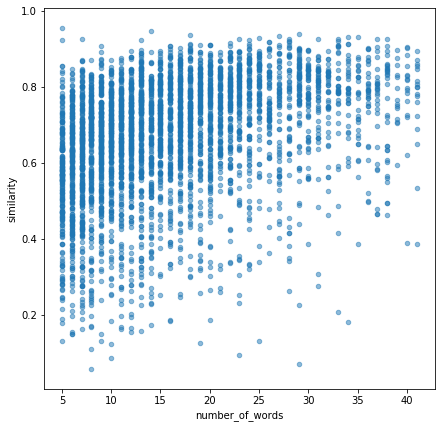

In [111]:
similarity_and_number_of_words_from_Answers_from_reviews_with_iwcs_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity', figsize=(7, 7), alpha=0.5)

#### Answers_from_reviews_with_iwcs_and_bidaf_with_wvc ####

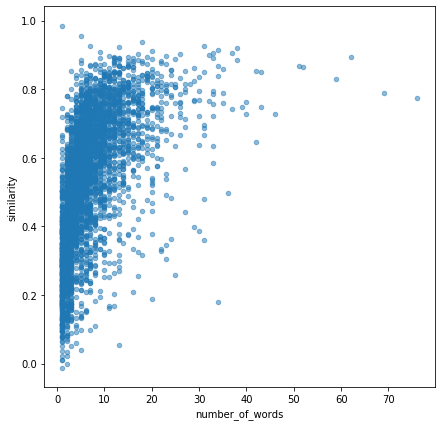

In [112]:
similarity_and_number_of_words_from_Answers_from_reviews_with_iwcs_and_bidaf_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity', figsize=(7, 7), alpha=0.5)

#### Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc ####

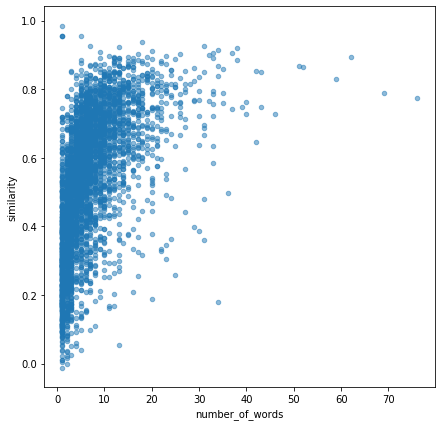

In [113]:
similarity_and_number_of_words_from_Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity',  figsize=(7, 7), alpha=0.5)

#### Answers_from_reviews_with_tf_idf_with_wvc ####

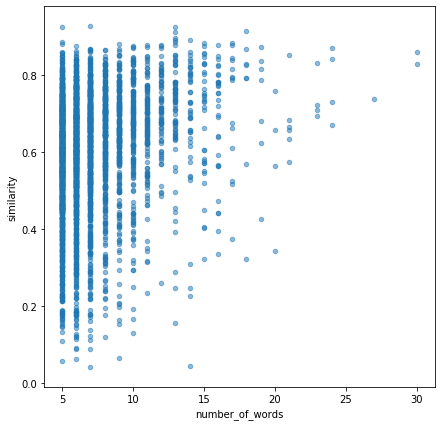

In [114]:
similarity_and_number_of_words_from_Answers_from_reviews_with_tf_idf_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity',  figsize=(7, 7), alpha=0.5)

#### Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc ####

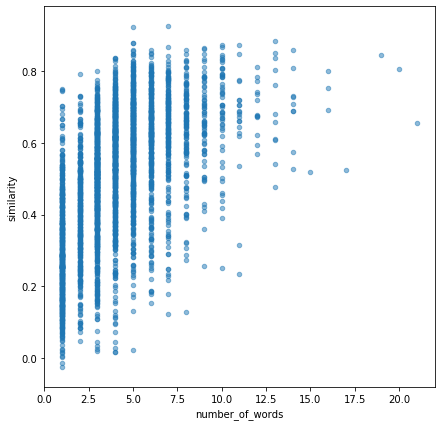

In [115]:
similarity_and_number_of_words_from_Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity',  figsize=(7, 7), alpha=0.5)

#### Answers_from_reviews_with_wv_with_wvc ####

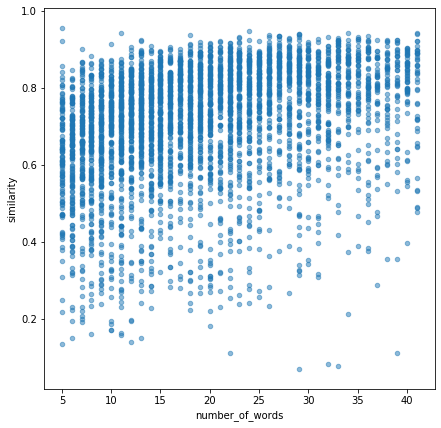

In [116]:
similarity_and_number_of_words_from_Answers_from_reviews_with_wv_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity',  figsize=(7, 7), alpha=0.5)

#### Answers_from_reviews_with_wv_and_bidaf_with_wvc ####

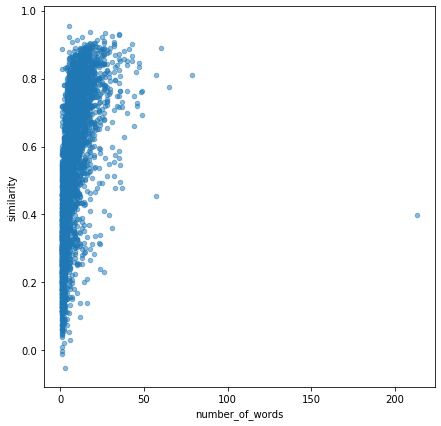

In [117]:
similarity_and_number_of_words_from_Answers_from_reviews_with_wv_and_bidaf_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity',  figsize=(7, 7), alpha=0.5)

#### Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc ####

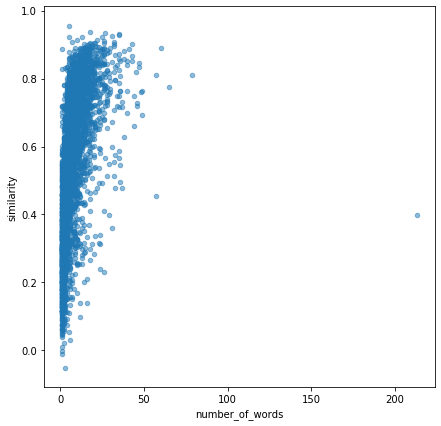

In [118]:
similarity_and_number_of_words_from_Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity',  figsize=(7, 7), alpha=0.5)

#### Answers_from_tips_with_iwcs_with_wvc ####

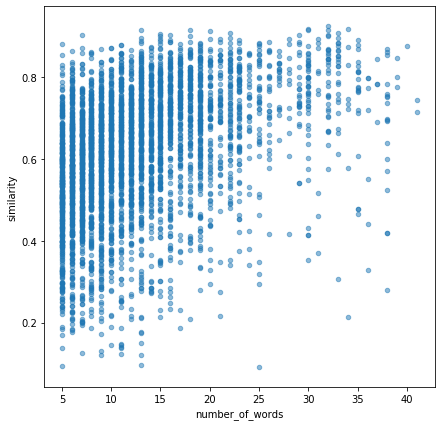

In [119]:
similarity_and_number_of_words_from_Answers_from_tips_with_iwcs_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity',  figsize=(7, 7), alpha=0.5)

#### Answers_from_tips_with_iwcs_and_bidaf_with_wvc ####

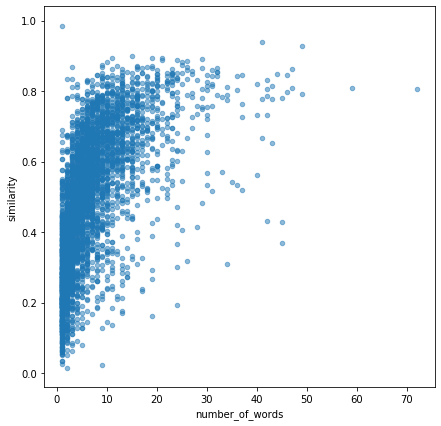

In [120]:
similarity_and_number_of_words_from_Answers_from_tips_with_iwcs_and_bidaf_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity',  figsize=(7, 7), alpha=0.5)

#### Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc ####

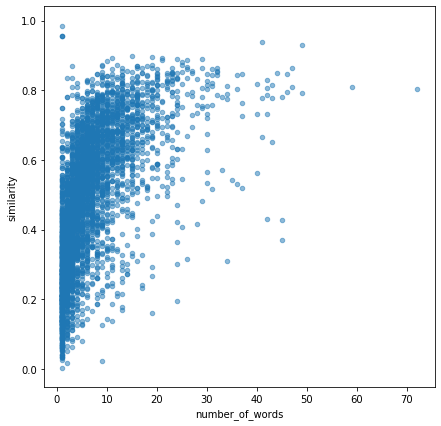

In [121]:
similarity_and_number_of_words_from_Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity',  figsize=(7, 7), alpha=0.5)

#### Answers_from_tips_with_tf_idf_with_wvc ####

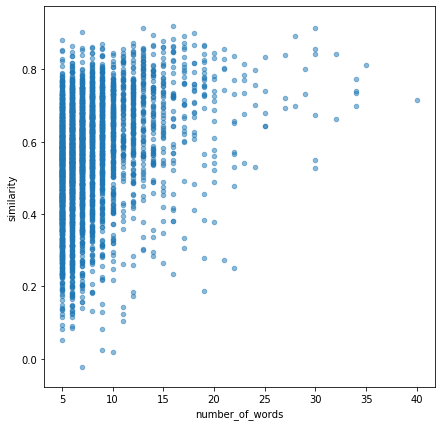

In [122]:
similarity_and_number_of_words_from_Answers_from_tips_with_tf_idf_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity',  figsize=(7, 7), alpha=0.5)

#### Answers_from_tips_with_tf_idf_and_bidaf_with_wvc ####

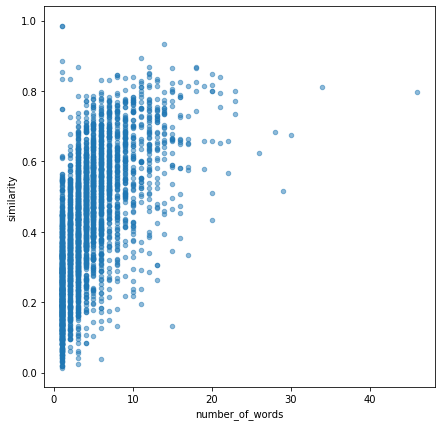

In [123]:
similarity_and_number_of_words_from_Answers_from_tips_with_tf_idf_and_bidaf_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity',  figsize=(7, 7), alpha=0.5)

#### Answers_from_tips_with_wv_with_wvc ####

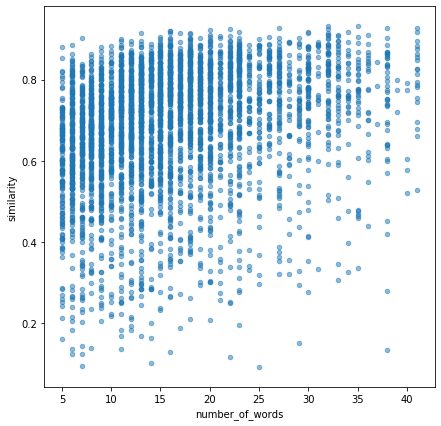

In [124]:
similarity_and_number_of_words_from_Answers_from_tips_with_wv_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity',  figsize=(7, 7), alpha=0.5)

#### Answers_from_tips_with_wv_and_bidaf_with_wvc ####

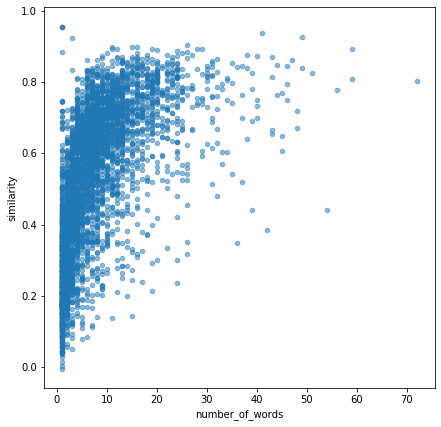

In [125]:
similarity_and_number_of_words_from_Answers_from_tips_with_wv_and_bidaf_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity',  figsize=(7, 7), alpha=0.5)

#### Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc ####

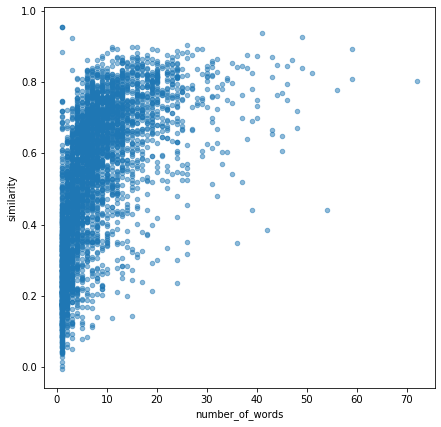

In [126]:
similarity_and_number_of_words_from_Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.plot(kind = 'scatter', x = 'number_of_words', y = 'similarity',  figsize=(7, 7), alpha=0.5)

In [222]:
del similarity_and_number_of_words_from_Answers_from_reviews_with_iwcs_with_wvc
del similarity_and_number_of_words_from_Answers_from_reviews_with_iwcs_and_bidaf_with_wvc
del similarity_and_number_of_words_from_Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc

del similarity_and_number_of_words_from_Answers_from_reviews_with_tf_idf_with_wvc
del similarity_and_number_of_words_from_Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc

del similarity_and_number_of_words_from_Answers_from_reviews_with_wv_with_wvc
del similarity_and_number_of_words_from_Answers_from_reviews_with_wv_and_bidaf_with_wvc
del similarity_and_number_of_words_from_Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc

del similarity_and_number_of_words_from_Answers_from_tips_with_iwcs_with_wvc
del similarity_and_number_of_words_from_Answers_from_tips_with_iwcs_and_bidaf_with_wvc
del similarity_and_number_of_words_from_Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc

del similarity_and_number_of_words_from_Answers_from_tips_with_tf_idf_with_wvc
del similarity_and_number_of_words_from_Answers_from_tips_with_tf_idf_and_bidaf_with_wvc

del similarity_and_number_of_words_from_Answers_from_tips_with_wv_with_wvc
del similarity_and_number_of_words_from_Answers_from_tips_with_wv_and_bidaf_with_wvc
del similarity_and_number_of_words_from_Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc

In [223]:
print("Mean similarity with Yelp's scrapped answers:")
temp_list_of_names = []
temp_list_of_similarity_with_yelp_answers_with_wvc = []

temp_list_of_names.append("Reviews with IWCS \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_iwcs_with_wvc.mean())
#temp_list_of_names.append("Reviews with IWCS and BiDAF \t\t\t\t\t: ")
#temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_iwcs_and_bidaf_with_wvc.mean())
temp_list_of_names.append("Reviews with IWCS and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.mean())

temp_list_of_names.append("Reviews with TF-IDF \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_tf_idf_with_wvc.mean())
temp_list_of_names.append("Reviews with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc.mean())

temp_list_of_names.append("Reviews with Centroid \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_wv_with_wvc.mean())
#temp_list_of_names.append("Reviews with Centroid and BiDAF \t\t\t\t: ")
#temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_wv_and_bidaf_with_wvc.mean())
temp_list_of_names.append("Reviews with Centroid and BiDAF without rearranging after BiDAF : ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.mean())

temp_list_of_names.append("Tips with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_iwcs_with_wvc.mean())
#temp_list_of_names.append("Tips with IWCS and BiDAF \t\t\t\t\t: ")
#temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_iwcs_and_bidaf_with_wvc.mean())
temp_list_of_names.append("Tips with IWCS and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.mean())

temp_list_of_names.append("Tips with TF-IDF \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_tf_idf_with_wvc.mean())
temp_list_of_names.append("Tips with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_tf_idf_and_bidaf_with_wvc.mean())

temp_list_of_names.append("Tips with Centroid \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_wv_with_wvc.mean())
#temp_list_of_names.append("Tips with Centroid and BiDAF \t\t\t\t\t: ")
#temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_wv_and_bidaf_with_wvc.mean())
temp_list_of_names.append("Tips with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.mean())

raw_data = {'model_names':temp_list_of_names,
            'similarity_with_yelp_answers_with_wvc':temp_list_of_similarity_with_yelp_answers_with_wvc
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'similarity_with_yelp_answers_with_wvc'])

temp_dataframe = temp_dataframe.sort_values(by='similarity_with_yelp_answers_with_wvc', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        similarity_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(similarity_with_yelp_answers_with_wvc))

Mean similarity with Yelp's scrapped answers:
Reviews with Centroid 						: 0.712382971330212
Tips with Centroid 						: 0.6858992589725498
Reviews with IWCS 						: 0.6712673167202701
Tips with IWCS 							: 0.6192825042054392
Reviews with TF-IDF 						: 0.6053436450948547
Tips with TF-IDF 						: 0.5656441301867763
Reviews with Centroid and BiDAF without rearranging after BiDAF : 0.5540001835449584
Reviews with IWCS and BiDAF without rearranging after BiDAF 	: 0.5275625027347965
Tips with Centroid and BiDAF without rearranging after BiDAF 	: 0.5249407973250655
Reviews with TF-IDF and BiDAF 					: 0.5072111128607945
Tips with IWCS and BiDAF without rearranging after BiDAF 	: 0.48587869582578197
Tips with TF-IDF and BiDAF 					: 0.42345862253675437


In [224]:
print("Min similarity with Yelp's scrapped answers:")
temp_list_of_names = []
temp_list_of_similarity_with_yelp_answers_with_wvc = []

temp_list_of_names.append("Reviews with IWCS \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_iwcs_with_wvc.min())
#temp_list_of_names.append("Reviews with IWCS and BiDAF \t\t\t\t\t: ")
#temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_iwcs_and_bidaf_with_wvc.min())
temp_list_of_names.append("Reviews with IWCS and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.min())

temp_list_of_names.append("Reviews with TF-IDF \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_tf_idf_with_wvc.min())
temp_list_of_names.append("Reviews with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc.min())

temp_list_of_names.append("Reviews with Centroid \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_wv_with_wvc.min())
#temp_list_of_names.append("Reviews with Centroid and BiDAF \t\t\t\t: ")
#temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_wv_and_bidaf_with_wvc.min())
temp_list_of_names.append("Reviews with Centroid and BiDAF without rearranging after BiDAF : ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.min())

temp_list_of_names.append("Tips with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_iwcs_with_wvc.min())
#temp_list_of_names.append("Tips with IWCS and BiDAF \t\t\t\t\t: ")
#temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_iwcs_and_bidaf_with_wvc.min())
temp_list_of_names.append("Tips with IWCS and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.min())

temp_list_of_names.append("Tips with TF-IDF \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_tf_idf_with_wvc.min())
temp_list_of_names.append("Tips with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_tf_idf_and_bidaf_with_wvc.min())

temp_list_of_names.append("Tips with Centroid \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_wv_with_wvc.min())
#temp_list_of_names.append("Tips with Centroid and BiDAF \t\t\t\t\t: ")
#temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_wv_and_bidaf_with_wvc.min())
temp_list_of_names.append("Tips with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.min())

raw_data = {'model_names':temp_list_of_names,
            'similarity_with_yelp_answers_with_wvc':temp_list_of_similarity_with_yelp_answers_with_wvc
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'similarity_with_yelp_answers_with_wvc'])

temp_dataframe = temp_dataframe.sort_values(by='similarity_with_yelp_answers_with_wvc', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        similarity_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(similarity_with_yelp_answers_with_wvc))

Min similarity with Yelp's scrapped answers:
Tips with IWCS 							: 0.0909460261464119
Tips with Centroid 						: 0.0909460261464119
Reviews with Centroid 						: 0.06852275133132935
Reviews with IWCS 						: 0.05659538879990578
Reviews with TF-IDF 						: 0.04154757037758827
Tips with TF-IDF and BiDAF 					: 0.014552250504493712
Tips with IWCS and BiDAF without rearranging after BiDAF 	: 0.0040680314414203176
Tips with Centroid and BiDAF without rearranging after BiDAF 	: -0.004806369077414274
Reviews with IWCS and BiDAF without rearranging after BiDAF 	: -0.01164971198886633
Tips with TF-IDF 						: -0.023729432374238968
Reviews with TF-IDF and BiDAF 					: -0.026395224034786224
Reviews with Centroid and BiDAF without rearranging after BiDAF : -0.05069160088896752


In [225]:
print("Max similarity with Yelp's scrapped answers:")
temp_list_of_names = []
temp_list_of_similarity_with_yelp_answers_with_wvc = []

temp_list_of_names.append("Reviews with IWCS \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_iwcs_with_wvc.max())
#temp_list_of_names.append("Reviews with IWCS and BiDAF \t\t\t\t\t: ")
#temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_iwcs_and_bidaf_with_wvc.max())
temp_list_of_names.append("Reviews with IWCS and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.max())

temp_list_of_names.append("Reviews with TF-IDF \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_tf_idf_with_wvc.max())
temp_list_of_names.append("Reviews with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc.max())

temp_list_of_names.append("Reviews with Centroid \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_wv_with_wvc.max())
#temp_list_of_names.append("Reviews with Centroid and BiDAF \t\t\t\t: ")
#temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_wv_and_bidaf_with_wvc.max())
temp_list_of_names.append("Reviews with Centroid and BiDAF without rearranging after BiDAF : ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.max())

temp_list_of_names.append("Tips with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_iwcs_with_wvc.max())
#temp_list_of_names.append("Tips with IWCS and BiDAF \t\t\t\t\t: ")
#temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_iwcs_and_bidaf_with_wvc.max())
temp_list_of_names.append("Tips with IWCS and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.max())

temp_list_of_names.append("Tips with TF-IDF \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_tf_idf_with_wvc.max())
temp_list_of_names.append("Tips with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_tf_idf_and_bidaf_with_wvc.max())

temp_list_of_names.append("Tips with Centroid \t\t\t\t\t\t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_wv_with_wvc.max())
#temp_list_of_names.append("Tips with Centroid and BiDAF \t\t\t\t\t: ")
#temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_wv_and_bidaf_with_wvc.max())
temp_list_of_names.append("Tips with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_similarity_with_yelp_answers_with_wvc.append(similarity_with_yelp_from_Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.max())

raw_data = {'model_names':temp_list_of_names,
            'similarity_with_yelp_answers_with_wvc':temp_list_of_similarity_with_yelp_answers_with_wvc
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'similarity_with_yelp_answers_with_wvc'])

temp_dataframe = temp_dataframe.sort_values(by='similarity_with_yelp_answers_with_wvc', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        similarity_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(similarity_with_yelp_answers_with_wvc))

Max similarity with Yelp's scrapped answers:
Reviews with IWCS and BiDAF without rearranging after BiDAF 	: 0.9852092862129213
Tips with IWCS and BiDAF without rearranging after BiDAF 	: 0.9852092862129213
Tips with TF-IDF and BiDAF 					: 0.9852092862129213
Tips with Centroid and BiDAF without rearranging after BiDAF 	: 0.9561175107955932
Reviews with IWCS 						: 0.9556753635406494
Reviews with Centroid 						: 0.9556753635406494
Reviews with Centroid and BiDAF without rearranging after BiDAF : 0.9556753635406494
Tips with Centroid 						: 0.931871235370636
Reviews with TF-IDF 						: 0.9264865517616272
Reviews with TF-IDF and BiDAF 					: 0.9264865517616272
Tips with IWCS 							: 0.9243521690368652
Tips with TF-IDF 						: 0.92010897397995


In [23]:
def remove_answers_from_df_if_not_in_common_user_rated_questions_list(dataframe, questions_list):
    temp_list_of_question = []
    temp_list_of_business = []
    temp_list_of_answer = []
    temp_list_of_similarity = []
    temp_list_of_execution_time_in_sec = []
    temp_list_of_human_rating = []
    
    for index, row in dataframe.iterrows():
        if ([row["question"], row["business"]] in questions_list):
            temp_list_of_question.append(row['question'])
            temp_list_of_business.append(row['business'])
            temp_list_of_answer.append(row['answer'])
            temp_list_of_similarity.append(row['similarity'])
            temp_list_of_execution_time_in_sec.append(row['execution_time_in_sec'])
            temp_list_of_human_rating.append(row['human_rating'])
    
    raw_data = {'question':temp_list_of_question,
                'business':temp_list_of_business,
                'answer':temp_list_of_answer,
                'similarity':temp_list_of_similarity,
                'execution_time_in_sec':temp_list_of_execution_time_in_sec,
                'human_rating':temp_list_of_human_rating
               }
    
    dataframe = pd.DataFrame(raw_data, columns = ['question', 'business', 'answer', 'similarity', 'execution_time_in_sec', 'human_rating'])
    
    return dataframe

In [24]:
def remove_from_user_rated_answers_compicated_questions(dataframe):
    temp_list_of_question = []
    temp_list_of_business = []
    temp_list_of_answer = []
    temp_list_of_similarity = []
    temp_list_of_execution_time_in_sec = []
    temp_list_of_human_rating = []
    
    for index, row in dataframe.iterrows():
        if (row['question'].count("?") < 2):
            temp_list_of_question.append(row['question'])
            temp_list_of_business.append(row['business'])
            temp_list_of_answer.append(row['answer'])
            temp_list_of_similarity.append(row['similarity'])
            temp_list_of_execution_time_in_sec.append(row['execution_time_in_sec'])
            temp_list_of_human_rating.append(row['human_rating'])
    
    raw_data = {'question':temp_list_of_question,
                'business':temp_list_of_business,
                'answer':temp_list_of_answer,
                'similarity':temp_list_of_similarity,
                'execution_time_in_sec':temp_list_of_execution_time_in_sec,
                'human_rating':temp_list_of_human_rating
               }
    
    dataframe = pd.DataFrame(raw_data, columns = ['question', 'business', 'answer', 'similarity', 'execution_time_in_sec', 'human_rating'])
    
    return dataframe

In [25]:
User_rated_answers_from_reviews_with_iwcs = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_REVIEWS_WITH_IWCS_WITH_WVC_FILE_PATH).dropna()
User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH).dropna()

User_rated_answers_from_reviews_with_tf_idf = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_REVIEWS_WITH_TF_IDF_WITH_WVC_FILE_PATH).dropna()
User_rated_answers_from_reviews_with_tf_idf_and_bidaf = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH).dropna()

User_rated_answers_from_reviews_with_wv = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_REVIEWS_WITH_WV_WITH_WVC_FILE_PATH).dropna()
User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH).dropna()

User_rated_answers_from_tips_with_iwcs = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_TIPS_WITH_IWCS_WITH_WVC_FILE_PATH).dropna()
User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH).dropna()

User_rated_answers_from_tips_with_tf_idf = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_TIPS_WITH_TF_IDF_WITH_WVC_FILE_PATH).dropna()
User_rated_answers_from_tips_with_tf_idf_and_bidaf = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH).dropna()

User_rated_answers_from_tips_with_wv = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_TIPS_WITH_WV_WITH_WVC_FILE_PATH).dropna()
User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = read_dataframe_from_csv_file(
    USER_RATED_ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH).dropna()

In [26]:
User_rated_answers_from_reviews_with_iwcs = remove_from_user_rated_answers_compicated_questions(
    User_rated_answers_from_reviews_with_iwcs)
User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = remove_from_user_rated_answers_compicated_questions(
    User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

User_rated_answers_from_reviews_with_tf_idf = remove_from_user_rated_answers_compicated_questions(
    User_rated_answers_from_reviews_with_tf_idf)
User_rated_answers_from_reviews_with_tf_idf_and_bidaf = remove_from_user_rated_answers_compicated_questions(
    User_rated_answers_from_reviews_with_tf_idf_and_bidaf)

User_rated_answers_from_reviews_with_wv = remove_from_user_rated_answers_compicated_questions(
    User_rated_answers_from_reviews_with_wv)
User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = remove_from_user_rated_answers_compicated_questions(
    User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)

User_rated_answers_from_tips_with_iwcs = remove_from_user_rated_answers_compicated_questions(
    User_rated_answers_from_tips_with_iwcs)
User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = remove_from_user_rated_answers_compicated_questions(
    User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

User_rated_answers_from_tips_with_tf_idf = remove_from_user_rated_answers_compicated_questions(
    User_rated_answers_from_tips_with_tf_idf)
User_rated_answers_from_tips_with_tf_idf_and_bidaf = remove_from_user_rated_answers_compicated_questions(
    User_rated_answers_from_tips_with_tf_idf_and_bidaf)

User_rated_answers_from_tips_with_wv = remove_from_user_rated_answers_compicated_questions(
    User_rated_answers_from_tips_with_wv)
User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = remove_from_user_rated_answers_compicated_questions(
    User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)

In [27]:
User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf

,question,business,answer,similarity,execution_time_in_sec,human_rating
0,All you can eat?,Gangnam Asian BBQ Dining,It's not all you can eat.,1.000000,2.667843,4.0
1,All you can eat?,Gangnam Asian BBQ Dining,No all you can eat.,1.000000,2.667843,4.0
2,All you can eat?,Gangnam Asian BBQ Dining,The place is not,0.909287,2.667843,1.0
3,All you can eat?,Gangnam Asian BBQ Dining,10/10,0.867534,2.667843,1.0
4,All you can eat?,Gangnam Asian BBQ Dining,every thing,0.854800,2.667843,1.0
...,...,...,...,...,...,...
223,Will they really kick you out after your 2 hou...,Bacchanal Buffet,after 25 minutes I had to walk around and ask ...,0.748444,10.189359,4.0
224,Will they really kick you out after your 2 hou...,Bacchanal Buffet,"We loved the food, dont get me wrong, but we h...",0.746478,10.189359,2.0
225,Will they really kick you out after your 2 hou...,Bacchanal Buffet,"We felt rushed the whole time, I barely got to...",0.744057,10.189359,5.0
226,Will they really kick you out after your 2 hou...,Bacchanal Buffet,lucky because one of the girl,0.741856,10.189359,1.0


In [28]:
def compute_questions_list(dataframe):
    dataframe_grouped = dataframe.groupby(['question', 'business'])
    questions_list = []
    
    for key, group in dataframe_grouped:
        #print(key)
        query = key[0]
        business = key[1]
        
        questions_list.append([query, business])
    
    return questions_list

def keep_only_common_questions_from_questions_list(user_rated_questions_list, new_user_rated_questions_list):
    temp_questions_list = []
    
    for x in new_user_rated_questions_list:
        if x in user_rated_questions_list:
            temp_questions_list.append(x)
    
    return temp_questions_list

In [29]:
common_user_rated_questions_list = compute_questions_list(User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)
print(": " + str(len(common_user_rated_questions_list)))

common_user_rated_questions_list = keep_only_common_questions_from_questions_list(
    common_user_rated_questions_list,
    compute_questions_list(User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf))
print(": " + str(len(common_user_rated_questions_list)))

common_user_rated_questions_list = keep_only_common_questions_from_questions_list(
    common_user_rated_questions_list,
    compute_questions_list(User_rated_answers_from_reviews_with_tf_idf))
print(": " + str(len(common_user_rated_questions_list)))

common_user_rated_questions_list = keep_only_common_questions_from_questions_list(
    common_user_rated_questions_list,
    compute_questions_list(User_rated_answers_from_reviews_with_tf_idf_and_bidaf))
print(": " + str(len(common_user_rated_questions_list)))

common_user_rated_questions_list = keep_only_common_questions_from_questions_list(
    common_user_rated_questions_list,
    compute_questions_list(User_rated_answers_from_reviews_with_wv))
print(": " + str(len(common_user_rated_questions_list)))

common_user_rated_questions_list = keep_only_common_questions_from_questions_list(
    common_user_rated_questions_list,
    compute_questions_list(User_rated_answers_from_reviews_with_iwcs))
print(": " + str(len(common_user_rated_questions_list)))

common_user_rated_questions_list = keep_only_common_questions_from_questions_list(
    common_user_rated_questions_list,
    compute_questions_list(User_rated_answers_from_tips_with_iwcs))
print(": " + str(len(common_user_rated_questions_list)))

common_user_rated_questions_list = keep_only_common_questions_from_questions_list(
    common_user_rated_questions_list,
    compute_questions_list(User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf))
print(": " + str(len(common_user_rated_questions_list)))

common_user_rated_questions_list = keep_only_common_questions_from_questions_list(
    common_user_rated_questions_list,
    compute_questions_list(User_rated_answers_from_tips_with_tf_idf))
print(": " + str(len(common_user_rated_questions_list)))

common_user_rated_questions_list = keep_only_common_questions_from_questions_list(
    common_user_rated_questions_list,
    compute_questions_list(User_rated_answers_from_tips_with_tf_idf_and_bidaf))
print(": " + str(len(common_user_rated_questions_list)))

common_user_rated_questions_list = keep_only_common_questions_from_questions_list(
    common_user_rated_questions_list,
    compute_questions_list(User_rated_answers_from_tips_with_wv))
print(": " + str(len(common_user_rated_questions_list)))

common_user_rated_questions_list = keep_only_common_questions_from_questions_list(
    common_user_rated_questions_list,
    compute_questions_list(User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf))
print(": " + str(len(common_user_rated_questions_list)))

print(len(common_user_rated_questions_list))
common_user_rated_questions_list

: 50
: 48
: 48
: 48
: 48
: 48
: 48
: 47
: 46
: 45
: 45
: 45
45


[['All you can eat?', 'Gangnam Asian BBQ Dining'],
 ['Any dress code?', 'Eiffel Tower'],
 ['Are crab legs served during brunch?', 'Wicked Spoon'],
 ['Are crab legs served during early morning brunch on Saturday and Sunday?',
  'Bacchanal Buffet'],
 ['Are the steamed crab legs also pre-cracked?', 'Bacchanal Buffet'],
 ['Are weekday dinner buffet any different form weekend dinner buffet?',
  'Bacchanal Buffet'],
 ['Best take out Pizza s. Vegas strip?', 'Secret Pizza'],
 ['Breakfast at the buffet and the price?', 'Studio B Buffet'],
 ["Can you let me know roughly what time one would have to get there on a Saturday to minimize their wait? I've just heard about this place and would love to try it out, don't even mind waiting either if the food is as good as it looks.",
  'Little Miss BBQ'],
 ['Do they have lobster?', 'Bacchanal Buffet'],
 ['Do they have macaroons at dinner?', 'Bacchanal Buffet'],
 ['Do they have the Bone Marrow here during brunch?', 'Wicked Spoon'],
 ['Do they still have th

In [30]:
print("User_rated_answers_from_reviews_with_iwcs: " + str(len(User_rated_answers_from_reviews_with_iwcs)))
print("User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf: " + str(len(User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)))

print("User_rated_answers_from_reviews_with_tf_idf: " + str(len(User_rated_answers_from_reviews_with_tf_idf)))
print("User_rated_answers_from_reviews_with_tf_idf_and_bidaf: " + str(len(User_rated_answers_from_reviews_with_tf_idf_and_bidaf)))

print("User_rated_answers_from_reviews_with_wv: " + str(len(User_rated_answers_from_reviews_with_wv)))
print("User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf: " + str(len(User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)))

print("User_rated_answers_from_tips_with_iwcs: " + str(len(User_rated_answers_from_tips_with_iwcs)))
print("User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf: " + str(len(User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)))

print("User_rated_answers_from_tips_with_tf_idf: " + str(len(User_rated_answers_from_tips_with_tf_idf)))
print("User_rated_answers_from_tips_with_tf_idf_and_bidaf: " + str(len(User_rated_answers_from_tips_with_tf_idf_and_bidaf)))

print("User_rated_answers_from_tips_with_wv: " + str(len(User_rated_answers_from_tips_with_wv)))
print("User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf: " + str(len(User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)))

User_rated_answers_from_reviews_with_iwcs: 265
User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf: 228
User_rated_answers_from_reviews_with_tf_idf: 265
User_rated_answers_from_reviews_with_tf_idf_and_bidaf: 245
User_rated_answers_from_reviews_with_wv: 265
User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf: 225
User_rated_answers_from_tips_with_iwcs: 265
User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf: 225
User_rated_answers_from_tips_with_tf_idf: 254
User_rated_answers_from_tips_with_tf_idf_and_bidaf: 221
User_rated_answers_from_tips_with_wv: 265
User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf: 230


In [31]:
print(len(User_rated_answers_from_reviews_with_iwcs.groupby(['question', 'business'])))
print(len(User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

print(len(User_rated_answers_from_reviews_with_tf_idf.groupby(['question', 'business'])))
print(len(User_rated_answers_from_reviews_with_tf_idf_and_bidaf.groupby(['question', 'business'])))

print(len(User_rated_answers_from_reviews_with_wv.groupby(['question', 'business'])))
print(len(User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

print(len(User_rated_answers_from_tips_with_iwcs.groupby(['question', 'business'])))
print(len(User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

print(len(User_rated_answers_from_tips_with_tf_idf.groupby(['question', 'business'])))
print(len(User_rated_answers_from_tips_with_tf_idf_and_bidaf.groupby(['question', 'business'])))

print(len(User_rated_answers_from_tips_with_wv.groupby(['question', 'business'])))
print(len(User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

53
50
53
53
53
50
53
50
52
50
53
50


In [32]:
User_rated_answers_from_reviews_with_iwcs = remove_answers_from_df_if_not_in_common_user_rated_questions_list(
    User_rated_answers_from_reviews_with_iwcs,
    common_user_rated_questions_list)
User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = remove_answers_from_df_if_not_in_common_user_rated_questions_list(
    User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf,
    common_user_rated_questions_list)

User_rated_answers_from_reviews_with_tf_idf = remove_answers_from_df_if_not_in_common_user_rated_questions_list(
    User_rated_answers_from_reviews_with_tf_idf,
    common_user_rated_questions_list)
User_rated_answers_from_reviews_with_tf_idf_and_bidaf = remove_answers_from_df_if_not_in_common_user_rated_questions_list(
    User_rated_answers_from_reviews_with_tf_idf_and_bidaf,
    common_user_rated_questions_list)

User_rated_answers_from_reviews_with_wv = remove_answers_from_df_if_not_in_common_user_rated_questions_list(
    User_rated_answers_from_reviews_with_wv,
    common_user_rated_questions_list)
User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = remove_answers_from_df_if_not_in_common_user_rated_questions_list(
    User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf,
    common_user_rated_questions_list)

User_rated_answers_from_tips_with_iwcs = remove_answers_from_df_if_not_in_common_user_rated_questions_list(
    User_rated_answers_from_tips_with_iwcs,
    common_user_rated_questions_list)
User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = remove_answers_from_df_if_not_in_common_user_rated_questions_list(
    User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf,
    common_user_rated_questions_list)

User_rated_answers_from_tips_with_tf_idf = remove_answers_from_df_if_not_in_common_user_rated_questions_list(
    User_rated_answers_from_tips_with_tf_idf,
    common_user_rated_questions_list)
User_rated_answers_from_tips_with_tf_idf_and_bidaf = remove_answers_from_df_if_not_in_common_user_rated_questions_list(
    User_rated_answers_from_tips_with_tf_idf_and_bidaf,
    common_user_rated_questions_list)

User_rated_answers_from_tips_with_wv = remove_answers_from_df_if_not_in_common_user_rated_questions_list(
    User_rated_answers_from_tips_with_wv,
    common_user_rated_questions_list)
User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = remove_answers_from_df_if_not_in_common_user_rated_questions_list(
    User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf,
    common_user_rated_questions_list)

In [35]:
print("User_rated_answers_from_reviews_with_iwcs: " + str(len(User_rated_answers_from_reviews_with_iwcs)))
print("User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf: " + str(len(User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)))

print("User_rated_answers_from_reviews_with_tf_idf: " + str(len(User_rated_answers_from_reviews_with_tf_idf)))
print("User_rated_answers_from_reviews_with_tf_idf_and_bidaf: " + str(len(User_rated_answers_from_reviews_with_tf_idf_and_bidaf)))

print("User_rated_answers_from_reviews_with_wv: " + str(len(User_rated_answers_from_reviews_with_wv)))
print("User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf: " + str(len(User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)))

print("User_rated_answers_from_tips_with_iwcs: " + str(len(User_rated_answers_from_tips_with_iwcs)))
print("User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf: " + str(len(User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)))

print("User_rated_answers_from_tips_with_tf_idf: " + str(len(User_rated_answers_from_tips_with_tf_idf)))
print("User_rated_answers_from_tips_with_tf_idf_and_bidaf: " + str(len(User_rated_answers_from_tips_with_tf_idf_and_bidaf)))

print("User_rated_answers_from_tips_with_wv: " + str(len(User_rated_answers_from_tips_with_wv)))
print("User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf: " + str(len(User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)))

User_rated_answers_from_reviews_with_iwcs: 225
User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf: 217
User_rated_answers_from_reviews_with_tf_idf: 225
User_rated_answers_from_reviews_with_tf_idf_and_bidaf: 218
User_rated_answers_from_reviews_with_wv: 225
User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf: 214
User_rated_answers_from_tips_with_iwcs: 225
User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf: 216
User_rated_answers_from_tips_with_tf_idf: 219
User_rated_answers_from_tips_with_tf_idf_and_bidaf: 211
User_rated_answers_from_tips_with_wv: 225
User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf: 218


In [34]:
print(len(User_rated_answers_from_reviews_with_iwcs.groupby(['question', 'business'])))
print(len(User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

print(len(User_rated_answers_from_reviews_with_tf_idf.groupby(['question', 'business'])))
print(len(User_rated_answers_from_reviews_with_tf_idf_and_bidaf.groupby(['question', 'business'])))

print(len(User_rated_answers_from_reviews_with_wv.groupby(['question', 'business'])))
print(len(User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

print(len(User_rated_answers_from_tips_with_iwcs.groupby(['question', 'business'])))
print(len(User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

print(len(User_rated_answers_from_tips_with_tf_idf.groupby(['question', 'business'])))
print(len(User_rated_answers_from_tips_with_tf_idf_and_bidaf.groupby(['question', 'business'])))

print(len(User_rated_answers_from_tips_with_wv.groupby(['question', 'business'])))
print(len(User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.groupby(['question', 'business'])))

45
45
45
45
45
45
45
45
45
45
45
45


In [36]:
print(len(User_rated_answers_from_reviews_with_iwcs.groupby(['business'])))
print(len(User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.groupby(['business'])))

print(len(User_rated_answers_from_reviews_with_tf_idf.groupby(['business'])))
print(len(User_rated_answers_from_reviews_with_tf_idf_and_bidaf.groupby(['business'])))

print(len(User_rated_answers_from_reviews_with_wv.groupby(['business'])))
print(len(User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.groupby(['business'])))

print(len(User_rated_answers_from_tips_with_iwcs.groupby(['business'])))
print(len(User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.groupby(['business'])))

print(len(User_rated_answers_from_tips_with_tf_idf.groupby(['business'])))
print(len(User_rated_answers_from_tips_with_tf_idf_and_bidaf.groupby(['business'])))

print(len(User_rated_answers_from_tips_with_wv.groupby(['business'])))
print(len(User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.groupby(['business'])))

18
18
18
18
18
18
18
18
18
18
18
18


In [238]:
human_ratings_from_user_rated_answers_from_reviews_with_iwcs = User_rated_answers_from_reviews_with_iwcs["human_rating"]
human_ratings_from_user_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf["human_rating"]

human_ratings_from_user_rated_answers_from_reviews_with_tf_idf = User_rated_answers_from_reviews_with_tf_idf["human_rating"]
human_ratings_from_user_rated_answers_from_reviews_with_tf_idf_and_bidaf = User_rated_answers_from_reviews_with_tf_idf_and_bidaf["human_rating"]

human_ratings_from_user_rated_answers_from_reviews_with_wv = User_rated_answers_from_reviews_with_wv["human_rating"]
human_ratings_from_user_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf["human_rating"]

human_ratings_from_user_rated_answers_from_tips_with_iwcs = User_rated_answers_from_tips_with_iwcs["human_rating"]
human_ratings_from_user_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf["human_rating"]

human_ratings_from_user_rated_answers_from_tips_with_tf_idf = User_rated_answers_from_tips_with_tf_idf["human_rating"]
human_ratings_from_user_rated_answers_from_tips_with_tf_idf_and_bidaf = User_rated_answers_from_tips_with_tf_idf_and_bidaf["human_rating"]

human_ratings_from_user_rated_answers_from_tips_with_wv = User_rated_answers_from_tips_with_wv["human_rating"]
human_ratings_from_user_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf["human_rating"]

In [239]:
def add_number_of_hidden_questions_from_questions_to_dataframe(dataframe):
    temp_list_of_question = []
    temp_list_of_businesses = []
    temp_list_of_answer = []
    temp_list_of_hidden_questions = []
    temp_list = []
    
    for index, row in dataframe.iterrows():
        if (row['question'], row['business'], row['answer']) in temp_list:
            continue
        
        temp_list_of_question.append(row['question'])
        temp_list_of_businesses.append(row['business'])
        temp_list_of_answer.append(row['answer'])
        temp_list.append((['question'], row['business'], row['answer']))
        temp_list_of_hidden_questions.append(row['question'].count("?"))
    
    
    raw_data = {'question':temp_list_of_question,
                'business':temp_list_of_businesses,
                'answer':temp_list_of_answer,
                'hidden_questions':temp_list_of_hidden_questions
               }

    dataframe = pd.DataFrame(
        raw_data,
        columns = ['question', 'business', 'answer', 'hidden_questions'])
    
    return dataframe

In [240]:
hidden_questions_from_reviews_with_iwcs = add_number_of_hidden_questions_from_questions_to_dataframe(User_rated_answers_from_reviews_with_iwcs)
hidden_questions_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = add_number_of_hidden_questions_from_questions_to_dataframe(User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

hidden_questions_from_reviews_with_tf_idf = add_number_of_hidden_questions_from_questions_to_dataframe(User_rated_answers_from_reviews_with_tf_idf)
hidden_questions_from_reviews_with_tf_idf_and_bidaf = add_number_of_hidden_questions_from_questions_to_dataframe(User_rated_answers_from_reviews_with_tf_idf_and_bidaf)

hidden_questions_from_reviews_with_wv = add_number_of_hidden_questions_from_questions_to_dataframe(User_rated_answers_from_reviews_with_wv)
hidden_questions_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = add_number_of_hidden_questions_from_questions_to_dataframe(User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)

hidden_questions_from_tips_with_iwcs = add_number_of_hidden_questions_from_questions_to_dataframe(User_rated_answers_from_tips_with_iwcs)
hidden_questions_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = add_number_of_hidden_questions_from_questions_to_dataframe(User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

hidden_questions_from_tips_with_tf_idf = add_number_of_hidden_questions_from_questions_to_dataframe(User_rated_answers_from_tips_with_tf_idf)
hidden_questions_from_tips_with_tf_idf_and_bidaf = add_number_of_hidden_questions_from_questions_to_dataframe(User_rated_answers_from_tips_with_tf_idf_and_bidaf)

hidden_questions_from_tips_with_wv = add_number_of_hidden_questions_from_questions_to_dataframe(User_rated_answers_from_tips_with_wv)
hidden_questions_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = add_number_of_hidden_questions_from_questions_to_dataframe(User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)

In [241]:
def compute_number_of_hidden_questions(dataframe):
    temp_sum = 0

    for x in dataframe["hidden_questions"]:
        if x > 1:
            temp_sum += 1
    
    return temp_sum

In [242]:
number_of_hidden_questions = compute_number_of_hidden_questions(hidden_questions_from_reviews_with_iwcs)
print("Queries from Reviews with IWCS:")
print("    queries with many questions : ", number_of_hidden_questions)
print("    queries with only one question : ", len(hidden_questions_from_reviews_with_iwcs["hidden_questions"]) - number_of_hidden_questions)
number_of_hidden_questions = compute_number_of_hidden_questions(hidden_questions_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)
print("Queries from Reviews with IWCS and BiDAF without rearranging after bidaf:")
print("    queries with many questions : ", number_of_hidden_questions)
print("    queries with only one question : ", len(hidden_questions_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf["hidden_questions"]) - number_of_hidden_questions)

number_of_hidden_questions = compute_number_of_hidden_questions(hidden_questions_from_reviews_with_tf_idf)
print("Queries from Reviews with TF-IDF:")
print("    queries with many questions : ", number_of_hidden_questions)
print("    queries with only one question : ", len(hidden_questions_from_reviews_with_tf_idf["hidden_questions"]) - number_of_hidden_questions)
number_of_hidden_questions = compute_number_of_hidden_questions(hidden_questions_from_reviews_with_tf_idf_and_bidaf)
print("Queries from Reviews with TF-IDF and BiDAF without rearranging after bidaf:")
print("    queries with many questions : ", number_of_hidden_questions)
print("    queries with only one question : ", len(hidden_questions_from_reviews_with_tf_idf_and_bidaf["hidden_questions"]) - number_of_hidden_questions)

number_of_hidden_questions = compute_number_of_hidden_questions(hidden_questions_from_reviews_with_wv)
print("Queries from Reviews with WV:")
print("    queries with many questions : ", number_of_hidden_questions)
print("    queries with only one question : ", len(hidden_questions_from_reviews_with_wv["hidden_questions"]) - number_of_hidden_questions)
number_of_hidden_questions = compute_number_of_hidden_questions(hidden_questions_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)
print("Queries from Reviews with WV and BiDAF without rearranging after bidaf:")
print("    queries with many questions : ", number_of_hidden_questions)
print("    queries with only one question : ", len(hidden_questions_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf["hidden_questions"]) - number_of_hidden_questions)

number_of_hidden_questions = compute_number_of_hidden_questions(hidden_questions_from_tips_with_iwcs)
print("Queries from Tips with IWCS:")
print("    queries with many questions : ", number_of_hidden_questions)
print("    queries with only one question : ", len(hidden_questions_from_tips_with_iwcs["hidden_questions"]) - number_of_hidden_questions)
number_of_hidden_questions = compute_number_of_hidden_questions(hidden_questions_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)
print("Queries from Tips with IWCS and BiDAF without rearranging after bidaf:")
print("    queries with many questions : ", number_of_hidden_questions)
print("    queries with only one question : ", len(hidden_questions_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf["hidden_questions"]) - number_of_hidden_questions)

number_of_hidden_questions = compute_number_of_hidden_questions(hidden_questions_from_tips_with_tf_idf)
print("Queries from Tips with TF-IDF:")
print("    queries with many questions : ", number_of_hidden_questions)
print("    queries with only one question : ", len(hidden_questions_from_tips_with_tf_idf["hidden_questions"]) - number_of_hidden_questions)
number_of_hidden_questions = compute_number_of_hidden_questions(hidden_questions_from_tips_with_tf_idf_and_bidaf)
print("Queries from Tips with TF-IDF and BiDAF without rearranging after bidaf:")
print("    queries with many questions : ", number_of_hidden_questions)
print("    queries with only one question : ", len(hidden_questions_from_tips_with_tf_idf_and_bidaf["hidden_questions"]) - number_of_hidden_questions)

number_of_hidden_questions = compute_number_of_hidden_questions(hidden_questions_from_tips_with_wv)
print("Queries from Tips with WV:")
print("    queries with many questions : ", number_of_hidden_questions)
print("    queries with only one question : ", len(hidden_questions_from_tips_with_wv["hidden_questions"]) - number_of_hidden_questions)
number_of_hidden_questions = compute_number_of_hidden_questions(hidden_questions_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)
print("Queries from Tips with WV and BiDAF without rearranging after bidaf:")
print("    queries with many questions : ", number_of_hidden_questions)
print("    queries with only one question : ", len(hidden_questions_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf["hidden_questions"]) - number_of_hidden_questions)

Queries from Reviews with IWCS:
    queries with many questions :  0
    queries with only one question :  225
Queries from Reviews with IWCS and BiDAF without rearranging after bidaf:
    queries with many questions :  0
    queries with only one question :  217
Queries from Reviews with TF-IDF:
    queries with many questions :  0
    queries with only one question :  225
Queries from Reviews with TF-IDF and BiDAF without rearranging after bidaf:
    queries with many questions :  0
    queries with only one question :  218
Queries from Reviews with WV:
    queries with many questions :  0
    queries with only one question :  225
Queries from Reviews with WV and BiDAF without rearranging after bidaf:
    queries with many questions :  0
    queries with only one question :  214
Queries from Tips with IWCS:
    queries with many questions :  0
    queries with only one question :  225
Queries from Tips with IWCS and BiDAF without rearranging after bidaf:
    queries with many questio

In [243]:
print("Number of rated answers for:")

print("reviews with IWCS \t\t\t\t\t\t\t: " + str(len(human_ratings_from_user_rated_answers_from_reviews_with_iwcs)))
print("reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: " + str(len(human_ratings_from_user_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)))

print("reviews with TF-IDF \t\t\t\t\t\t\t: " + str(len(human_ratings_from_user_rated_answers_from_reviews_with_tf_idf)))
print("reviews with TF-IDF and BiDAF \t\t\t\t\t\t: " + str(len(human_ratings_from_user_rated_answers_from_reviews_with_tf_idf_and_bidaf)))

print("reviews with Centroids \t\t\t\t\t\t\t: " + str(len(human_ratings_from_user_rated_answers_from_reviews_with_wv)))
print("reviews with Centroids and BiDAF without rearranging after BiDAF \t: " + str(len(human_ratings_from_user_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)))

print("tips with IWCS \t\t\t\t\t\t\t\t: " + str(len(human_ratings_from_user_rated_answers_from_tips_with_iwcs)))
print("tips with IWCS and BiDAF without rearranging after BiDAF \t\t: " + str(len(human_ratings_from_user_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)))

print("tips with TF-IDF \t\t\t\t\t\t\t: " + str(len(human_ratings_from_user_rated_answers_from_tips_with_tf_idf)))
print("tips with TF-IDF and BiDAF \t\t\t\t\t\t: " + str(len(human_ratings_from_user_rated_answers_from_tips_with_tf_idf_and_bidaf)))

print("tips with Centroids \t\t\t\t\t\t\t: " + str(len(human_ratings_from_user_rated_answers_from_tips_with_wv)))
print("tips with Centroids and BiDAF without rearranging after BiDAF \t\t: " + str(len(human_ratings_from_user_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)))
temp_sum = len(human_ratings_from_user_rated_answers_from_reviews_with_iwcs) + len(human_ratings_from_user_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf) + len(human_ratings_from_user_rated_answers_from_reviews_with_tf_idf) + len(human_ratings_from_user_rated_answers_from_reviews_with_tf_idf_and_bidaf) + len(human_ratings_from_user_rated_answers_from_reviews_with_wv) + len(human_ratings_from_user_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf) + len(human_ratings_from_user_rated_answers_from_tips_with_iwcs) + len(human_ratings_from_user_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf) + len(human_ratings_from_user_rated_answers_from_tips_with_tf_idf) + len(human_ratings_from_user_rated_answers_from_tips_with_tf_idf_and_bidaf) + len(human_ratings_from_user_rated_answers_from_tips_with_wv) + len(human_ratings_from_user_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)
print("Sum : " + str(temp_sum))

Number of rated answers for:
reviews with IWCS 							: 225
reviews with IWCS and BiDAF without rearranging after BiDAF 		: 217
reviews with TF-IDF 							: 225
reviews with TF-IDF and BiDAF 						: 218
reviews with Centroids 							: 225
reviews with Centroids and BiDAF without rearranging after BiDAF 	: 214
tips with IWCS 								: 225
tips with IWCS and BiDAF without rearranging after BiDAF 		: 216
tips with TF-IDF 							: 219
tips with TF-IDF and BiDAF 						: 211
tips with Centroids 							: 225
tips with Centroids and BiDAF without rearranging after BiDAF 		: 218
Sum : 2638


In [244]:
print("Mean of human rated answers for:")
temp_list_of_names = []
temp_list_of_mean_human_ratings = []

temp_list_of_names.append("Reviews with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_human_ratings.append(human_ratings_from_user_rated_answers_from_reviews_with_iwcs.mean())
temp_list_of_names.append("Reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_human_ratings.append(human_ratings_from_user_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.mean())

temp_list_of_names.append("Reviews with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_human_ratings.append(human_ratings_from_user_rated_answers_from_reviews_with_tf_idf.mean())
temp_list_of_names.append("Reviews with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_human_ratings.append(human_ratings_from_user_rated_answers_from_reviews_with_tf_idf_and_bidaf.mean())

temp_list_of_names.append("Reviews with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_human_ratings.append(human_ratings_from_user_rated_answers_from_reviews_with_wv.mean())
temp_list_of_names.append("Reviews with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_human_ratings.append(human_ratings_from_user_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.mean())

temp_list_of_names.append("Tips with IWCS \t\t\t\t\t\t\t\t: ")
temp_list_of_mean_human_ratings.append(human_ratings_from_user_rated_answers_from_tips_with_iwcs.mean())
temp_list_of_names.append("Tips with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_human_ratings.append(human_ratings_from_user_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.mean())

temp_list_of_names.append("Tips with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_human_ratings.append(human_ratings_from_user_rated_answers_from_tips_with_tf_idf.mean())
temp_list_of_names.append("Tips with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_human_ratings.append(human_ratings_from_user_rated_answers_from_tips_with_tf_idf_and_bidaf.mean())

temp_list_of_names.append("Tips with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_human_ratings.append(human_ratings_from_user_rated_answers_from_tips_with_wv.mean())
temp_list_of_names.append("Tips with Centroid and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_human_ratings.append(human_ratings_from_user_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.mean())

raw_data = {'model_names':temp_list_of_names,
            'mean_human_ratings':temp_list_of_mean_human_ratings
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'mean_human_ratings'])

temp_dataframe = temp_dataframe.sort_values(by='mean_human_ratings', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        ratings_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(ratings_with_yelp_answers_with_wvc))

Mean of human rated answers for:
Reviews with Centroid 							: 2.8755555555555556
Reviews with IWCS 							: 2.6533333333333333
Tips with Centroid 							: 2.582222222222222
Tips with IWCS 								: 2.506666666666667
Tips with TF-IDF 							: 2.3789954337899544
Reviews with IWCS and BiDAF without rearranging after BiDAF 		: 2.216589861751152
Reviews with TF-IDF 							: 2.2044444444444444
Reviews with Centroid and BiDAF without rearranging after BiDAF 	: 2.191588785046729
Reviews with TF-IDF and BiDAF 						: 1.9357798165137614
Tips with IWCS and BiDAF without rearranging after BiDAF 		: 1.8981481481481481
Tips with TF-IDF and BiDAF 						: 1.8909952606635072
Tips with Centroid and BiDAF without rearranging after BiDAF 		: 1.8256880733944953


Reference from https://gist.github.com/bwhite/3726239

Score is discounted cumulative gain (dcg)
    Relevance is positive real values.  Can use binary
    as the previous methods.
    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf

    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> dcg_at_k(r, 1)
    3.0
    >>> dcg_at_k(r, 1, method=1)
    3.0
    >>> dcg_at_k(r, 2)
    5.0
    >>> dcg_at_k(r, 2, method=1)
    4.2618595071429155
    >>> dcg_at_k(r, 10)
    9.6051177391888114
    >>> dcg_at_k(r, 11)
    9.6051177391888114
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]
    Returns:
        Discounted cumulative gain

In [245]:
def dcg_at_k(r, k, method=0):
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.

Score is normalized discounted cumulative gain (ndcg)
    Relevance is positive real values.  Can use binary
    as the previous methods.
    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf

    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> ndcg_at_k(r, 1)
    1.0
    >>> r = [2, 1, 2, 0]
    >>> ndcg_at_k(r, 4)
    0.9203032077642922
    >>> ndcg_at_k(r, 4, method=1)
    0.96519546960144276
    >>> ndcg_at_k([0], 1)
    0.0
    >>> ndcg_at_k([1], 2)
    1.0
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]
    Returns:
        Normalized discounted cumulative gain

In [246]:
def ndcg_at_k(r, k, method=0):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

In [247]:
def compute_score(df, k, method=0):
    r = df['human_rating'].tolist()
    
    return ndcg_at_k(r, k, method)

In [248]:
def compute_questions_list(dataframe):
    dataframe_grouped = dataframe.groupby(['question', 'business'])
    questions_list = []
    
    for key, group in dataframe_grouped:
        print(key)
        query = key[0]
        business = key[1]
        
        questions_list.append([query, business])
    
    return questions_list

In [249]:
def remove_unnecessary_columns(df):
    columns_to_drop = []
    columns_not_to_drop = ["question", "business", "similarity_with_yelp_answers_with_wvc"]
    for column in df.columns:
        if column not in columns_not_to_drop:
            columns_to_drop.append(column)

    return df.drop(columns=columns_to_drop)

In [250]:
def get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(question, business, model_with_different_options_code):
    list_of_ratings = []
    
    if model_with_different_options_code != WC_WITH_REVIEWS_CODE_NUMBER:
        for row in Answers_from_reviews_with_wv_with_wvc.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.similarity_with_yelp_answers_with_wvc)
    
    if model_with_different_options_code != WC_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER:
        for row in Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.similarity_with_yelp_answers_with_wvc)
    
    if model_with_different_options_code != WC_WITH_TIPS_CODE_NUMBER:
        for row in Answers_from_tips_with_wv_with_wvc.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.similarity_with_yelp_answers_with_wvc)
    
    if model_with_different_options_code != WC_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER:
        for row in Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.similarity_with_yelp_answers_with_wvc)
    
    if model_with_different_options_code != IWCS_WITH_REVIEWS_CODE_NUMBER:
        for row in Answers_from_reviews_with_iwcs_with_wvc.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.similarity_with_yelp_answers_with_wvc)
    
    if model_with_different_options_code != IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER:
        for row in Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.similarity_with_yelp_answers_with_wvc)
    
    if model_with_different_options_code != IWCS_WITH_TIPS_CODE_NUMBER:
        for row in Answers_from_tips_with_iwcs_with_wvc.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.similarity_with_yelp_answers_with_wvc)
    
    if model_with_different_options_code != IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER:
        for row in Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.similarity_with_yelp_answers_with_wvc)
    
    if model_with_different_options_code != TF_IDF_WITH_REVIEWS_CODE_NUMBER:
        for row in Answers_from_reviews_with_tf_idf_with_wvc.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.similarity_with_yelp_answers_with_wvc)
    
    if model_with_different_options_code != TF_IDF_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER:
        for row in Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.similarity_with_yelp_answers_with_wvc)
    
    if model_with_different_options_code != TF_IDF_WITH_TIPS_CODE_NUMBER:
        for row in Answers_from_tips_with_tf_idf_with_wvc.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.similarity_with_yelp_answers_with_wvc)
    
    if model_with_different_options_code != TF_IDF_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER:
        for row in Answers_from_tips_with_tf_idf_and_bidaf_with_wvc.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.similarity_with_yelp_answers_with_wvc)
    
    return list_of_ratings

In [251]:
def get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(question, business, model_with_different_options_code):
    list_of_ratings = []
    
    if model_with_different_options_code != WC_WITH_REVIEWS_CODE_NUMBER:
        for row in User_rated_answers_from_reviews_with_wv.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.human_rating)
    if model_with_different_options_code != WC_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER:
        for row in User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.human_rating)
    if model_with_different_options_code != WC_WITH_TIPS_CODE_NUMBER:
        for row in User_rated_answers_from_tips_with_wv.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.human_rating)
    if model_with_different_options_code != WC_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER:
        for row in User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.human_rating)
    
    if model_with_different_options_code != IWCS_WITH_REVIEWS_CODE_NUMBER:
        for row in User_rated_answers_from_reviews_with_iwcs.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.human_rating)
    if model_with_different_options_code != IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER:
        for row in User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.human_rating)
    if model_with_different_options_code != IWCS_WITH_TIPS_CODE_NUMBER:
        for row in User_rated_answers_from_tips_with_iwcs.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.human_rating)
    if model_with_different_options_code != IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER:
        for row in User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.human_rating)
    
    if model_with_different_options_code != TF_IDF_WITH_REVIEWS_CODE_NUMBER:
        for row in User_rated_answers_from_reviews_with_tf_idf.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.human_rating)
    if model_with_different_options_code != TF_IDF_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER:
        for row in User_rated_answers_from_reviews_with_tf_idf_and_bidaf.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.human_rating)
    if model_with_different_options_code != TF_IDF_WITH_TIPS_CODE_NUMBER:
        for row in User_rated_answers_from_tips_with_tf_idf.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.human_rating)
    if model_with_different_options_code != TF_IDF_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER:
        for row in User_rated_answers_from_tips_with_tf_idf_and_bidaf.itertuples():
            if (question == row.question and business == row.business):
                list_of_ratings.append(row.human_rating)
    
    return list_of_ratings

In [252]:
questions_list = compute_questions_list(User_rated_answers_from_tips_with_wv)

('All you can eat?', 'Gangnam Asian BBQ Dining')
('Any dress code?', 'Eiffel Tower')
('Are crab legs served during brunch?', 'Wicked Spoon')
('Are crab legs served during early morning brunch on Saturday and Sunday?', 'Bacchanal Buffet')
('Are the steamed crab legs also pre-cracked?', 'Bacchanal Buffet')
('Are weekday dinner buffet any different form weekend dinner buffet?', 'Bacchanal Buffet')
('Best take out Pizza s. Vegas strip?', 'Secret Pizza')
('Breakfast at the buffet and the price?', 'Studio B Buffet')
("Can you let me know roughly what time one would have to get there on a Saturday to minimize their wait? I've just heard about this place and would love to try it out, don't even mind waiting either if the food is as good as it looks.", 'Little Miss BBQ')
('Do they have lobster?', 'Bacchanal Buffet')
('Do they have macaroons at dinner?', 'Bacchanal Buffet')
('Do they have the Bone Marrow here during brunch?', 'Wicked Spoon')
('Do they still have the miso chilean sea bass?\nNot t

In [253]:
WC_WITH_REVIEWS_CODE_NUMBER = 0
WC_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER = 1
WC_WITH_TIPS_CODE_NUMBER = 2
WC_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER = 3

IWCS_WITH_REVIEWS_CODE_NUMBER = 4
IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER = 5
IWCS_WITH_TIPS_CODE_NUMBER = 6
IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER = 7

TF_IDF_WITH_REVIEWS_CODE_NUMBER = 8
TF_IDF_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER = 9
TF_IDF_WITH_TIPS_CODE_NUMBER = 10
TF_IDF_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER = 11

In [254]:
Answers_from_reviews_with_iwcs_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_REVIEWS_WITH_IWCS_WITH_WVC_FILE_PATH).dropna())
Answers_from_reviews_with_iwcs_and_bidaf_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH).dropna())
Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_REVIEWS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH).dropna())

Answers_from_reviews_with_tf_idf_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_REVIEWS_WITH_TF_IDF_WITH_WVC_FILE_PATH).dropna())
Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_REVIEWS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH).dropna())

Answers_from_reviews_with_wv_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_REVIEWS_WITH_WV_WITH_WVC_FILE_PATH).dropna())
Answers_from_reviews_with_wv_and_bidaf_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH).dropna())
Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_REVIEWS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH).dropna())

Answers_from_tips_with_iwcs_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_TIPS_WITH_IWCS_WITH_WVC_FILE_PATH).dropna())
Answers_from_tips_with_iwcs_and_bidaf_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITH_WVC_FILE_PATH).dropna())
Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_TIPS_WITH_IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH).dropna())

Answers_from_tips_with_tf_idf_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_TIPS_WITH_TF_IDF_WITH_WVC_FILE_PATH).dropna())
Answers_from_tips_with_tf_idf_and_bidaf_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_TIPS_WITH_TF_IDF_AND_BIDAF_WITH_WVC_FILE_PATH).dropna())

Answers_from_tips_with_wv_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_TIPS_WITH_WV_WITH_WVC_FILE_PATH).dropna())
Answers_from_tips_with_wv_and_bidaf_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITH_WVC_FILE_PATH).dropna())
Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc = remove_unnecessary_columns(
    read_dataframe_from_csv_file(
        ANSWERS_FROM_TIPS_WITH_WV_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_WVC_FILE_PATH).dropna())

In [255]:
Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc

,question,business,similarity_with_yelp_answers_with_wvc
0,AYCE? Or ala carte?,Soho Japanese Restaurant,0.219511
1,AYCE? Or ala carte?,Soho Japanese Restaurant,0.360374
3,AYCE? Or ala carte?,Soho Japanese Restaurant,0.112268
5,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,0.471644
7,About how much is the extra fees added up afte...,The LINQ Hotel & Casino,0.349585
...,...,...,...
4303,Years ago you guys had at breakfast peppered b...,Bacchanal Buffet,0.796815
4304,Years ago you guys had at breakfast peppered b...,Bacchanal Buffet,0.629241
4306,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,0.289359
4308,"Younger crowd or older? As in, early 20's or l...",The Peppermill Restaurant & Fireside Lounge,0.824412


In [256]:
import statistics

def preprocess_lists2():
    global dcg_at_5_answers_from_reviews_with_iwcs
    global dcg_at_5_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf
    global dcg_at_5_answers_from_reviews_with_tf_idf
    global dcg_at_5_answers_from_reviews_with_tf_idf_and_bidaf
    global dcg_at_5_answers_from_reviews_with_wv
    global dcg_at_5_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf
    global dcg_at_5_answers_from_tips_with_iwcs
    global dcg_at_5_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf
    global dcg_at_5_answers_from_tips_with_tf_idf
    global dcg_at_5_answers_from_tips_with_tf_idf_and_bidaf
    global dcg_at_5_answers_from_tips_with_wv
    global dcg_at_5_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf
    
    
    dcg_at_5_answers_from_reviews_with_iwcs = pd.DataFrame(
        dcg_at_5_answers_from_reviews_with_iwcs, columns = ["question", "business", "relevance"])

    dcg_at_5_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        dcg_at_5_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    dcg_at_5_answers_from_reviews_with_tf_idf = pd.DataFrame(
        dcg_at_5_answers_from_reviews_with_tf_idf, columns = ["question", "business", "relevance"])

    dcg_at_5_answers_from_reviews_with_tf_idf_and_bidaf = pd.DataFrame(
        dcg_at_5_answers_from_reviews_with_tf_idf_and_bidaf, columns = ["question", "business", "relevance"])

    dcg_at_5_answers_from_reviews_with_wv = pd.DataFrame(
        dcg_at_5_answers_from_reviews_with_wv, columns = ["question", "business", "relevance"])

    dcg_at_5_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        dcg_at_5_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    dcg_at_5_answers_from_tips_with_iwcs = pd.DataFrame(
        dcg_at_5_answers_from_tips_with_iwcs, columns = ["question", "business", "relevance"])

    dcg_at_5_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        dcg_at_5_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    dcg_at_5_answers_from_tips_with_tf_idf = pd.DataFrame(
        dcg_at_5_answers_from_tips_with_tf_idf, columns = ["question", "business", "relevance"])

    dcg_at_5_answers_from_tips_with_tf_idf_and_bidaf = pd.DataFrame(
        dcg_at_5_answers_from_tips_with_tf_idf_and_bidaf, columns = ["question", "business", "relevance"])

    dcg_at_5_answers_from_tips_with_wv = pd.DataFrame(
        dcg_at_5_answers_from_tips_with_wv, columns = ["question", "business", "relevance"])
    
    dcg_at_5_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        dcg_at_5_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])
    

    dcg_at_5_answers_from_reviews_with_iwcs = statistics.mean(
        list(dcg_at_5_answers_from_reviews_with_iwcs.relevance))
    dcg_at_5_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(dcg_at_5_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.relevance))

    dcg_at_5_answers_from_reviews_with_tf_idf = statistics.mean(
        list(dcg_at_5_answers_from_reviews_with_tf_idf.relevance))
    dcg_at_5_answers_from_reviews_with_tf_idf_and_bidaf = statistics.mean(
        list(dcg_at_5_answers_from_reviews_with_tf_idf_and_bidaf.relevance))

    dcg_at_5_answers_from_reviews_with_wv = statistics.mean(
        list(dcg_at_5_answers_from_reviews_with_wv.relevance))
    dcg_at_5_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(dcg_at_5_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.relevance))

    dcg_at_5_answers_from_tips_with_iwcs = statistics.mean(
        list(dcg_at_5_answers_from_tips_with_iwcs.relevance))
    dcg_at_5_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(dcg_at_5_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.relevance))

    dcg_at_5_answers_from_tips_with_tf_idf = statistics.mean(
        list(dcg_at_5_answers_from_tips_with_tf_idf.relevance))
    dcg_at_5_answers_from_tips_with_tf_idf_and_bidaf = statistics.mean(
        list(dcg_at_5_answers_from_tips_with_tf_idf_and_bidaf.relevance))

    dcg_at_5_answers_from_tips_with_wv = statistics.mean(
        list(dcg_at_5_answers_from_tips_with_wv.relevance))
    dcg_at_5_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(dcg_at_5_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.relevance))

In [257]:
def preprocess_lists0():
    global ndcg_at_5_m0_answers_from_reviews_with_iwcs
    global ndcg_at_5_m0_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf
    global ndcg_at_5_m0_answers_from_reviews_with_tf_idf
    global ndcg_at_5_m0_answers_from_reviews_with_tf_idf_and_bidaf
    global ndcg_at_5_m0_answers_from_reviews_with_wv
    global ndcg_at_5_m0_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf
    global ndcg_at_5_m0_answers_from_tips_with_iwcs
    global ndcg_at_5_m0_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf
    global ndcg_at_5_m0_answers_from_tips_with_tf_idf
    global ndcg_at_5_m0_answers_from_tips_with_tf_idf_and_bidaf
    global ndcg_at_5_m0_answers_from_tips_with_wv
    global ndcg_at_5_m0_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf
    
    global ndcg_at_5_m1_answers_from_reviews_with_iwcs
    global ndcg_at_5_m1_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf
    global ndcg_at_5_m1_answers_from_reviews_with_tf_idf
    global ndcg_at_5_m1_answers_from_reviews_with_tf_idf_and_bidaf
    global ndcg_at_5_m1_answers_from_reviews_with_wv
    global ndcg_at_5_m1_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf
    global ndcg_at_5_m1_answers_from_tips_with_iwcs
    global ndcg_at_5_m1_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf
    global ndcg_at_5_m1_answers_from_tips_with_tf_idf
    global ndcg_at_5_m1_answers_from_tips_with_tf_idf_and_bidaf
    global ndcg_at_5_m1_answers_from_tips_with_wv
    global ndcg_at_5_m1_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf
    
    ndcg_at_5_m0_answers_from_reviews_with_iwcs = pd.DataFrame(
        ndcg_at_5_m0_answers_from_reviews_with_iwcs, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m0_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_answers_from_reviews_with_tf_idf = pd.DataFrame(
        ndcg_at_5_m0_answers_from_reviews_with_tf_idf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_answers_from_reviews_with_tf_idf_and_bidaf = pd.DataFrame(
        ndcg_at_5_m0_answers_from_reviews_with_tf_idf_and_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_answers_from_reviews_with_wv = pd.DataFrame(
        ndcg_at_5_m0_answers_from_reviews_with_wv, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m0_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_answers_from_tips_with_iwcs = pd.DataFrame(
        ndcg_at_5_m0_answers_from_tips_with_iwcs, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m0_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_answers_from_tips_with_tf_idf = pd.DataFrame(
        ndcg_at_5_m0_answers_from_tips_with_tf_idf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_answers_from_tips_with_tf_idf_and_bidaf = pd.DataFrame(
        ndcg_at_5_m0_answers_from_tips_with_tf_idf_and_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_answers_from_tips_with_wv = pd.DataFrame(
        ndcg_at_5_m0_answers_from_tips_with_wv, columns = ["question", "business", "relevance"])
    
    ndcg_at_5_m0_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m0_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])
    
    ##########################################################################################################
    
    ndcg_at_5_m1_answers_from_reviews_with_iwcs = pd.DataFrame(
        ndcg_at_5_m1_answers_from_reviews_with_iwcs, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m1_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_answers_from_reviews_with_tf_idf = pd.DataFrame(
        ndcg_at_5_m1_answers_from_reviews_with_tf_idf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_answers_from_reviews_with_tf_idf_and_bidaf = pd.DataFrame(
        ndcg_at_5_m1_answers_from_reviews_with_tf_idf_and_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_answers_from_reviews_with_wv = pd.DataFrame(
        ndcg_at_5_m1_answers_from_reviews_with_wv, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m1_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_answers_from_tips_with_iwcs = pd.DataFrame(
        ndcg_at_5_m1_answers_from_tips_with_iwcs, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m1_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_answers_from_tips_with_tf_idf = pd.DataFrame(
        ndcg_at_5_m1_answers_from_tips_with_tf_idf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_answers_from_tips_with_tf_idf_and_bidaf = pd.DataFrame(
        ndcg_at_5_m1_answers_from_tips_with_tf_idf_and_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_answers_from_tips_with_wv = pd.DataFrame(
        ndcg_at_5_m1_answers_from_tips_with_wv, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m1_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])
    
    #########################################################################################################
    
    import statistics

    ndcg_at_5_m0_answers_from_reviews_with_iwcs = statistics.mean(
        list(ndcg_at_5_m0_answers_from_reviews_with_iwcs.relevance))
    ndcg_at_5_m0_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m0_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.relevance))

    ndcg_at_5_m0_answers_from_reviews_with_tf_idf = statistics.mean(
        list(ndcg_at_5_m0_answers_from_reviews_with_tf_idf.relevance))
    ndcg_at_5_m0_answers_from_reviews_with_tf_idf_and_bidaf = statistics.mean(
        list(ndcg_at_5_m0_answers_from_reviews_with_tf_idf_and_bidaf.relevance))

    ndcg_at_5_m0_answers_from_reviews_with_wv = statistics.mean(
        list(ndcg_at_5_m0_answers_from_reviews_with_wv.relevance))
    ndcg_at_5_m0_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m0_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.relevance))

    ndcg_at_5_m0_answers_from_tips_with_iwcs = statistics.mean(
        list(ndcg_at_5_m0_answers_from_tips_with_iwcs.relevance))
    ndcg_at_5_m0_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m0_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.relevance))

    ndcg_at_5_m0_answers_from_tips_with_tf_idf = statistics.mean(
        list(ndcg_at_5_m0_answers_from_tips_with_tf_idf.relevance))
    ndcg_at_5_m0_answers_from_tips_with_tf_idf_and_bidaf = statistics.mean(
        list(ndcg_at_5_m0_answers_from_tips_with_tf_idf_and_bidaf.relevance))

    ndcg_at_5_m0_answers_from_tips_with_wv = statistics.mean(
        list(ndcg_at_5_m0_answers_from_tips_with_wv.relevance))
    ndcg_at_5_m0_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m0_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.relevance))
    
    ########################################################################################################

    ndcg_at_5_m1_answers_from_reviews_with_iwcs = statistics.mean(
        list(ndcg_at_5_m1_answers_from_reviews_with_iwcs.relevance))
    ndcg_at_5_m1_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m1_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.relevance))

    ndcg_at_5_m1_answers_from_reviews_with_tf_idf = statistics.mean(
        list(ndcg_at_5_m1_answers_from_reviews_with_tf_idf.relevance))
    ndcg_at_5_m1_answers_from_reviews_with_tf_idf_and_bidaf = statistics.mean(
        list(ndcg_at_5_m1_answers_from_reviews_with_tf_idf_and_bidaf.relevance))

    ndcg_at_5_m1_answers_from_reviews_with_wv = statistics.mean(
        list(ndcg_at_5_m1_answers_from_reviews_with_wv.relevance))
    ndcg_at_5_m1_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m1_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.relevance))

    ndcg_at_5_m1_answers_from_tips_with_iwcs = statistics.mean(
        list(ndcg_at_5_m1_answers_from_tips_with_iwcs.relevance))
    ndcg_at_5_m1_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m1_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.relevance))

    ndcg_at_5_m1_answers_from_tips_with_tf_idf = statistics.mean(
        list(ndcg_at_5_m1_answers_from_tips_with_tf_idf.relevance))
    ndcg_at_5_m1_answers_from_tips_with_tf_idf_and_bidaf = statistics.mean(
        list(ndcg_at_5_m1_answers_from_tips_with_tf_idf_and_bidaf.relevance))

    ndcg_at_5_m1_answers_from_tips_with_wv = statistics.mean(
        list(ndcg_at_5_m1_answers_from_tips_with_wv.relevance))
    ndcg_at_5_m1_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m1_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.relevance))
    
    #########################################################################################################

In [258]:
K5 = 5
dcg_at_5_answers_from_reviews_with_iwcs = []
dcg_at_5_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
dcg_at_5_answers_from_reviews_with_tf_idf = []
dcg_at_5_answers_from_reviews_with_tf_idf_and_bidaf = []
dcg_at_5_answers_from_reviews_with_wv = []
dcg_at_5_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = []
dcg_at_5_answers_from_tips_with_iwcs = []
dcg_at_5_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
dcg_at_5_answers_from_tips_with_tf_idf = []
dcg_at_5_answers_from_tips_with_tf_idf_and_bidaf = []
dcg_at_5_answers_from_tips_with_wv = []
dcg_at_5_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = []

for x in questions_list:
    temp1 = []
    for row in Answers_from_reviews_with_iwcs_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp1.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp1 != []):
        dcg_at_5_answers_from_reviews_with_iwcs.append(
            [x[0], x[1], dcg_at_k(temp1, K5)])
    
    temp2 = []
    for row in Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp2.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp2 != []):
        dcg_at_5_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], dcg_at_k(temp2, K5)])
    
    temp3 = []
    for row in Answers_from_reviews_with_tf_idf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp3.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp3 != []):
        dcg_at_5_answers_from_reviews_with_tf_idf.append(
            [x[0], x[1], dcg_at_k(temp3, K5)])
    
    temp4 = []
    for row in Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp4.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp4 != []):
        dcg_at_5_answers_from_reviews_with_tf_idf_and_bidaf.append(
            [x[0], x[1], dcg_at_k(temp4, K5)])
    
    temp5 = []
    for row in Answers_from_reviews_with_wv_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp5.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp5 != []):
        dcg_at_5_answers_from_reviews_with_wv.append(
            [x[0], x[1], dcg_at_k(temp5, K5)])
    
    temp6 = []
    for row in Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp6.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp6 != []):
        dcg_at_5_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], dcg_at_k(temp6, K5)])
    
    temp7 = []
    for row in Answers_from_tips_with_iwcs_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp7.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp7 != []):
        dcg_at_5_answers_from_tips_with_iwcs.append(
            [x[0], x[1], dcg_at_k(temp7, K5)])
    
    temp8 = []
    for row in Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp8.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp8 != []):
        dcg_at_5_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], dcg_at_k(temp8, K5)])
    
    temp9 = []
    for row in Answers_from_tips_with_tf_idf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp9.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp9 != []):
        dcg_at_5_answers_from_tips_with_tf_idf.append(
            [x[0], x[1], dcg_at_k(temp9, K5)])
    
    temp10 = []
    for row in Answers_from_tips_with_tf_idf_and_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp10.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp10 != []):
        dcg_at_5_answers_from_tips_with_tf_idf_and_bidaf.append(
            [x[0], x[1], dcg_at_k(temp10, K5)])
    
    temp11 = []
    for row in Answers_from_tips_with_wv_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp11.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp11 != []):
        dcg_at_5_answers_from_tips_with_wv.append(
            [x[0], x[1], dcg_at_k(temp11, K5)])
    
    temp12 = []
    for row in Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp12.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp12 != []):
        dcg_at_5_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], dcg_at_k(temp12, K5)])

In [259]:
preprocess_lists2()

In [260]:
print("Mean of DCG_at_5 with Yelp's scrapped answers:")
temp_list_of_names = []
temp_list_of_mean_relevance = []

temp_list_of_names.append("Reviews with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_answers_from_reviews_with_iwcs)
temp_list_of_names.append("Reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Reviews with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_answers_from_reviews_with_tf_idf)
temp_list_of_names.append("Reviews with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_answers_from_reviews_with_tf_idf_and_bidaf)

temp_list_of_names.append("Reviews with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_answers_from_reviews_with_wv)
temp_list_of_names.append("Reviews with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(dcg_at_5_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Tips with IWCS \t\t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_answers_from_tips_with_iwcs)
temp_list_of_names.append("Tips with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Tips with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_answers_from_tips_with_tf_idf)
temp_list_of_names.append("Tips with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_answers_from_tips_with_tf_idf_and_bidaf)

temp_list_of_names.append("Tips with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_answers_from_tips_with_wv)
temp_list_of_names.append("Tips with Centroid and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)

raw_data = {'model_names':temp_list_of_names,
            'relevance':temp_list_of_mean_relevance
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'relevance'])

temp_dataframe = temp_dataframe.sort_values(by='relevance', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        ratings_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(ratings_with_yelp_answers_with_wvc))

Mean of DCG_at_5 with Yelp's scrapped answers:
Reviews with Centroid 							: 2.6321419124707046
Tips with Centroid 							: 2.552594004574429
Reviews with IWCS 							: 2.458201734057336
Tips with IWCS 								: 2.3297240112806525
Reviews with TF-IDF 							: 2.253724734060799
Tips with TF-IDF 							: 2.080266380584384
Reviews with Centroid and BiDAF without rearranging after BiDAF 	: 1.988776341222151
Reviews with IWCS and BiDAF without rearranging after BiDAF 		: 1.8744325971221667
Tips with Centroid and BiDAF without rearranging after BiDAF 		: 1.8743682761041471
Reviews with TF-IDF and BiDAF 						: 1.828031106145969
Tips with IWCS and BiDAF without rearranging after BiDAF 		: 1.6363192496123262
Tips with TF-IDF and BiDAF 						: 1.4699778636135228


In [261]:
K5 = 5
ndcg_at_5_m0_answers_from_reviews_with_iwcs = []
ndcg_at_5_m0_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m0_answers_from_reviews_with_tf_idf = []
ndcg_at_5_m0_answers_from_reviews_with_tf_idf_and_bidaf = []
ndcg_at_5_m0_answers_from_reviews_with_wv = []
ndcg_at_5_m0_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m0_answers_from_tips_with_iwcs = []
ndcg_at_5_m0_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m0_answers_from_tips_with_tf_idf = []
ndcg_at_5_m0_answers_from_tips_with_tf_idf_and_bidaf = []
ndcg_at_5_m0_answers_from_tips_with_wv = []
ndcg_at_5_m0_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = []

ndcg_at_5_m1_answers_from_reviews_with_iwcs = []
ndcg_at_5_m1_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m1_answers_from_reviews_with_tf_idf = []
ndcg_at_5_m1_answers_from_reviews_with_tf_idf_and_bidaf = []
ndcg_at_5_m1_answers_from_reviews_with_wv = []
ndcg_at_5_m1_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m1_answers_from_tips_with_iwcs = []
ndcg_at_5_m1_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m1_answers_from_tips_with_tf_idf = []
ndcg_at_5_m1_answers_from_tips_with_tf_idf_and_bidaf = []
ndcg_at_5_m1_answers_from_tips_with_wv = []
ndcg_at_5_m1_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = []

for x in questions_list:
    temp1 = []
    for row in Answers_from_reviews_with_iwcs_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp1.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp1 != []):
        ndcg_at_5_m0_answers_from_reviews_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp1, K5, method=0)])
    
    temp2 = []
    for row in Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp2.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp2 != []):
        ndcg_at_5_m0_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp2, K5, method=0)])
    
    temp3 = []
    for row in Answers_from_reviews_with_tf_idf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp3.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp3 != []):
        ndcg_at_5_m0_answers_from_reviews_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp3, K5, method=0)])
    
    temp4 = []
    for row in Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp4.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp4 != []):
        ndcg_at_5_m0_answers_from_reviews_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp4, K5, method=0)])
    
    temp5 = []
    for row in Answers_from_reviews_with_wv_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp5.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp5 != []):
        ndcg_at_5_m0_answers_from_reviews_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp5, K5, method=0)])
    
    temp6 = []
    for row in Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp6.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp6 != []):
        ndcg_at_5_m0_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp6, K5, method=0)])
    
    temp7 = []
    for row in Answers_from_tips_with_iwcs_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp7.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp7 != []):
        ndcg_at_5_m0_answers_from_tips_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp7, K5, method=0)])
    
    temp8 = []
    for row in Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp8.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp8 != []):
        ndcg_at_5_m0_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp8, K5, method=0)])
    
    temp9 = []
    for row in Answers_from_tips_with_tf_idf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp9.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp9 != []):
        ndcg_at_5_m0_answers_from_tips_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp9, K5, method=0)])
    
    temp10 = []
    for row in Answers_from_tips_with_tf_idf_and_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp10.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp10 != []):
        ndcg_at_5_m0_answers_from_tips_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp10, K5, method=0)])
    
    temp11 = []
    for row in Answers_from_tips_with_wv_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp11.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp11 != []):
        ndcg_at_5_m0_answers_from_tips_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp11, K5, method=0)])
    
    temp12 = []
    for row in Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp12.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp12 != []):
        ndcg_at_5_m0_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp12, K5, method=0)])

for x in questions_list:
    temp1 = []
    for row in Answers_from_reviews_with_iwcs_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp1.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp1 != []):
        ndcg_at_5_m1_answers_from_reviews_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp1, K5, method=1)])
    
    temp2 = []
    for row in Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp2.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp2 != []):
        ndcg_at_5_m1_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp2, K5, method=1)])
    
    temp3 = []
    for row in Answers_from_reviews_with_tf_idf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp3.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp3 != []):
        ndcg_at_5_m1_answers_from_reviews_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp3, K5, method=1)])
    
    temp4 = []
    for row in Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp4.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp4 != []):
        ndcg_at_5_m1_answers_from_reviews_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp4, K5, method=1)])
    
    temp5 = []
    for row in Answers_from_reviews_with_wv_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp5.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp5 != []):
        ndcg_at_5_m1_answers_from_reviews_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp5, K5, method=1)])
    
    temp6 = []
    for row in Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp6.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp6 != []):
        ndcg_at_5_m1_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp6, K5, method=1)])
    
    temp7 = []
    for row in Answers_from_tips_with_iwcs_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp7.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp7 != []):
        ndcg_at_5_m1_answers_from_tips_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp7, K5, method=1)])
    
    temp8 = []
    for row in Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp8.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp8 != []):
        ndcg_at_5_m1_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp8, K5, method=1)])
    
    temp9 = []
    for row in Answers_from_tips_with_tf_idf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp9.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp9 != []):
        ndcg_at_5_m1_answers_from_tips_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp9, K5, method=1)])
    
    temp10 = []
    for row in Answers_from_tips_with_tf_idf_and_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp10.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp10 != []):
        ndcg_at_5_m1_answers_from_tips_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp10, K5, method=1)])
    
    temp11 = []
    for row in Answers_from_tips_with_wv_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp11.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp11 != []):
        ndcg_at_5_m1_answers_from_tips_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp11, K5, method=1)])
    
    temp12 = []
    for row in Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp12.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp12 != []):
        ndcg_at_5_m1_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp12, K5, method=1)])

In [262]:
preprocess_lists0()

In [263]:
print("Mean of NDCG_at_5_m0 with Yelp's scrapped answers:")
temp_list_of_names = []
temp_list_of_mean_relevance = []

temp_list_of_names.append("Reviews with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_reviews_with_iwcs)
temp_list_of_names.append("Reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Reviews with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_reviews_with_tf_idf)
temp_list_of_names.append("Reviews with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_reviews_with_tf_idf_and_bidaf)

temp_list_of_names.append("Reviews with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_reviews_with_wv)
temp_list_of_names.append("Reviews with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Tips with IWCS \t\t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_tips_with_iwcs)
temp_list_of_names.append("Tips with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Tips with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_tips_with_tf_idf)
temp_list_of_names.append("Tips with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_tips_with_tf_idf_and_bidaf)

temp_list_of_names.append("Tips with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_tips_with_wv)
temp_list_of_names.append("Tips with Centroid and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)

raw_data = {'model_names':temp_list_of_names,
            'relevance':temp_list_of_mean_relevance
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'relevance'])

temp_dataframe = temp_dataframe.sort_values(by='relevance', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        ratings_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(ratings_with_yelp_answers_with_wvc))

Mean of NDCG_at_5_m0 with Yelp's scrapped answers:
Reviews with Centroid 							: 0.9846227119649882
Tips with Centroid 							: 0.9814940598216211
Reviews with IWCS 							: 0.9760267203639601
Reviews with TF-IDF 							: 0.9677116424530506
Tips with IWCS 								: 0.9602974586199202
Tips with TF-IDF 							: 0.9597771339548511
Reviews with TF-IDF and BiDAF 						: 0.9594224224806742
Reviews with Centroid and BiDAF without rearranging after BiDAF 	: 0.9494026493399438
Reviews with IWCS and BiDAF without rearranging after BiDAF 		: 0.9381906195781738
Tips with Centroid and BiDAF without rearranging after BiDAF 		: 0.930050224437399
Tips with TF-IDF and BiDAF 						: 0.9233099590495084
Tips with IWCS and BiDAF without rearranging after BiDAF 		: 0.9070898609901252


In [264]:
print("Mean of NDCG_at_5_m1 with Yelp's scrapped answers:")
temp_list_of_names = []
temp_list_of_mean_relevance = []

temp_list_of_names.append("Reviews with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_reviews_with_iwcs)
temp_list_of_names.append("Reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Reviews with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_reviews_with_tf_idf)
temp_list_of_names.append("Reviews with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_reviews_with_tf_idf_and_bidaf)

temp_list_of_names.append("Reviews with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_reviews_with_wv)
temp_list_of_names.append("Reviews with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Tips with IWCS \t\t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_tips_with_iwcs)
temp_list_of_names.append("Tips with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Tips with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_tips_with_tf_idf)
temp_list_of_names.append("Tips with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_tips_with_tf_idf_and_bidaf)

temp_list_of_names.append("Tips with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_tips_with_wv)
temp_list_of_names.append("Tips with Centroid and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)

raw_data = {'model_names':temp_list_of_names,
            'relevance':temp_list_of_mean_relevance
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'relevance'])

temp_dataframe = temp_dataframe.sort_values(by='relevance', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        ratings_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(ratings_with_yelp_answers_with_wvc))

Mean of NDCG_at_5_m1 with Yelp's scrapped answers:
Reviews with Centroid 							: 0.9827255511066121
Tips with Centroid 							: 0.979919595031038
Reviews with IWCS 							: 0.9736777890415902
Reviews with TF-IDF 							: 0.9677590730613799
Tips with TF-IDF 							: 0.9611944360756633
Tips with IWCS 								: 0.957050748928942
Reviews with TF-IDF and BiDAF 						: 0.9553627080828208
Reviews with Centroid and BiDAF without rearranging after BiDAF 	: 0.9413335743637107
Reviews with IWCS and BiDAF without rearranging after BiDAF 		: 0.9291869157047765
Tips with Centroid and BiDAF without rearranging after BiDAF 		: 0.9206873260420466
Tips with TF-IDF and BiDAF 						: 0.9100430048679219
Tips with IWCS and BiDAF without rearranging after BiDAF 		: 0.8984143090971042


In [265]:
K5 = 5
ndcg_at_5_m0_answers_from_reviews_with_iwcs = []
ndcg_at_5_m0_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m0_answers_from_reviews_with_tf_idf = []
ndcg_at_5_m0_answers_from_reviews_with_tf_idf_and_bidaf = []
ndcg_at_5_m0_answers_from_reviews_with_wv = []
ndcg_at_5_m0_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m0_answers_from_tips_with_iwcs = []
ndcg_at_5_m0_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m0_answers_from_tips_with_tf_idf = []
ndcg_at_5_m0_answers_from_tips_with_tf_idf_and_bidaf = []
ndcg_at_5_m0_answers_from_tips_with_wv = []
ndcg_at_5_m0_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = []

ndcg_at_5_m1_answers_from_reviews_with_iwcs = []
ndcg_at_5_m1_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m1_answers_from_reviews_with_tf_idf = []
ndcg_at_5_m1_answers_from_reviews_with_tf_idf_and_bidaf = []
ndcg_at_5_m1_answers_from_reviews_with_wv = []
ndcg_at_5_m1_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m1_answers_from_tips_with_iwcs = []
ndcg_at_5_m1_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m1_answers_from_tips_with_tf_idf = []
ndcg_at_5_m1_answers_from_tips_with_tf_idf_and_bidaf = []
ndcg_at_5_m1_answers_from_tips_with_wv = []
ndcg_at_5_m1_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = []

for x in questions_list:
    temp1 = []
    for row in Answers_from_reviews_with_iwcs_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp1.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp1 != []):
        while len(temp1) != K5:
            temp1.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_WITH_REVIEWS_CODE_NUMBER)
        temp1 = temp1 + temp_list_of_ratings
        ndcg_at_5_m0_answers_from_reviews_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp1, K5, method=0)])
    
    temp2 = []
    for row in Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp2.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp2 != []):
        while len(temp2) != K5:
            temp2.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER)
        temp2 = temp2 + temp_list_of_ratings
        ndcg_at_5_m0_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp2, K5, method=0)])
    
    temp3 = []
    for row in Answers_from_reviews_with_tf_idf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp3.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp3 != []):
        while len(temp3) != K5:
            temp3.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_WITH_REVIEWS_CODE_NUMBER)
        temp3 = temp3 + temp_list_of_ratings
        ndcg_at_5_m0_answers_from_reviews_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp3, K5, method=0)])
    
    temp4 = []
    for row in Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp4.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp4 != []):
        while len(temp4) != K5:
            temp4.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER)
        temp4 = temp4 + temp_list_of_ratings
        ndcg_at_5_m0_answers_from_reviews_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp4, K5, method=0)])
    
    temp5 = []
    for row in Answers_from_reviews_with_wv_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp5.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp5 != []):
        while len(temp5) != K5:
            temp5.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_WITH_REVIEWS_CODE_NUMBER)
        temp5 = temp5 + temp_list_of_ratings
        ndcg_at_5_m0_answers_from_reviews_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp5, K5, method=0)])
    
    temp6 = []
    for row in Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp6.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp6 != []):
        while len(temp6) != K5:
            temp6.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER)
        temp6 = temp6 + temp_list_of_ratings
        ndcg_at_5_m0_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp6, K5, method=0)])
    
    temp7 = []
    for row in Answers_from_tips_with_iwcs_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp7.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp7 != []):
        while len(temp7) != K5:
            temp7.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_WITH_TIPS_CODE_NUMBER)
        temp7 = temp7 + temp_list_of_ratings
        ndcg_at_5_m0_answers_from_tips_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp7, K5, method=0)])
    
    temp8 = []
    for row in Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp8.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp8 != []):
        while len(temp8) != K5:
            temp8.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER)
        temp8 = temp8 + temp_list_of_ratings
        ndcg_at_5_m0_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp8, K5, method=0)])
    
    temp9 = []
    for row in Answers_from_tips_with_tf_idf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp9.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp9 != []):
        while len(temp9) != K5:
            temp9.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_WITH_TIPS_CODE_NUMBER)
        temp9 = temp9 + temp_list_of_ratings
        ndcg_at_5_m0_answers_from_tips_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp9, K5, method=0)])
    
    temp10 = []
    for row in Answers_from_tips_with_tf_idf_and_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp10.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp10 != []):
        while len(temp10) != K5:
            temp10.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER)
        temp10 = temp10 + temp_list_of_ratings
        ndcg_at_5_m0_answers_from_tips_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp10, K5, method=0)])
    
    temp11 = []
    for row in Answers_from_tips_with_wv_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp11.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp11 != []):
        while len(temp11) != K5:
            temp11.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_WITH_TIPS_CODE_NUMBER)
        temp11 = temp11 + temp_list_of_ratings
        ndcg_at_5_m0_answers_from_tips_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp11, K5, method=0)])
    
    temp12 = []
    for row in Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp12.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp12 != []):
        while len(temp12) != K5:
            temp12.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER)
        temp12 = temp12 + temp_list_of_ratings
        ndcg_at_5_m0_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp12, K5, method=0)])

for x in questions_list:
    temp1 = []
    for row in Answers_from_reviews_with_iwcs_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp1.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp1 != []):
        while len(temp1) != K5:
            temp1.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_WITH_REVIEWS_CODE_NUMBER)
        temp1 = temp1 + temp_list_of_ratings
        ndcg_at_5_m1_answers_from_reviews_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp1, K5, method=1)])
    
    temp2 = []
    for row in Answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp2.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp2 != []):
        while len(temp2) != K5:
            temp2.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER)
        temp2 = temp2 + temp_list_of_ratings
        ndcg_at_5_m1_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp2, K5, method=1)])
    
    temp3 = []
    for row in Answers_from_reviews_with_tf_idf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp3.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp3 != []):
        while len(temp3) != K5:
            temp3.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_WITH_REVIEWS_CODE_NUMBER)
        temp3 = temp3 + temp_list_of_ratings
        ndcg_at_5_m1_answers_from_reviews_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp3, K5, method=1)])
    
    temp4 = []
    for row in Answers_from_reviews_with_tf_idf_and_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp4.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp4 != []):
        while len(temp4) != K5:
            temp4.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER)
        temp4 = temp4 + temp_list_of_ratings
        ndcg_at_5_m1_answers_from_reviews_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp4, K5, method=1)])
    
    temp5 = []
    for row in Answers_from_reviews_with_wv_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp5.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp5 != []):
        while len(temp5) != K5:
            temp5.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_WITH_REVIEWS_CODE_NUMBER)
        temp5 = temp5 + temp_list_of_ratings
        ndcg_at_5_m1_answers_from_reviews_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp5, K5, method=1)])
    
    temp6 = []
    for row in Answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp6.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp6 != []):
        while len(temp6) != K5:
            temp6.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER)
        temp6 = temp6 + temp_list_of_ratings
        ndcg_at_5_m1_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp6, K5, method=1)])
    
    temp7 = []
    for row in Answers_from_tips_with_iwcs_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp7.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp7 != []):
        while len(temp7) != K5:
            temp7.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_WITH_TIPS_CODE_NUMBER)
        temp7 = temp7 + temp_list_of_ratings
        ndcg_at_5_m1_answers_from_tips_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp7, K5, method=1)])
    
    temp8 = []
    for row in Answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp8.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp8 != []):
        while len(temp8) != K5:
            temp8.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER)
        temp8 = temp8 + temp_list_of_ratings
        ndcg_at_5_m1_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp8, K5, method=1)])
    
    temp9 = []
    for row in Answers_from_tips_with_tf_idf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp9.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp9 != []):
        while len(temp9) != K5:
            temp9.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_WITH_TIPS_CODE_NUMBER)
        temp9 = temp9 + temp_list_of_ratings
        ndcg_at_5_m1_answers_from_tips_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp9, K5, method=1)])
    
    temp10 = []
    for row in Answers_from_tips_with_tf_idf_and_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp10.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp10 != []):
        while len(temp10) != K5:
            temp10.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER)
        temp10 = temp10 + temp_list_of_ratings
        ndcg_at_5_m1_answers_from_tips_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp10, K5, method=1)])
    
    temp11 = []
    for row in Answers_from_tips_with_wv_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp11.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp11 != []):
        while len(temp11) != K5:
            temp11.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_WITH_REVIEWS_CODE_NUMBER)
        temp11 = temp11 + temp_list_of_ratings
        ndcg_at_5_m1_answers_from_tips_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp11, K5, method=1)])
    
    temp12 = []
    for row in Answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf_with_wvc.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp12.append(row.similarity_with_yelp_answers_with_wvc)
    if (temp12 != []):
        while len(temp12) != K5:
            temp12.append(0)
        temp_list_of_ratings = get_ratings_of_answers_with_wvc_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER)
        temp12 = temp12 + temp_list_of_ratings
        ndcg_at_5_m1_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp12, K5, method=1)])

In [266]:
preprocess_lists0()

In [267]:
print("Mean of NDCG_at_5_m0 with Yelp's scrapped answers:")
temp_list_of_names = []
temp_list_of_mean_relevance = []

temp_list_of_names.append("Reviews with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_reviews_with_iwcs)
temp_list_of_names.append("Reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Reviews with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_reviews_with_tf_idf)
temp_list_of_names.append("Reviews with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_reviews_with_tf_idf_and_bidaf)

temp_list_of_names.append("Reviews with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_reviews_with_wv)
temp_list_of_names.append("Reviews with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Tips with IWCS \t\t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_tips_with_iwcs)
temp_list_of_names.append("Tips with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Tips with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_tips_with_tf_idf)
temp_list_of_names.append("Tips with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_tips_with_tf_idf_and_bidaf)

temp_list_of_names.append("Tips with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_tips_with_wv)
temp_list_of_names.append("Tips with Centroid and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)

raw_data = {'model_names':temp_list_of_names,
            'relevance':temp_list_of_mean_relevance
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'relevance'])

temp_dataframe = temp_dataframe.sort_values(by='relevance', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        ratings_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(ratings_with_yelp_answers_with_wvc))

Mean of NDCG_at_5_m0 with Yelp's scrapped answers:
Reviews with Centroid 							: 0.9171505101486825
Tips with Centroid 							: 0.8874742461287666
Reviews with IWCS 							: 0.8587277764462932
Tips with IWCS 								: 0.8131112180523721
Reviews with TF-IDF 							: 0.7937256283371923
Tips with TF-IDF 							: 0.7266508232677319
Reviews with Centroid and BiDAF without rearranging after BiDAF 	: 0.6882978237758085
Tips with Centroid and BiDAF without rearranging after BiDAF 		: 0.6516698710456671
Reviews with IWCS and BiDAF without rearranging after BiDAF 		: 0.6494423700494246
Reviews with TF-IDF and BiDAF 						: 0.6383971458656157
Tips with IWCS and BiDAF without rearranging after BiDAF 		: 0.5692097692688014
Tips with TF-IDF and BiDAF 						: 0.5134460719566926


In [268]:
print("Mean of NDCG_at_5_m1 with Yelp's scrapped answers:")
temp_list_of_names = []
temp_list_of_mean_relevance = []

temp_list_of_names.append("Reviews with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_reviews_with_iwcs)
temp_list_of_names.append("Reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Reviews with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_reviews_with_tf_idf)
temp_list_of_names.append("Reviews with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_reviews_with_tf_idf_and_bidaf)

temp_list_of_names.append("Reviews with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_reviews_with_wv)
temp_list_of_names.append("Reviews with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Tips with IWCS \t\t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_tips_with_iwcs)
temp_list_of_names.append("Tips with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("Tips with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_tips_with_tf_idf)
temp_list_of_names.append("Tips with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_tips_with_tf_idf_and_bidaf)

temp_list_of_names.append("Tips with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_tips_with_wv)
temp_list_of_names.append("Tips with Centroid and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)

raw_data = {'model_names':temp_list_of_names,
            'relevance':temp_list_of_mean_relevance
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'relevance'])

temp_dataframe = temp_dataframe.sort_values(by='relevance', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        ratings_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(ratings_with_yelp_answers_with_wvc))

Mean of NDCG_at_5_m1 with Yelp's scrapped answers:
Reviews with Centroid 							: 0.9155885855858206
Tips with Centroid 							: 0.893590008581959
Reviews with IWCS 							: 0.8568355905738454
Tips with IWCS 								: 0.8107361616667466
Reviews with TF-IDF 							: 0.7930105635977621
Tips with TF-IDF 							: 0.7300402136304925
Reviews with Centroid and BiDAF without rearranging after BiDAF 	: 0.6839652422386927
Tips with Centroid and BiDAF without rearranging after BiDAF 		: 0.6477974243098601
Reviews with IWCS and BiDAF without rearranging after BiDAF 		: 0.642938221013966
Reviews with TF-IDF and BiDAF 						: 0.6336988619634225
Tips with IWCS and BiDAF without rearranging after BiDAF 		: 0.5650632750936896
Tips with TF-IDF and BiDAF 						: 0.5115854605380886


In [269]:
del ndcg_at_5_m0_answers_from_reviews_with_iwcs
del ndcg_at_5_m0_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf
del ndcg_at_5_m0_answers_from_reviews_with_tf_idf
del ndcg_at_5_m0_answers_from_reviews_with_tf_idf_and_bidaf
del ndcg_at_5_m0_answers_from_reviews_with_wv
del ndcg_at_5_m0_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf
del ndcg_at_5_m0_answers_from_tips_with_iwcs
del ndcg_at_5_m0_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf
del ndcg_at_5_m0_answers_from_tips_with_tf_idf
del ndcg_at_5_m0_answers_from_tips_with_tf_idf_and_bidaf
del ndcg_at_5_m0_answers_from_tips_with_wv
del ndcg_at_5_m0_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf

del ndcg_at_5_m1_answers_from_reviews_with_iwcs
del ndcg_at_5_m1_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf
del ndcg_at_5_m1_answers_from_reviews_with_tf_idf
del ndcg_at_5_m1_answers_from_reviews_with_tf_idf_and_bidaf
del ndcg_at_5_m1_answers_from_reviews_with_wv
del ndcg_at_5_m1_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf
del ndcg_at_5_m1_answers_from_tips_with_iwcs
del ndcg_at_5_m1_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf
del ndcg_at_5_m1_answers_from_tips_with_tf_idf
del ndcg_at_5_m1_answers_from_tips_with_tf_idf_and_bidaf
del ndcg_at_5_m1_answers_from_tips_with_wv
del ndcg_at_5_m1_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf

In [270]:
del dcg_at_5_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf
del dcg_at_5_answers_from_reviews_with_tf_idf
del dcg_at_5_answers_from_reviews_with_tf_idf_and_bidaf
del dcg_at_5_answers_from_reviews_with_wv
del dcg_at_5_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf
del dcg_at_5_answers_from_tips_with_iwcs
del dcg_at_5_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf
del dcg_at_5_answers_from_tips_with_tf_idf
del dcg_at_5_answers_from_tips_with_tf_idf_and_bidaf
del dcg_at_5_answers_from_tips_with_wv
del dcg_at_5_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf

In [271]:
def preprocess_lists():
    global ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs
    global ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf
    global ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf
    global ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf_and_bidaf
    global ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv
    global ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf
    global ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs
    global ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf
    global ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf
    global ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf_and_bidaf
    global ndcg_at_5_m0_User_rated_answers_from_tips_with_wv
    global ndcg_at_5_m0_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf
    
    global ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs
    global ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf
    global ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf
    global ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf_and_bidaf
    global ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv
    global ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf
    global ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs
    global ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf
    global ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf
    global ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf_and_bidaf
    global ndcg_at_5_m1_User_rated_answers_from_tips_with_wv
    global ndcg_at_5_m1_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf
    
    ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs = pd.DataFrame(
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf = pd.DataFrame(
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf_and_bidaf = pd.DataFrame(
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf_and_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv = pd.DataFrame(
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs = pd.DataFrame(
        ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf = pd.DataFrame(
        ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf_and_bidaf = pd.DataFrame(
        ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf_and_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_User_rated_answers_from_tips_with_wv = pd.DataFrame(
        ndcg_at_5_m0_User_rated_answers_from_tips_with_wv, columns = ["question", "business", "relevance"])

    ndcg_at_5_m0_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m0_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])
    
    ##########################################################################################################
    
    ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs = pd.DataFrame(
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf = pd.DataFrame(
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf_and_bidaf = pd.DataFrame(
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf_and_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv = pd.DataFrame(
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs = pd.DataFrame(
        ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf = pd.DataFrame(
        ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf_and_bidaf = pd.DataFrame(
        ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf_and_bidaf, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_User_rated_answers_from_tips_with_wv = pd.DataFrame(
        ndcg_at_5_m1_User_rated_answers_from_tips_with_wv, columns = ["question", "business", "relevance"])

    ndcg_at_5_m1_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        ndcg_at_5_m1_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])
    
    #########################################################################################################
    
    import statistics

    ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs = statistics.mean(
        list(ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs.relevance))
    ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.relevance))

    ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf = statistics.mean(
        list(ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf.relevance))
    ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf_and_bidaf = statistics.mean(
        list(ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf_and_bidaf.relevance))

    ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv = statistics.mean(
        list(ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv.relevance))
    ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.relevance))

    ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs = statistics.mean(
        list(ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs.relevance))
    ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.relevance))

    ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf = statistics.mean(
        list(ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf.relevance))
    ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf_and_bidaf = statistics.mean(
        list(ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf_and_bidaf.relevance))

    ndcg_at_5_m0_User_rated_answers_from_tips_with_wv = statistics.mean(
        list(ndcg_at_5_m0_User_rated_answers_from_tips_with_wv.relevance))
    ndcg_at_5_m0_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m0_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.relevance))
    
    ########################################################################################################

    ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs = statistics.mean(
        list(ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs.relevance))
    ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.relevance))

    ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf = statistics.mean(
        list(ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf.relevance))
    ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf_and_bidaf = statistics.mean(
        list(ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf_and_bidaf.relevance))

    ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv = statistics.mean(
        list(ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv.relevance))
    ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.relevance))

    ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs = statistics.mean(
        list(ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs.relevance))
    ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.relevance))

    ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf = statistics.mean(
        list(ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf.relevance))
    ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf_and_bidaf = statistics.mean(
        list(ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf_and_bidaf.relevance))

    ndcg_at_5_m1_User_rated_answers_from_tips_with_wv = statistics.mean(
        list(ndcg_at_5_m1_User_rated_answers_from_tips_with_wv.relevance))
    ndcg_at_5_m1_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(ndcg_at_5_m1_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.relevance))
    
    #########################################################################################################

In [272]:
import statistics

def preprocess_lists2():
    global dcg_at_5_User_rated_answers_from_reviews_with_iwcs
    global dcg_at_5_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf
    global dcg_at_5_User_rated_answers_from_reviews_with_tf_idf
    global dcg_at_5_User_rated_answers_from_reviews_with_tf_idf_and_bidaf
    global dcg_at_5_User_rated_answers_from_reviews_with_wv
    global dcg_at_5_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf
    global dcg_at_5_User_rated_answers_from_tips_with_iwcs
    global dcg_at_5_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf
    global dcg_at_5_User_rated_answers_from_tips_with_tf_idf
    global dcg_at_5_User_rated_answers_from_tips_with_tf_idf_and_bidaf
    global dcg_at_5_User_rated_answers_from_tips_with_wv
    global dcg_at_5_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf
    
    dcg_at_5_User_rated_answers_from_reviews_with_iwcs = pd.DataFrame(
        dcg_at_5_User_rated_answers_from_reviews_with_iwcs, columns = ["question", "business", "relevance"])

    dcg_at_5_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        dcg_at_5_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    dcg_at_5_User_rated_answers_from_reviews_with_tf_idf = pd.DataFrame(
        dcg_at_5_User_rated_answers_from_reviews_with_tf_idf, columns = ["question", "business", "relevance"])

    dcg_at_5_User_rated_answers_from_reviews_with_tf_idf_and_bidaf = pd.DataFrame(
        dcg_at_5_User_rated_answers_from_reviews_with_tf_idf_and_bidaf, columns = ["question", "business", "relevance"])

    dcg_at_5_User_rated_answers_from_reviews_with_wv = pd.DataFrame(
        dcg_at_5_User_rated_answers_from_reviews_with_wv, columns = ["question", "business", "relevance"])

    dcg_at_5_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        dcg_at_5_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    dcg_at_5_User_rated_answers_from_tips_with_iwcs = pd.DataFrame(
        dcg_at_5_User_rated_answers_from_tips_with_iwcs, columns = ["question", "business", "relevance"])

    dcg_at_5_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        dcg_at_5_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])

    dcg_at_5_User_rated_answers_from_tips_with_tf_idf = pd.DataFrame(
        dcg_at_5_User_rated_answers_from_tips_with_tf_idf, columns = ["question", "business", "relevance"])

    dcg_at_5_User_rated_answers_from_tips_with_tf_idf_and_bidaf = pd.DataFrame(
        dcg_at_5_User_rated_answers_from_tips_with_tf_idf_and_bidaf, columns = ["question", "business", "relevance"])

    dcg_at_5_User_rated_answers_from_tips_with_wv = pd.DataFrame(
        dcg_at_5_User_rated_answers_from_tips_with_wv, columns = ["question", "business", "relevance"])

    dcg_at_5_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = pd.DataFrame(
        dcg_at_5_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf, columns = ["question", "business", "relevance"])
    

    dcg_at_5_User_rated_answers_from_reviews_with_iwcs = statistics.mean(
        list(dcg_at_5_User_rated_answers_from_reviews_with_iwcs.relevance))
    dcg_at_5_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(dcg_at_5_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.relevance))

    dcg_at_5_User_rated_answers_from_reviews_with_tf_idf = statistics.mean(
        list(dcg_at_5_User_rated_answers_from_reviews_with_tf_idf.relevance))
    dcg_at_5_User_rated_answers_from_reviews_with_tf_idf_and_bidaf = statistics.mean(
        list(dcg_at_5_User_rated_answers_from_reviews_with_tf_idf_and_bidaf.relevance))

    dcg_at_5_User_rated_answers_from_reviews_with_wv = statistics.mean(
        list(dcg_at_5_User_rated_answers_from_reviews_with_wv.relevance))
    dcg_at_5_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(dcg_at_5_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.relevance))

    dcg_at_5_User_rated_answers_from_tips_with_iwcs = statistics.mean(
        list(dcg_at_5_User_rated_answers_from_tips_with_iwcs.relevance))
    dcg_at_5_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(dcg_at_5_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.relevance))

    dcg_at_5_User_rated_answers_from_tips_with_tf_idf = statistics.mean(
        list(dcg_at_5_User_rated_answers_from_tips_with_tf_idf.relevance))
    dcg_at_5_User_rated_answers_from_tips_with_tf_idf_and_bidaf = statistics.mean(
        list(dcg_at_5_User_rated_answers_from_tips_with_tf_idf_and_bidaf.relevance))

    dcg_at_5_User_rated_answers_from_tips_with_wv = statistics.mean(
        list(dcg_at_5_User_rated_answers_from_tips_with_wv.relevance))
    dcg_at_5_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = statistics.mean(
        list(dcg_at_5_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.relevance))

DCG without considering all collected answers

In [273]:
K5 = 5
dcg_at_5_User_rated_answers_from_reviews_with_iwcs = []
dcg_at_5_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
dcg_at_5_User_rated_answers_from_reviews_with_tf_idf = []
dcg_at_5_User_rated_answers_from_reviews_with_tf_idf_and_bidaf = []
dcg_at_5_User_rated_answers_from_reviews_with_wv = []
dcg_at_5_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = []
dcg_at_5_User_rated_answers_from_tips_with_iwcs = []
dcg_at_5_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
dcg_at_5_User_rated_answers_from_tips_with_tf_idf = []
dcg_at_5_User_rated_answers_from_tips_with_tf_idf_and_bidaf = []
dcg_at_5_User_rated_answers_from_tips_with_wv = []
dcg_at_5_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = []

for x in questions_list:
    temp1 = []
    for row in User_rated_answers_from_reviews_with_iwcs.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp1.append(row.human_rating)
    if (temp1 != []):
        dcg_at_5_User_rated_answers_from_reviews_with_iwcs.append(
            [x[0], x[1], dcg_at_k(temp1, K5)])
    
    temp2 = []
    for row in User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp2.append(row.human_rating)
    if (temp2 != []):
        dcg_at_5_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], dcg_at_k(temp2, K5)])
    
    temp3 = []
    for row in User_rated_answers_from_reviews_with_tf_idf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp3.append(row.human_rating)
    if (temp3 != []):
        dcg_at_5_User_rated_answers_from_reviews_with_tf_idf.append(
            [x[0], x[1], dcg_at_k(temp3, K5)])
    
    temp4 = []
    for row in User_rated_answers_from_reviews_with_tf_idf_and_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp4.append(row.human_rating)
    if (temp4 != []):
        dcg_at_5_User_rated_answers_from_reviews_with_tf_idf_and_bidaf.append(
            [x[0], x[1], dcg_at_k(temp4, K5)])
    
    temp5 = []
    for row in User_rated_answers_from_reviews_with_wv.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp5.append(row.human_rating)
    if (temp5 != []):
        dcg_at_5_User_rated_answers_from_reviews_with_wv.append(
            [x[0], x[1], dcg_at_k(temp5, K5)])
    
    temp6 = []
    for row in User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp6.append(row.human_rating)
    if (temp6 != []):
        dcg_at_5_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], dcg_at_k(temp6, K5)])
    
    temp7 = []
    for row in User_rated_answers_from_tips_with_iwcs.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp7.append(row.human_rating)
    if (temp7 != []):
        dcg_at_5_User_rated_answers_from_tips_with_iwcs.append(
            [x[0], x[1], dcg_at_k(temp7, K5)])
    
    temp8 = []
    for row in User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp8.append(row.human_rating)
    if (temp8 != []):
        dcg_at_5_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], dcg_at_k(temp8, K5)])
    
    temp9 = []
    for row in User_rated_answers_from_tips_with_tf_idf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp9.append(row.human_rating)
    if (temp9 != []):
        dcg_at_5_User_rated_answers_from_tips_with_tf_idf.append(
            [x[0], x[1], dcg_at_k(temp9, K5)])
    
    temp10 = []
    for row in User_rated_answers_from_tips_with_tf_idf_and_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp10.append(row.human_rating)
    if (temp10 != []):
        dcg_at_5_User_rated_answers_from_tips_with_tf_idf_and_bidaf.append(
            [x[0], x[1], dcg_at_k(temp10, K5)])
    
    temp11 = []
    for row in User_rated_answers_from_tips_with_wv.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp11.append(row.human_rating)
    if (temp11 != []):
        dcg_at_5_User_rated_answers_from_tips_with_wv.append(
            [x[0], x[1], dcg_at_k(temp11, K5)])
    
    temp12 = []
    for row in User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp12.append(row.human_rating)
    if (temp12 != []):
        dcg_at_5_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], dcg_at_k(temp12, K5)])

In [274]:
preprocess_lists2()

In [275]:
print("Mean of DCG_at_5 with Yelp's scrapped answers rated by human:")
temp_list_of_names = []
temp_list_of_mean_relevance = []

temp_list_of_names.append("User rated Reviews with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_User_rated_answers_from_reviews_with_iwcs)
temp_list_of_names.append("User rated Reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Reviews with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_User_rated_answers_from_reviews_with_tf_idf)
temp_list_of_names.append("User rated Reviews with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_User_rated_answers_from_reviews_with_tf_idf_and_bidaf)

temp_list_of_names.append("User rated Reviews with Centroid \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_User_rated_answers_from_reviews_with_wv)
temp_list_of_names.append("User rated Reviews with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(dcg_at_5_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Tips with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_User_rated_answers_from_tips_with_iwcs)
temp_list_of_names.append("User rated Tips with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Tips with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_User_rated_answers_from_tips_with_tf_idf)
temp_list_of_names.append("User rated Tips with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_User_rated_answers_from_tips_with_tf_idf_and_bidaf)

temp_list_of_names.append("User rated Tips with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(dcg_at_5_User_rated_answers_from_tips_with_wv)
temp_list_of_names.append("User rated Tips with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(dcg_at_5_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)

raw_data = {'model_names':temp_list_of_names,
            'relevance':temp_list_of_mean_relevance
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'relevance'])

temp_dataframe = temp_dataframe.sort_values(by='relevance', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        ratings_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(ratings_with_yelp_answers_with_wvc))

Mean of DCG_at_5 with Yelp's scrapped answers rated by human:
User rated Reviews with Centroid 						: 10.531705011042895
User rated Reviews with IWCS 							: 9.556939395608051
User rated Tips with Centroid 							: 9.261745064041431
User rated Tips with IWCS 							: 9.118301437468103
User rated Tips with TF-IDF 							: 8.367538936491695
User rated Reviews with TF-IDF 							: 7.760110435880789
User rated Reviews with IWCS and BiDAF without rearranging after BiDAF 		: 7.600803390304557
User rated Reviews with Centroid and BiDAF without rearranging after BiDAF 	: 7.600291820077088
User rated Reviews with TF-IDF and BiDAF 					: 6.802689799928986
User rated Tips with IWCS and BiDAF without rearranging after BiDAF 		: 6.631573062251251
User rated Tips with TF-IDF and BiDAF 						: 6.591067118590407
User rated Tips with Centroid and BiDAF without rearranging after BiDAF 	: 6.376572728735165


NDCG without considering all collected answers

In [276]:
K5 = 5
ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs = []
ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf = []
ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf_and_bidaf = []
ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv = []
ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs = []
ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf = []
ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf_and_bidaf = []
ndcg_at_5_m0_User_rated_answers_from_tips_with_wv = []
ndcg_at_5_m0_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = []

ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs = []
ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf = []
ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf_and_bidaf = []
ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv = []
ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs = []
ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf = []
ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf_and_bidaf = []
ndcg_at_5_m1_User_rated_answers_from_tips_with_wv = []
ndcg_at_5_m1_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = []

for x in questions_list:
    temp1 = []
    for row in User_rated_answers_from_reviews_with_iwcs.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp1.append(row.human_rating)
    if (temp1 != []):
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp1, K5, method=0)])
    
    temp2 = []
    for row in User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp2.append(row.human_rating)
    if (temp2 != []):
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp2, K5, method=0)])
    
    temp3 = []
    for row in User_rated_answers_from_reviews_with_tf_idf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp3.append(row.human_rating)
    if (temp3 != []):
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp3, K5, method=0)])
    
    temp4 = []
    for row in User_rated_answers_from_reviews_with_tf_idf_and_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp4.append(row.human_rating)
    if (temp4 != []):
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp4, K5, method=0)])
    
    temp5 = []
    for row in User_rated_answers_from_reviews_with_wv.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp5.append(row.human_rating)
    if (temp5 != []):
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp5, K5, method=0)])
    
    temp6 = []
    for row in User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp6.append(row.human_rating)
    if (temp6 != []):
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp6, K5, method=0)])
    
    temp7 = []
    for row in User_rated_answers_from_tips_with_iwcs.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp7.append(row.human_rating)
    if (temp7 != []):
        ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp7, K5, method=0)])
    
    temp8 = []
    for row in User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp8.append(row.human_rating)
    if (temp8 != []):
        ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp8, K5, method=0)])
    
    temp9 = []
    for row in User_rated_answers_from_tips_with_tf_idf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp9.append(row.human_rating)
    if (temp9 != []):
        ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp9, K5, method=0)])
    
    temp10 = []
    for row in User_rated_answers_from_tips_with_tf_idf_and_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp10.append(row.human_rating)
    if (temp10 != []):
        ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp10, K5, method=0)])
    
    temp11 = []
    for row in User_rated_answers_from_tips_with_wv.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp11.append(row.human_rating)
    if (temp11 != []):
        ndcg_at_5_m0_User_rated_answers_from_tips_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp11, K5, method=0)])
    
    temp12 = []
    for row in User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp12.append(row.human_rating)
    if (temp12 != []):
        ndcg_at_5_m0_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp12, K5, method=0)])

for x in questions_list:
    temp1 = []
    for row in User_rated_answers_from_reviews_with_iwcs.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp1.append(row.human_rating)
    if (temp1 != []):
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp1, K5, method=1)])
    
    temp2 = []
    for row in User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp2.append(row.human_rating)
    if (temp2 != []):
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp2, K5, method=1)])
    
    temp3 = []
    for row in User_rated_answers_from_reviews_with_tf_idf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp3.append(row.human_rating)
    if (temp3 != []):
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp3, K5, method=1)])
    
    temp4 = []
    for row in User_rated_answers_from_reviews_with_tf_idf_and_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp4.append(row.human_rating)
    if (temp4 != []):
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp4, K5, method=1)])
    
    temp5 = []
    for row in User_rated_answers_from_reviews_with_wv.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp5.append(row.human_rating)
    if (temp5 != []):
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp5, K5, method=1)])
    
    temp6 = []
    for row in User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp6.append(row.human_rating)
    if (temp6 != []):
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp6, K5, method=1)])
    
    temp7 = []
    for row in User_rated_answers_from_tips_with_iwcs.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp7.append(row.human_rating)
    if (temp7 != []):
        ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp7, K5, method=1)])
    
    temp8 = []
    for row in User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp8.append(row.human_rating)
    if (temp8 != []):
        ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp8, K5, method=1)])
    
    temp9 = []
    for row in User_rated_answers_from_tips_with_tf_idf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp9.append(row.human_rating)
    if (temp9 != []):
        ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp9, K5, method=1)])
    
    temp10 = []
    for row in User_rated_answers_from_tips_with_tf_idf_and_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp10.append(row.human_rating)
    if (temp10 != []):
        ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp10, K5, method=1)])
    
    temp11 = []
    for row in User_rated_answers_from_tips_with_wv.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp11.append(row.human_rating)
    if (temp11 != []):
        ndcg_at_5_m1_User_rated_answers_from_tips_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp11, K5, method=1)])
    
    temp12 = []
    for row in User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp12.append(row.human_rating)
    if (temp12 != []):
        ndcg_at_5_m1_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp12, K5, method=1)])

In [277]:
preprocess_lists()

In [278]:
print("Mean of NDCG_at_5_m0 with Yelp's scrapped answers rated by human:")
temp_list_of_names = []
temp_list_of_mean_relevance = []

temp_list_of_names.append("User rated Reviews with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs)
temp_list_of_names.append("User rated Reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Reviews with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf)
temp_list_of_names.append("User rated Reviews with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf_and_bidaf)

temp_list_of_names.append("User rated Reviews with Centroid \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv)
temp_list_of_names.append("User rated Reviews with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Tips with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs)
temp_list_of_names.append("User rated Tips with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Tips with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf)
temp_list_of_names.append("User rated Tips with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf_and_bidaf)

temp_list_of_names.append("User rated Tips with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_tips_with_wv)
temp_list_of_names.append("User rated Tips with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)

raw_data = {'model_names':temp_list_of_names,
            'relevance':temp_list_of_mean_relevance
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'relevance'])

temp_dataframe = temp_dataframe.sort_values(by='relevance', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        ratings_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(ratings_with_yelp_answers_with_wvc))

Mean of NDCG_at_5_m0 with Yelp's scrapped answers rated by human:
User rated Tips with TF-IDF and BiDAF 						: 0.9451147946071279
User rated Reviews with Centroid 						: 0.9426424994129248
User rated Tips with IWCS 							: 0.9366744518004072
User rated Reviews with TF-IDF and BiDAF 					: 0.9333532127705356
User rated Reviews with TF-IDF 							: 0.9317175022710186
User rated Reviews with IWCS 							: 0.9293177011305361
User rated Tips with TF-IDF 							: 0.9272475508795889
User rated Tips with IWCS and BiDAF without rearranging after BiDAF 		: 0.9137647296783471
User rated Tips with Centroid 							: 0.9083018851252018
User rated Reviews with Centroid and BiDAF without rearranging after BiDAF 	: 0.9072393987771513
User rated Tips with Centroid and BiDAF without rearranging after BiDAF 	: 0.9045447599980031
User rated Reviews with IWCS and BiDAF without rearranging after BiDAF 		: 0.889748575263728


In [279]:
print("Mean of NDCG_at_5_m1 with Yelp's scrapped answers rated by human:")
temp_list_of_names = []
temp_list_of_mean_relevance = []

temp_list_of_names.append("User rated Reviews with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs)
temp_list_of_names.append("User rated Reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Reviews with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf)
temp_list_of_names.append("User rated Reviews with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf_and_bidaf)

temp_list_of_names.append("User rated Reviews with Centroid \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv)
temp_list_of_names.append("User rated Reviews with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Tips with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs)
temp_list_of_names.append("User rated Tips with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Tips with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf)
temp_list_of_names.append("User rated Tips with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf_and_bidaf)

temp_list_of_names.append("User rated Tips with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_tips_with_wv)
temp_list_of_names.append("User rated Tips with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)

raw_data = {'model_names':temp_list_of_names,
            'relevance':temp_list_of_mean_relevance
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'relevance'])

temp_dataframe = temp_dataframe.sort_values(by='relevance', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        ratings_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(ratings_with_yelp_answers_with_wvc))

Mean of NDCG_at_5_m1 with Yelp's scrapped answers rated by human:
User rated Tips with IWCS 							: 0.9349868083217889
User rated Reviews with Centroid 						: 0.9283590202930976
User rated Reviews with IWCS 							: 0.9265963979722757
User rated Reviews with TF-IDF 							: 0.9253609591206384
User rated Tips with TF-IDF and BiDAF 						: 0.9242008032634876
User rated Tips with TF-IDF 							: 0.9231273816371273
User rated Reviews with TF-IDF and BiDAF 					: 0.9221948361745231
User rated Tips with Centroid 							: 0.8989539543970884
User rated Tips with IWCS and BiDAF without rearranging after BiDAF 		: 0.8963680030247643
User rated Reviews with IWCS and BiDAF without rearranging after BiDAF 		: 0.892816350647742
User rated Reviews with Centroid and BiDAF without rearranging after BiDAF 	: 0.8925467999444294
User rated Tips with Centroid and BiDAF without rearranging after BiDAF 	: 0.8756123054514859


NDCG with considering all collected answers

In [280]:
K5 = 5
ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs = []
ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf = []
ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf_and_bidaf = []
ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv = []
ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs = []
ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf = []
ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf_and_bidaf = []
ndcg_at_5_m0_User_rated_answers_from_tips_with_wv = []
ndcg_at_5_m0_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = []

ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs = []
ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf = []
ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf_and_bidaf = []
ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv = []
ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs = []
ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = []
ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf = []
ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf_and_bidaf = []
ndcg_at_5_m1_User_rated_answers_from_tips_with_wv = []
ndcg_at_5_m1_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = []

for x in questions_list:
    temp1 = []
    for row in User_rated_answers_from_reviews_with_iwcs.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp1.append(row.human_rating)
    if (temp1 != []):
        while len(temp1) != K5:
            temp1.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_WITH_REVIEWS_CODE_NUMBER)
        temp1 = temp1 + temp_list_of_ratings
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp1, K5, method=0)])
    
    temp2 = []
    for row in User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp2.append(row.human_rating)
    if (temp2 != []):
        while len(temp2) != K5:
            temp2.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER)
        temp2 = temp2 + temp_list_of_ratings
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp2, K5, method=0)])
    
    temp3 = []
    for row in User_rated_answers_from_reviews_with_tf_idf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp3.append(row.human_rating)
    if (temp3 != []):
        while len(temp3) != K5:
            temp3.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_WITH_REVIEWS_CODE_NUMBER)
        temp3 = temp3 + temp_list_of_ratings
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp3, K5, method=0)])
    
    temp4 = []
    for row in User_rated_answers_from_reviews_with_tf_idf_and_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp4.append(row.human_rating)
    if (temp4 != []):
        while len(temp4) != K5:
            temp4.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER)
        temp4 = temp4 + temp_list_of_ratings
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp4, K5, method=0)])
    
    temp5 = []
    for row in User_rated_answers_from_reviews_with_wv.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp5.append(row.human_rating)
    if (temp5 != []):
        while len(temp5) != K5:
            temp5.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_WITH_REVIEWS_CODE_NUMBER)
        temp5 = temp5 + temp_list_of_ratings
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp5, K5, method=0)])
    
    temp6 = []
    for row in User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp6.append(row.human_rating)
    if (temp6 != []):
        while len(temp6) != K5:
            temp6.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER)
        temp6 = temp6 + temp_list_of_ratings
        ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp6, K5, method=0)])
    
    temp7 = []
    for row in User_rated_answers_from_tips_with_iwcs.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp7.append(row.human_rating)
    if (temp7 != []):
        while len(temp7) != K5:
            temp7.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_WITH_TIPS_CODE_NUMBER)
        temp7 = temp7 + temp_list_of_ratings
        ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp7, K5, method=0)])
    
    temp8 = []
    for row in User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp8.append(row.human_rating)
    if (temp8 != []):
        while len(temp8) != K5:
            temp8.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER)
        temp8 = temp8 + temp_list_of_ratings
        ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp8, K5, method=0)])
    
    temp9 = []
    for row in User_rated_answers_from_tips_with_tf_idf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp9.append(row.human_rating)
    if (temp9 != []):
        while len(temp9) != K5:
            temp9.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_WITH_TIPS_CODE_NUMBER)
        temp9 = temp9 + temp_list_of_ratings
        ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp9, K5, method=0)])
    
    temp10 = []
    for row in User_rated_answers_from_tips_with_tf_idf_and_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp10.append(row.human_rating)
    if (temp10 != []):
        while len(temp10) != K5:
            temp10.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER)
        temp10 = temp10 + temp_list_of_ratings
        ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp10, K5, method=0)])
    
    temp11 = []
    for row in User_rated_answers_from_tips_with_wv.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp11.append(row.human_rating)
    if (temp11 != []):
        while len(temp11) != K5:
            temp11.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_WITH_TIPS_CODE_NUMBER)
        temp11 = temp11 + temp_list_of_ratings
        ndcg_at_5_m0_User_rated_answers_from_tips_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp11, K5, method=0)])
    
    temp12 = []
    for row in User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp12.append(row.human_rating)
    if (temp12 != []):
        while len(temp12) != K5:
            temp12.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER)
        temp12 = temp12 + temp_list_of_ratings
        ndcg_at_5_m0_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp12, K5, method=0)])

for x in questions_list:
    temp1 = []
    for row in User_rated_answers_from_reviews_with_iwcs.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp1.append(row.human_rating)
    if (temp1 != []):
        while len(temp1) != K5:
            temp1.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_WITH_REVIEWS_CODE_NUMBER)
        temp1 = temp1 + temp_list_of_ratings
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp1, K5, method=1)])
    
    temp2 = []
    for row in User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp2.append(row.human_rating)
    if (temp2 != []):
        while len(temp2) != K5:
            temp2.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER)
        temp2 = temp2 + temp_list_of_ratings
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp2, K5, method=1)])
    
    temp3 = []
    for row in User_rated_answers_from_reviews_with_tf_idf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp3.append(row.human_rating)
    if (temp3 != []):
        while len(temp3) != K5:
            temp3.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_WITH_REVIEWS_CODE_NUMBER)
        temp3 = temp3 + temp_list_of_ratings
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp3, K5, method=1)])
    
    temp4 = []
    for row in User_rated_answers_from_reviews_with_tf_idf_and_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp4.append(row.human_rating)
    if (temp4 != []):
        while len(temp4) != K5:
            temp4.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER)
        temp4 = temp4 + temp_list_of_ratings
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp4, K5, method=1)])
    
    temp5 = []
    for row in User_rated_answers_from_reviews_with_wv.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp5.append(row.human_rating)
    if (temp5 != []):
        while len(temp5) != K5:
            temp5.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_WITH_REVIEWS_CODE_NUMBER)
        temp5 = temp5 + temp_list_of_ratings
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp5, K5, method=1)])
    
    temp6 = []
    for row in User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp6.append(row.human_rating)
    if (temp6 != []):
        while len(temp6) != K5:
            temp6.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER)
        temp6 = temp6 + temp_list_of_ratings
        ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp6, K5, method=1)])
    
    temp7 = []
    for row in User_rated_answers_from_tips_with_iwcs.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp7.append(row.human_rating)
    if (temp7 != []):
        while len(temp7) != K5:
            temp7.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_WITH_TIPS_CODE_NUMBER)
        temp7 = temp7 + temp_list_of_ratings
        ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs.append(
            [x[0], x[1], ndcg_at_k(temp7, K5, method=1)])
    
    temp8 = []
    for row in User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp8.append(row.human_rating)
    if (temp8 != []):
        while len(temp8) != K5:
            temp8.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], IWCS_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER)
        temp8 = temp8 + temp_list_of_ratings
        ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp8, K5, method=1)])
    
    temp9 = []
    for row in User_rated_answers_from_tips_with_tf_idf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp9.append(row.human_rating)
    if (temp9 != []):
        while len(temp9) != K5:
            temp9.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_WITH_TIPS_CODE_NUMBER)
        temp9 = temp9 + temp_list_of_ratings
        ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf.append(
            [x[0], x[1], ndcg_at_k(temp9, K5, method=1)])
    
    temp10 = []
    for row in User_rated_answers_from_tips_with_tf_idf_and_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp10.append(row.human_rating)
    if (temp10 != []):
        while len(temp10) != K5:
            temp10.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], TF_IDF_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_TIPS_CODE_NUMBER)
        temp10 = temp10 + temp_list_of_ratings
        ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf_and_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp10, K5, method=1)])
    
    temp11 = []
    for row in User_rated_answers_from_tips_with_wv.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp11.append(row.human_rating)
    if (temp11 != []):
        while len(temp11) != K5:
            temp11.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_WITH_REVIEWS_CODE_NUMBER)
        temp11 = temp11 + temp_list_of_ratings
        ndcg_at_5_m1_User_rated_answers_from_tips_with_wv.append(
            [x[0], x[1], ndcg_at_k(temp11, K5, method=1)])
    
    temp12 = []
    for row in User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            temp12.append(row.human_rating)
    if (temp12 != []):
        while len(temp12) != K5:
            temp12.append(0)
        temp_list_of_ratings = get_ratings_of_rated_answers_for_a_query_out_of_all_models_and_options_except_one(
            x[0], x[1], WC_AND_BIDAF_WITHOUT_REARRANGING_AFTER_BIDAF_WITH_REVIEWS_CODE_NUMBER)
        temp12 = temp12 + temp_list_of_ratings
        ndcg_at_5_m1_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.append(
            [x[0], x[1], ndcg_at_k(temp12, K5, method=1)])

In [281]:
preprocess_lists()

In [282]:
print("Mean of NDCG_at_5_m0 with Yelp's scrapped answers rated by human:")
temp_list_of_names = []
temp_list_of_mean_relevance = []

temp_list_of_names.append("User rated Reviews with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs)
temp_list_of_names.append("User rated Reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Reviews with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf)
temp_list_of_names.append("User rated Reviews with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf_and_bidaf)

temp_list_of_names.append("User rated Reviews with Centroid \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv)
temp_list_of_names.append("User rated Reviews with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Tips with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs)
temp_list_of_names.append("User rated Tips with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Tips with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf)
temp_list_of_names.append("User rated Tips with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf_and_bidaf)

temp_list_of_names.append("User rated Tips with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_tips_with_wv)
temp_list_of_names.append("User rated Tips with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m0_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)

raw_data = {'model_names':temp_list_of_names,
            'relevance':temp_list_of_mean_relevance
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'relevance'])

temp_dataframe = temp_dataframe.sort_values(by='relevance', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        ratings_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(ratings_with_yelp_answers_with_wvc))

Mean of NDCG_at_5_m0 with Yelp's scrapped answers rated by human:
User rated Reviews with Centroid 						: 0.6389825401068188
User rated Reviews with IWCS 							: 0.5813432801658373
User rated Tips with Centroid 							: 0.5656214675017291
User rated Tips with IWCS 							: 0.5548227940581112
User rated Tips with TF-IDF 							: 0.5140812112995866
User rated Reviews with TF-IDF 							: 0.4762633618404097
User rated Reviews with IWCS and BiDAF without rearranging after BiDAF 		: 0.4664190146236771
User rated Reviews with Centroid and BiDAF without rearranging after BiDAF 	: 0.46586753973293377
User rated Reviews with TF-IDF and BiDAF 					: 0.4167280365053769
User rated Tips with IWCS and BiDAF without rearranging after BiDAF 		: 0.40926052991578543
User rated Tips with TF-IDF and BiDAF 						: 0.4070435862583808
User rated Tips with Centroid and BiDAF without rearranging after BiDAF 	: 0.39146977742991923


In [283]:
print("Mean of NDCG_at_5_m1 with Yelp's scrapped answers rated by human:")
temp_list_of_names = []
temp_list_of_mean_relevance = []

temp_list_of_names.append("User rated Reviews with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs)
temp_list_of_names.append("User rated Reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Reviews with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf)
temp_list_of_names.append("User rated Reviews with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf_and_bidaf)

temp_list_of_names.append("User rated Reviews with Centroid \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv)
temp_list_of_names.append("User rated Reviews with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Tips with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs)
temp_list_of_names.append("User rated Tips with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf)

temp_list_of_names.append("User rated Tips with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf)
temp_list_of_names.append("User rated Tips with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf_and_bidaf)

temp_list_of_names.append("User rated Tips with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_tips_with_wv)
temp_list_of_names.append("User rated Tips with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(ndcg_at_5_m1_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf)

raw_data = {'model_names':temp_list_of_names,
            'relevance':temp_list_of_mean_relevance
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'relevance'])

temp_dataframe = temp_dataframe.sort_values(by='relevance', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        ratings_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(ratings_with_yelp_answers_with_wvc))

Mean of NDCG_at_5_m1 with Yelp's scrapped answers rated by human:
User rated Reviews with Centroid 						: 0.632941151298693
User rated Reviews with IWCS 							: 0.5835517982885354
User rated Tips with Centroid 							: 0.568836794318351
User rated Tips with IWCS 							: 0.5572891802866612
User rated Tips with TF-IDF 							: 0.5145256591624743
User rated Reviews with TF-IDF 							: 0.4718639280461339
User rated Reviews with IWCS and BiDAF without rearranging after BiDAF 		: 0.4703628640986022
User rated Reviews with Centroid and BiDAF without rearranging after BiDAF 	: 0.46770272658587175
User rated Reviews with TF-IDF and BiDAF 					: 0.41099430974834705
User rated Tips with IWCS and BiDAF without rearranging after BiDAF 		: 0.40677555980818597
User rated Tips with TF-IDF and BiDAF 						: 0.4049813382387169
User rated Tips with Centroid and BiDAF without rearranging after BiDAF 	: 0.38630627566350845


In [284]:
del ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs
del ndcg_at_5_m0_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf
del ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf
del ndcg_at_5_m0_User_rated_answers_from_reviews_with_tf_idf_and_bidaf
del ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv
del ndcg_at_5_m0_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf
del ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs
del ndcg_at_5_m0_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf
del ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf
del ndcg_at_5_m0_User_rated_answers_from_tips_with_tf_idf_and_bidaf
del ndcg_at_5_m0_User_rated_answers_from_tips_with_wv
del ndcg_at_5_m0_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf

del ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs
del ndcg_at_5_m1_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf
del ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf
del ndcg_at_5_m1_User_rated_answers_from_reviews_with_tf_idf_and_bidaf
del ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv
del ndcg_at_5_m1_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf
del ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs
del ndcg_at_5_m1_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf
del ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf
del ndcg_at_5_m1_User_rated_answers_from_tips_with_tf_idf_and_bidaf
del ndcg_at_5_m1_User_rated_answers_from_tips_with_wv
del ndcg_at_5_m1_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf

In [285]:
del dcg_at_5_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf
del dcg_at_5_User_rated_answers_from_reviews_with_tf_idf
del dcg_at_5_User_rated_answers_from_reviews_with_tf_idf_and_bidaf
del dcg_at_5_User_rated_answers_from_reviews_with_wv
del dcg_at_5_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf
del dcg_at_5_User_rated_answers_from_tips_with_iwcs
del dcg_at_5_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf
del dcg_at_5_User_rated_answers_from_tips_with_tf_idf
del dcg_at_5_User_rated_answers_from_tips_with_tf_idf_and_bidaf
del dcg_at_5_User_rated_answers_from_tips_with_wv
del dcg_at_5_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf

MAP

In [286]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [287]:
ratings_that_equals_to_zero = [1, 2]
ratings_that_equals_to_one = [3, 4, 5]

In [288]:
K5 = 5

temp_list_for_User_rated_answers_from_reviews_with_iwcs = [[], [], [], []]
temp_list_for_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf = [[], [], [], []]
temp_list_for_User_rated_answers_from_reviews_with_tf_idf = [[], [], [], []]
temp_list_for_User_rated_answers_from_reviews_with_tf_idf_and_bidaf = [[], [], [], []]
temp_list_for_User_rated_answers_from_reviews_with_wv = [[], [], [], []]
temp_list_for_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf = [[], [], [], []]
temp_list_for_User_rated_answers_from_tips_with_iwcs = [[], [], [], []]
temp_list_for_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf = [[], [], [], []]
temp_list_for_User_rated_answers_from_tips_with_tf_idf = [[], [], [], []]
temp_list_for_User_rated_answers_from_tips_with_tf_idf_and_bidaf = [[], [], [], []]
temp_list_for_User_rated_answers_from_tips_with_wv = [[], [], [], []]
temp_list_for_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf = [[], [], [], []]

for x in questions_list:
    actual = []
    predicted = []
    i = 1
    for row in User_rated_answers_from_reviews_with_iwcs.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            if row.human_rating in ratings_that_equals_to_zero:
                predicted.append(i)
            elif row.human_rating in ratings_that_equals_to_one:
                actual.append(i)
                predicted.append(i)
            else:
                print("something seems off...")
            i += 1
    if (predicted != []):
        temp_list_for_User_rated_answers_from_reviews_with_iwcs[0].append(x[0])
        temp_list_for_User_rated_answers_from_reviews_with_iwcs[1].append(x[1])
        temp_list_for_User_rated_answers_from_reviews_with_iwcs[2].append(list(actual))
        temp_list_for_User_rated_answers_from_reviews_with_iwcs[3].append(list(predicted))
    
    actual = []
    predicted = []
    i = 1
    for row in User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            if row.human_rating in ratings_that_equals_to_zero:
                predicted.append(i)
            elif row.human_rating in ratings_that_equals_to_one:
                actual.append(i)
                predicted.append(i)
            else:
                print("something seems off...")
            i += 1
    if (predicted != []):
        temp_list_for_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf[0].append(x[0])
        temp_list_for_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf[1].append(x[1])
        temp_list_for_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf[2].append(list(actual))
        temp_list_for_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf[3].append(list(predicted))
    
    actual = []
    predicted = []
    i = 1
    for row in User_rated_answers_from_reviews_with_tf_idf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            if row.human_rating in ratings_that_equals_to_zero:
                predicted.append(i)
            elif row.human_rating in ratings_that_equals_to_one:
                actual.append(i)
                predicted.append(i)
            else:
                print("something seems off...")
            i += 1
    if (predicted != []):
        temp_list_for_User_rated_answers_from_reviews_with_tf_idf[0].append(x[0])
        temp_list_for_User_rated_answers_from_reviews_with_tf_idf[1].append(x[1])
        temp_list_for_User_rated_answers_from_reviews_with_tf_idf[2].append(list(actual))
        temp_list_for_User_rated_answers_from_reviews_with_tf_idf[3].append(list(predicted))
    
    actual = []
    predicted = []
    i = 1
    for row in User_rated_answers_from_reviews_with_tf_idf_and_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            if row.human_rating in ratings_that_equals_to_zero:
                predicted.append(i)
            elif row.human_rating in ratings_that_equals_to_one:
                actual.append(i)
                predicted.append(i)
            else:
                print("something seems off...")
            i += 1
    if (predicted != []):
        temp_list_for_User_rated_answers_from_reviews_with_tf_idf_and_bidaf[0].append(x[0])
        temp_list_for_User_rated_answers_from_reviews_with_tf_idf_and_bidaf[1].append(x[1])
        temp_list_for_User_rated_answers_from_reviews_with_tf_idf_and_bidaf[2].append(list(actual))
        temp_list_for_User_rated_answers_from_reviews_with_tf_idf_and_bidaf[3].append(list(predicted))
    
    actual = []
    predicted = []
    i = 1
    for row in User_rated_answers_from_reviews_with_wv.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            if row.human_rating in ratings_that_equals_to_zero:
                predicted.append(i)
            elif row.human_rating in ratings_that_equals_to_one:
                actual.append(i)
                predicted.append(i)
            else:
                print("something seems off...")
            i += 1
    if (predicted != []):
        temp_list_for_User_rated_answers_from_reviews_with_wv[0].append(x[0])
        temp_list_for_User_rated_answers_from_reviews_with_wv[1].append(x[1])
        temp_list_for_User_rated_answers_from_reviews_with_wv[2].append(list(actual))
        temp_list_for_User_rated_answers_from_reviews_with_wv[3].append(list(predicted))
    
    actual = []
    predicted = []
    i = 1
    for row in User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            if row.human_rating in ratings_that_equals_to_zero:
                predicted.append(i)
            elif row.human_rating in ratings_that_equals_to_one:
                actual.append(i)
                predicted.append(i)
            else:
                print("something seems off...")
            i += 1
    if (predicted != []):
        temp_list_for_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf[0].append(x[0])
        temp_list_for_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf[1].append(x[1])
        temp_list_for_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf[2].append(list(actual))
        temp_list_for_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf[3].append(list(predicted))
    
    actual = []
    predicted = []
    i = 1
    for row in User_rated_answers_from_tips_with_iwcs.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            if row.human_rating in ratings_that_equals_to_zero:
                predicted.append(i)
            elif row.human_rating in ratings_that_equals_to_one:
                actual.append(i)
                predicted.append(i)
            else:
                print("something seems off...")
            i += 1
    if (predicted != []):
        temp_list_for_User_rated_answers_from_tips_with_iwcs[0].append(x[0])
        temp_list_for_User_rated_answers_from_tips_with_iwcs[1].append(x[1])
        temp_list_for_User_rated_answers_from_tips_with_iwcs[2].append(list(actual))
        temp_list_for_User_rated_answers_from_tips_with_iwcs[3].append(list(predicted))
    
    actual = []
    predicted = []
    i = 1
    for row in User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            if row.human_rating in ratings_that_equals_to_zero:
                predicted.append(i)
            elif row.human_rating in ratings_that_equals_to_one:
                actual.append(i)
                predicted.append(i)
            else:
                print("something seems off...")
            i += 1
    if (predicted != []):
        temp_list_for_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf[0].append(x[0])
        temp_list_for_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf[1].append(x[1])
        temp_list_for_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf[2].append(list(actual))
        temp_list_for_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf[3].append(list(predicted))
    
    actual = []
    predicted = []
    i = 1
    for row in User_rated_answers_from_tips_with_tf_idf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            if row.human_rating in ratings_that_equals_to_zero:
                predicted.append(i)
            elif row.human_rating in ratings_that_equals_to_one:
                actual.append(i)
                predicted.append(i)
            else:
                print("something seems off...")
            i += 1
    if (predicted != []):
        temp_list_for_User_rated_answers_from_tips_with_tf_idf[0].append(x[0])
        temp_list_for_User_rated_answers_from_tips_with_tf_idf[1].append(x[1])
        temp_list_for_User_rated_answers_from_tips_with_tf_idf[2].append(list(actual))
        temp_list_for_User_rated_answers_from_tips_with_tf_idf[3].append(list(predicted))
    
    actual = []
    predicted = []
    i = 1
    for row in User_rated_answers_from_tips_with_tf_idf_and_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            if row.human_rating in ratings_that_equals_to_zero:
                predicted.append(i)
            elif row.human_rating in ratings_that_equals_to_one:
                actual.append(i)
                predicted.append(i)
            else:
                print("something seems off...")
            i += 1
    if (predicted != []):
        temp_list_for_User_rated_answers_from_tips_with_tf_idf_and_bidaf[0].append(x[0])
        temp_list_for_User_rated_answers_from_tips_with_tf_idf_and_bidaf[1].append(x[1])
        temp_list_for_User_rated_answers_from_tips_with_tf_idf_and_bidaf[2].append(list(actual))
        temp_list_for_User_rated_answers_from_tips_with_tf_idf_and_bidaf[3].append(list(predicted))
    
    actual = []
    predicted = []
    i = 1
    for row in User_rated_answers_from_tips_with_wv.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            if row.human_rating in ratings_that_equals_to_zero:
                predicted.append(i)
            elif row.human_rating in ratings_that_equals_to_one:
                actual.append(i)
                predicted.append(i)
            else:
                print("something seems off...")
            i += 1
    if (predicted != []):
        temp_list_for_User_rated_answers_from_tips_with_wv[0].append(x[0])
        temp_list_for_User_rated_answers_from_tips_with_wv[1].append(x[1])
        temp_list_for_User_rated_answers_from_tips_with_wv[2].append(list(actual))
        temp_list_for_User_rated_answers_from_tips_with_wv[3].append(list(predicted))
    
    actual = []
    predicted = []
    i = 1
    for row in User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf.itertuples():
        if (x[0] == row.question and x[1] == row.business):
            if row.human_rating in ratings_that_equals_to_zero:
                predicted.append(i)
            elif row.human_rating in ratings_that_equals_to_one:
                actual.append(i)
                predicted.append(i)
            else:
                print("something seems off...")
            i += 1
    if (predicted != []):
        temp_list_for_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf[0].append(x[0])
        temp_list_for_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf[1].append(x[1])
        temp_list_for_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf[2].append(list(actual))
        temp_list_for_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf[3].append(list(predicted))

In [289]:
print("Mean average precisions (MAP) for answers with:")
temp_list_of_names = []
temp_list_of_mean_relevance = []

temp_list_of_names.append("User rated Reviews with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mapk(temp_list_for_User_rated_answers_from_reviews_with_iwcs[2], temp_list_for_User_rated_answers_from_reviews_with_iwcs[3]))
temp_list_of_names.append("User rated Reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(
    mapk(temp_list_for_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf[2], temp_list_for_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf[3]))

temp_list_of_names.append("User rated Reviews with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mapk(temp_list_for_User_rated_answers_from_reviews_with_tf_idf[2], temp_list_for_User_rated_answers_from_reviews_with_tf_idf[3]))
temp_list_of_names.append("User rated Reviews with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mapk(temp_list_for_User_rated_answers_from_reviews_with_tf_idf_and_bidaf[2], temp_list_for_User_rated_answers_from_reviews_with_tf_idf_and_bidaf[3]))

temp_list_of_names.append("User rated Reviews with Centroid \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mapk(temp_list_for_User_rated_answers_from_reviews_with_wv[2], temp_list_for_User_rated_answers_from_reviews_with_wv[3]))
temp_list_of_names.append("User rated Reviews with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(
    mapk(temp_list_for_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf[2], temp_list_for_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf[3]))

temp_list_of_names.append("User rated Tips with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mapk(temp_list_for_User_rated_answers_from_tips_with_iwcs[2], temp_list_for_User_rated_answers_from_tips_with_iwcs[3]))
temp_list_of_names.append("User rated Tips with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(
    mapk(temp_list_for_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf[2], temp_list_for_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf[3]))

temp_list_of_names.append("User rated Tips with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mapk(temp_list_for_User_rated_answers_from_tips_with_tf_idf[2], temp_list_for_User_rated_answers_from_tips_with_tf_idf[3]))
temp_list_of_names.append("User rated Tips with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mapk(temp_list_for_User_rated_answers_from_tips_with_tf_idf_and_bidaf[2], temp_list_for_User_rated_answers_from_tips_with_tf_idf_and_bidaf[3]))

temp_list_of_names.append("User rated Tips with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mapk(temp_list_for_User_rated_answers_from_tips_with_wv[2], temp_list_for_User_rated_answers_from_tips_with_wv[3]))
temp_list_of_names.append("User rated Tips with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(
    mapk(temp_list_for_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf[2], temp_list_for_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf[3]))

raw_data = {'model_names':temp_list_of_names,
            'relevance':temp_list_of_mean_relevance
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'relevance'])

temp_dataframe = temp_dataframe.sort_values(by='relevance', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        ratings_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(ratings_with_yelp_answers_with_wvc))

Mean average precisions (MAP) for answers with:
User rated Reviews with Centroid 						: 0.6710802469135803
User rated Reviews with IWCS 							: 0.6282407407407408
User rated Tips with TF-IDF 							: 0.568179012345679
User rated Tips with IWCS 							: 0.5594444444444444
User rated Reviews with IWCS and BiDAF without rearranging after BiDAF 		: 0.5396913580246914
User rated Tips with Centroid 							: 0.526358024691358
User rated Reviews with Centroid and BiDAF without rearranging after BiDAF 	: 0.5166358024691358
User rated Reviews with TF-IDF 							: 0.4748765432098766
User rated Tips with TF-IDF and BiDAF 						: 0.4514506172839506
User rated Tips with IWCS and BiDAF without rearranging after BiDAF 		: 0.4314197530864197
User rated Reviews with TF-IDF and BiDAF 					: 0.42527777777777787
User rated Tips with Centroid and BiDAF without rearranging after BiDAF 	: 0.3529320987654321


MRR

In [290]:
def reciprocal_rank(actual, predicted):
    i = 1.0
    reciprocal_rank = 0
    
    for x in predicted:
        if x in actual:
            reciprocal_rank = 1/i
            break
        i += 1
    
    return reciprocal_rank

def mrr(actual, predicted):
    return np.mean([reciprocal_rank(a, p) for a,p in zip(actual, predicted)])

In [291]:
print("Mean Reciprocal Rank (MRR) for answers with:")
temp_list_of_names = []
temp_list_of_mean_relevance = []

temp_list_of_names.append("User rated Reviews with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mrr(temp_list_for_User_rated_answers_from_reviews_with_iwcs[2], temp_list_for_User_rated_answers_from_reviews_with_iwcs[3]))
temp_list_of_names.append("User rated Reviews with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(
    mrr(temp_list_for_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf[2], temp_list_for_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf[3]))

temp_list_of_names.append("User rated Reviews with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mrr(temp_list_for_User_rated_answers_from_reviews_with_tf_idf[2], temp_list_for_User_rated_answers_from_reviews_with_tf_idf[3]))
temp_list_of_names.append("User rated Reviews with TF-IDF and BiDAF \t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mrr(temp_list_for_User_rated_answers_from_reviews_with_tf_idf_and_bidaf[2], temp_list_for_User_rated_answers_from_reviews_with_tf_idf_and_bidaf[3]))

temp_list_of_names.append("User rated Reviews with Centroid \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mrr(temp_list_for_User_rated_answers_from_reviews_with_wv[2], temp_list_for_User_rated_answers_from_reviews_with_wv[3]))
temp_list_of_names.append("User rated Reviews with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(
    mrr(temp_list_for_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf[2], temp_list_for_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf[3]))

temp_list_of_names.append("User rated Tips with IWCS \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mrr(temp_list_for_User_rated_answers_from_tips_with_iwcs[2], temp_list_for_User_rated_answers_from_tips_with_iwcs[3]))
temp_list_of_names.append("User rated Tips with IWCS and BiDAF without rearranging after BiDAF \t\t: ")
temp_list_of_mean_relevance.append(
    mrr(temp_list_for_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf[2], temp_list_for_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf[3]))

temp_list_of_names.append("User rated Tips with TF-IDF \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mrr(temp_list_for_User_rated_answers_from_tips_with_tf_idf[2], temp_list_for_User_rated_answers_from_tips_with_tf_idf[3]))
temp_list_of_names.append("User rated Tips with TF-IDF and BiDAF \t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mrr(temp_list_for_User_rated_answers_from_tips_with_tf_idf_and_bidaf[2], temp_list_for_User_rated_answers_from_tips_with_tf_idf_and_bidaf[3]))

temp_list_of_names.append("User rated Tips with Centroid \t\t\t\t\t\t\t: ")
temp_list_of_mean_relevance.append(
    mrr(temp_list_for_User_rated_answers_from_tips_with_wv[2], temp_list_for_User_rated_answers_from_tips_with_wv[3]))
temp_list_of_names.append("User rated Tips with Centroid and BiDAF without rearranging after BiDAF \t: ")
temp_list_of_mean_relevance.append(
    mrr(temp_list_for_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf[2], temp_list_for_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf[3]))

raw_data = {'model_names':temp_list_of_names,
            'relevance':temp_list_of_mean_relevance
           }

temp_dataframe = pd.DataFrame(
    raw_data,
    columns = ['model_names', 'relevance'])

temp_dataframe = temp_dataframe.sort_values(by='relevance', ascending=False)

for index, row in temp_dataframe.iterrows():
        model_names = row[0]
        ratings_with_yelp_answers_with_wvc = row[1]
        print(model_names + str(ratings_with_yelp_answers_with_wvc))

Mean Reciprocal Rank (MRR) for answers with:
User rated Reviews with Centroid 						: 0.6833333333333333
User rated Reviews with IWCS 							: 0.6570370370370371
User rated Tips with TF-IDF 							: 0.5925925925925927
User rated Tips with IWCS 							: 0.5914814814814815
User rated Reviews with IWCS and BiDAF without rearranging after BiDAF 		: 0.5851851851851853
User rated Tips with Centroid 							: 0.5562962962962963
User rated Reviews with Centroid and BiDAF without rearranging after BiDAF 	: 0.5448148148148148
User rated Tips with TF-IDF and BiDAF 						: 0.4888888888888888
User rated Reviews with TF-IDF 							: 0.4722222222222222
User rated Tips with IWCS and BiDAF without rearranging after BiDAF 		: 0.44296296296296295
User rated Reviews with TF-IDF and BiDAF 					: 0.4296296296296296
User rated Tips with Centroid and BiDAF without rearranging after BiDAF 	: 0.3559259259259259


In [292]:
del temp_list_for_User_rated_answers_from_reviews_with_iwcs
del temp_list_for_User_rated_answers_from_reviews_with_iwcs_and_bidaf_without_rearranging_after_bidaf
del temp_list_for_User_rated_answers_from_reviews_with_tf_idf
del temp_list_for_User_rated_answers_from_reviews_with_tf_idf_and_bidaf
del temp_list_for_User_rated_answers_from_reviews_with_wv
del temp_list_for_User_rated_answers_from_reviews_with_wv_and_bidaf_without_rearranging_after_bidaf
del temp_list_for_User_rated_answers_from_tips_with_iwcs
del temp_list_for_User_rated_answers_from_tips_with_iwcs_and_bidaf_without_rearranging_after_bidaf
del temp_list_for_User_rated_answers_from_tips_with_tf_idf
del temp_list_for_User_rated_answers_from_tips_with_tf_idf_and_bidaf
del temp_list_for_User_rated_answers_from_tips_with_wv
del temp_list_for_User_rated_answers_from_tips_with_wv_and_bidaf_without_rearranging_after_bidaf

Data collection

<Figure size 432x288 with 0 Axes>

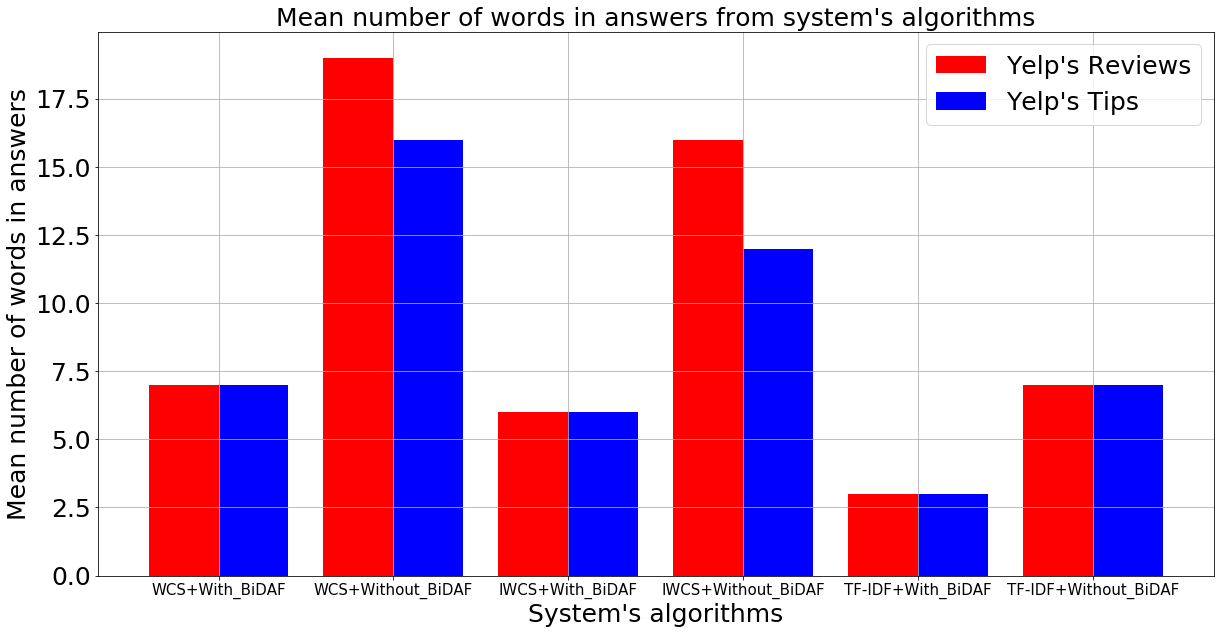

In [37]:
labels = ["WCS+With_BiDAF", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

mean_number_of_words_in_answers_from_reviews = [7, 19, 6, 16, 3, 7]
mean_number_of_words_in_answers_from_tips = [7, 16, 6, 12, 3, 7]

x = np.arange(len(labels))
width = 0.4

plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x - width/2, mean_number_of_words_in_answers_from_reviews,
        width, label="Yelp's Reviews", color="r")
plt.bar(x + width/2, mean_number_of_words_in_answers_from_tips,
        width, label="Yelp's Tips", color="b")

plt.xlabel("System's algorithms", fontsize=25)
plt.ylabel("Mean number of words in answers", fontsize=25)
plt.title("Mean number of words in answers from system's algorithms", fontsize=25)
plt.yticks(fontsize=25)
plt.xticks( np.arange(6), ("WCS+With_BiDAF", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=15)

plt.grid(True)
plt.legend(fontsize=25)
plt.show()

Answers' computation time

<Figure size 432x288 with 0 Axes>

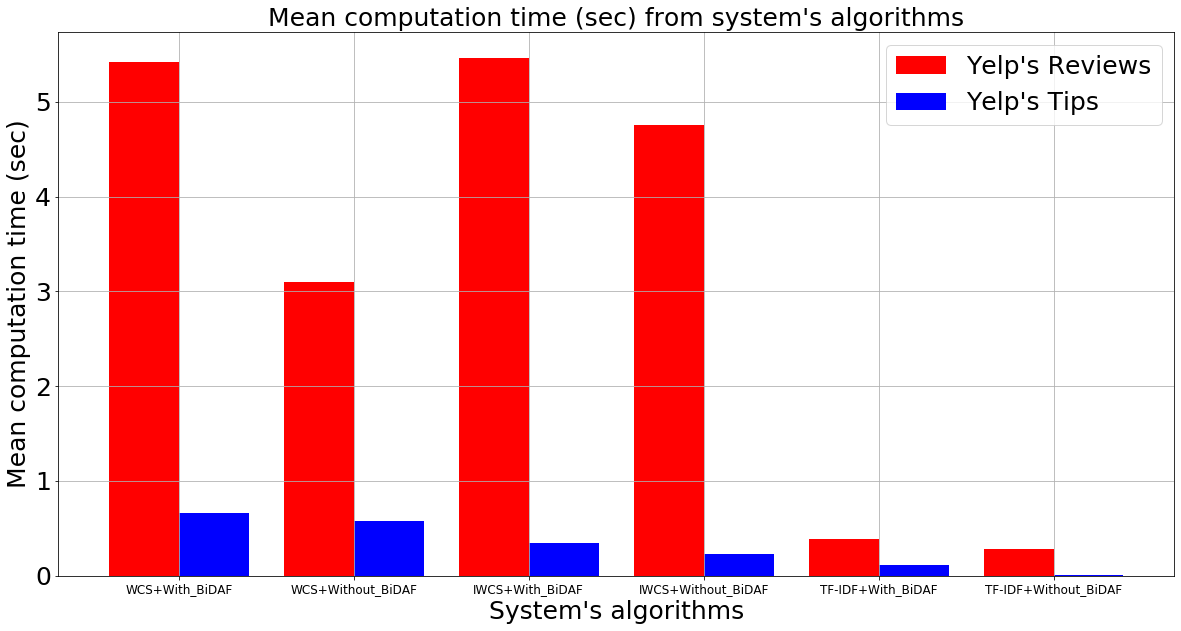

In [3]:
"""
labels = ["WCS+With_BiDAF", "WCS+With_BiDAF_R", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+With_BiDAF_R", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

mean_computation_time_from_reviews = [5.42, 6.37, 3.10, 5.46, 6.86, 4.75, 0.39, 0.28]
mean_computation_time_from_tips = [0.66, 2.62, 0.58, 0.35, 0.64, 0.23, 0.11, 0.01]
"""
labels = ["WCS+With_BiDAF", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

mean_computation_time_from_reviews = [5.42, 3.10, 5.46, 4.75, 0.39, 0.28]
mean_computation_time_from_tips = [0.66, 0.58, 0.35, 0.23, 0.11, 0.01]

x = np.arange(len(labels))
width = 0.4

plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x - width/2, mean_computation_time_from_reviews,
        width, label="Yelp's Reviews", color="r")
plt.bar(x + width/2, mean_computation_time_from_tips,
        width, label="Yelp's Tips", color="b")

plt.xlabel("System's algorithms", fontsize=25)
plt.ylabel("Mean computation time (sec)", fontsize=25)
plt.title("Mean computation time (sec) from system's algorithms", fontsize=25)
plt.yticks(fontsize=25)
"""
plt.xticks( np.arange(8), ("WCS+With_BiDAF", "WCS+With_BiDAF_R", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+With_BiDAF_R", "IWCS+Without_BiDAF",
                          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=12)
"""

plt.xticks( np.arange(6), ("WCS+With_BiDAF", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
                          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=12)

plt.grid(True)
plt.legend(fontsize=25)
plt.show()

<Figure size 432x288 with 0 Axes>

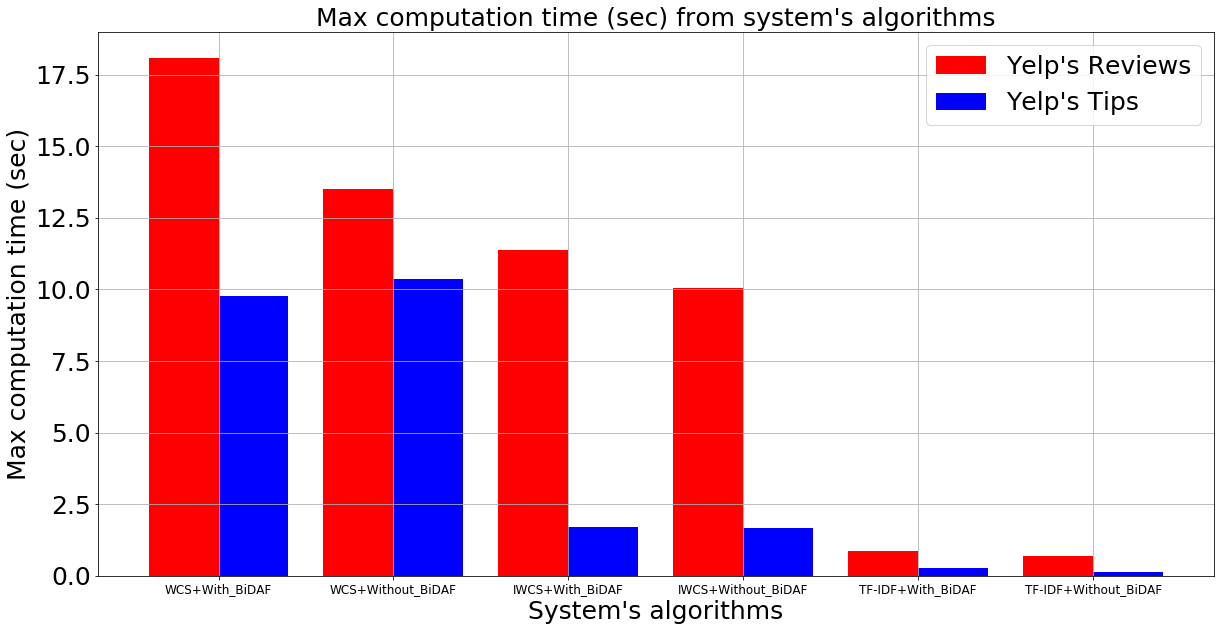

In [4]:
"""
labels = ["WCS+With_BiDAF", "WCS+With_BiDAF_R", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+With_BiDAF_R", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

max_computation_time_from_reviews = [18.08, 21.77, 13.52, 11.39, 23.76, 10.04, 0.86, 0.70]
max_computation_time_from_tips = [9.77, 219.23, 10.36, 1.71, 5.23, 1.68, 0.27, 0.15]
"""
labels = ["WCS+With_BiDAF", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

max_computation_time_from_reviews = [18.08, 13.52, 11.39, 10.04, 0.86, 0.70]
max_computation_time_from_tips = [9.77, 10.36, 1.71, 1.68, 0.27, 0.15]

x = np.arange(len(labels))
width = 0.4

plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x - width/2, max_computation_time_from_reviews,
        width, label="Yelp's Reviews", color="r")
plt.bar(x + width/2, max_computation_time_from_tips,
        width, label="Yelp's Tips", color="b")

plt.xlabel("System's algorithms", fontsize=25)
plt.ylabel("Max computation time (sec)", fontsize=25)
plt.title("Max computation time (sec) from system's algorithms", fontsize=25)
plt.yticks(fontsize=25)
"""
plt.xticks( np.arange(8), ("WCS+With_BiDAF", "WCS+With_BiDAF_R", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+With_BiDAF_R", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=12)
"""
plt.xticks( np.arange(6), ("WCS+With_BiDAF", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=12)

plt.grid(True)
plt.legend(fontsize=25)
plt.show()

<Figure size 432x288 with 0 Axes>

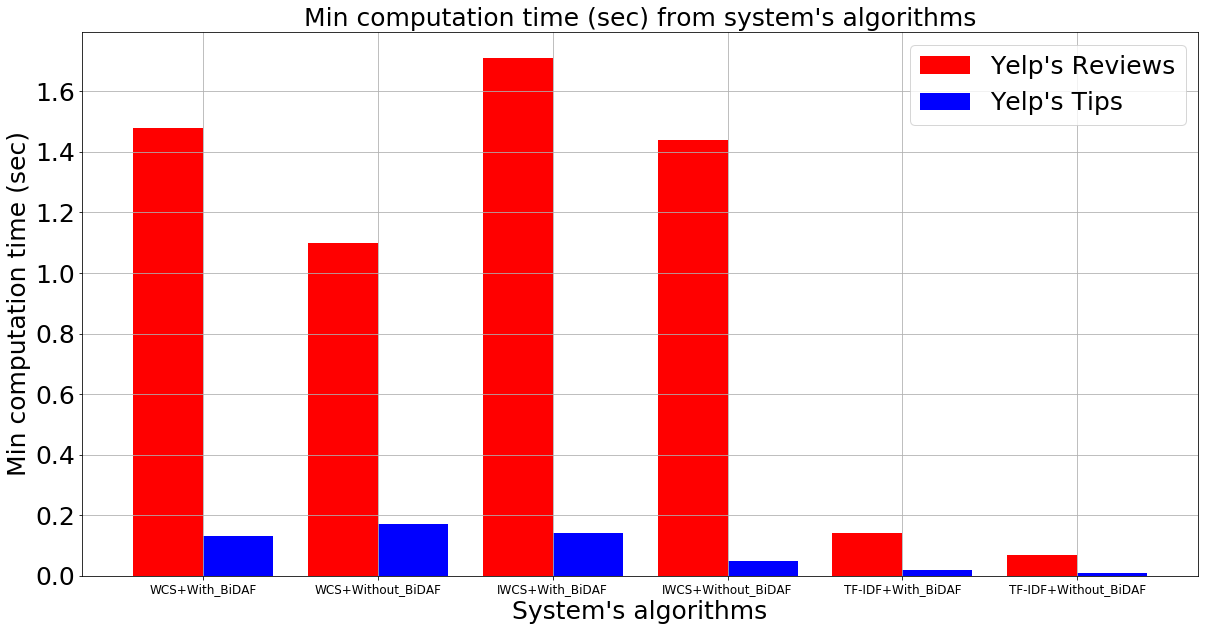

In [5]:
"""
labels = ["WCS+With_BiDAF", "WCS+With_BiDAF_R", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+With_BiDAF_R", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

min_computation_time_from_reviews = [1.48, 1.53, 1.10, 1.71, 2.64, 1.44, 0.14, 0.07]
min_computation_time_from_tips = [0.13, 0.19, 0.17, 0.14, 0.21, 0.05, 0.02, 0.01]
"""
labels = ["WCS+With_BiDAF", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

min_computation_time_from_reviews = [1.48, 1.10, 1.71, 1.44, 0.14, 0.07]
min_computation_time_from_tips = [0.13, 0.17, 0.14, 0.05, 0.02, 0.01]

x = np.arange(len(labels))
width = 0.4

plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x - width/2, min_computation_time_from_reviews,
        width, label="Yelp's Reviews", color="r")
plt.bar(x + width/2, min_computation_time_from_tips,
        width, label="Yelp's Tips", color="b")

plt.xlabel("System's algorithms", fontsize=25)
plt.ylabel("Min computation time (sec)", fontsize=25)
plt.title("Min computation time (sec) from system's algorithms", fontsize=25)
plt.yticks(fontsize=25)
"""
plt.xticks( np.arange(8), ("WCS+With_BiDAF", "WCS+With_BiDAF_R", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+With_BiDAF_R", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=12 )
"""
plt.xticks( np.arange(6), ("WCS+With_BiDAF", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=12 )

plt.grid(True)
plt.legend(fontsize=25)
plt.show()

Evaluation based on Yelp's answers

<Figure size 432x288 with 0 Axes>

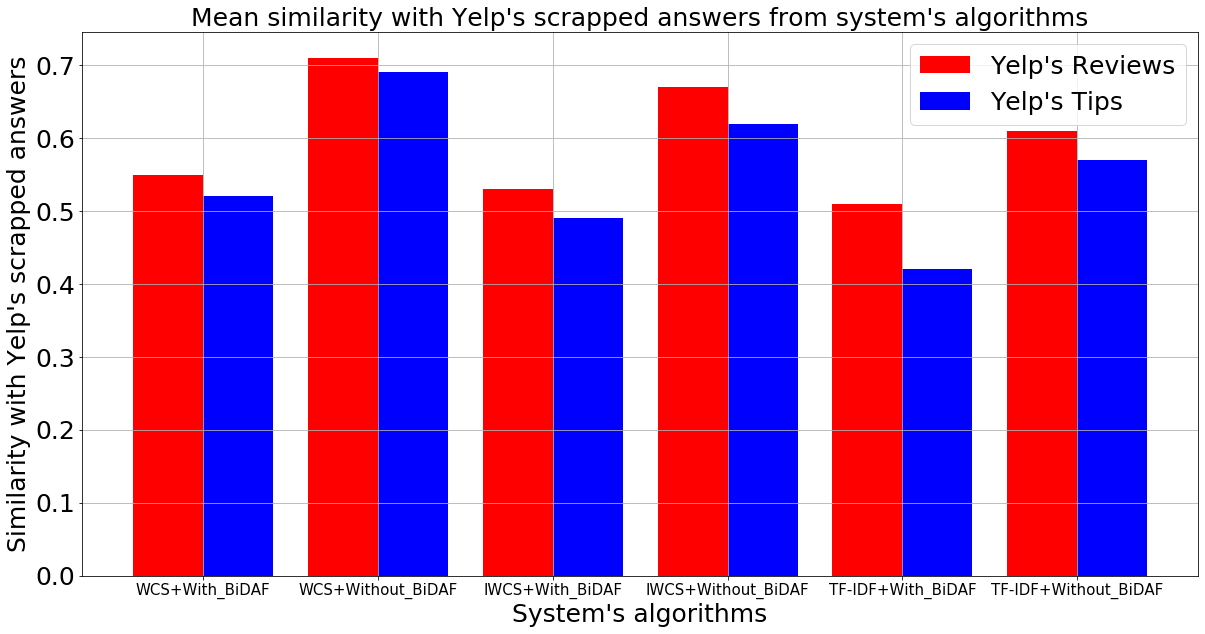

In [41]:
labels = ["WCS+With_BiDAF", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

mean_similarity_with_Yelps_scrapped_answers_from_reviews = [0.55, 0.71, 0.53, 0.67, 0.51, 0.61]
mean_similarity_with_Yelps_scrapped_answers_from_tips = [0.52, 0.69, 0.49, 0.62, 0.42, 0.57]

x = np.arange(len(labels))
width = 0.4

plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x - width/2, mean_similarity_with_Yelps_scrapped_answers_from_reviews,
        width, label="Yelp's Reviews", color="r")
plt.bar(x + width/2, mean_similarity_with_Yelps_scrapped_answers_from_tips,
        width, label="Yelp's Tips", color="b")

plt.xlabel("System's algorithms", fontsize=25)
plt.ylabel("Similarity with Yelp's scrapped answers", fontsize=25)
plt.title("Mean similarity with Yelp's scrapped answers from system's algorithms", fontsize=25)
plt.yticks(fontsize=25)
plt.xticks( np.arange(6), ("WCS+With_BiDAF", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=15)
plt.grid(True)
plt.legend(fontsize=25)
plt.show()

<Figure size 432x288 with 0 Axes>

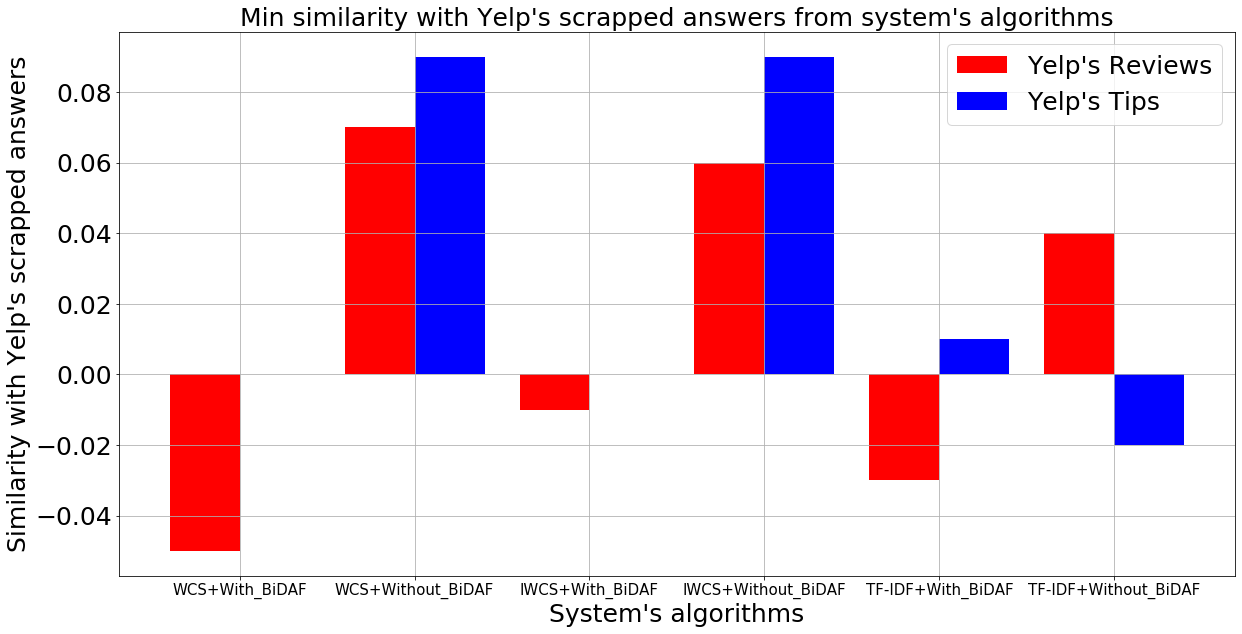

In [42]:
labels = ["WCS+With_BiDAF", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

min_similarity_with_Yelps_scrapped_answers_from_reviews = [-0.05, 0.07, -0.01, 0.06, -0.03, 0.04]
min_similarity_with_Yelps_scrapped_answers_from_tips = [0.00, 0.09, 0.00, 0.09, 0.01, -0.02]

x = np.arange(len(labels))
width = 0.4

plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x - width/2, min_similarity_with_Yelps_scrapped_answers_from_reviews,
        width, label="Yelp's Reviews", color="r")
plt.bar(x + width/2, min_similarity_with_Yelps_scrapped_answers_from_tips,
        width, label="Yelp's Tips", color="b")

plt.xlabel("System's algorithms", fontsize=25)
plt.ylabel("Similarity with Yelp's scrapped answers", fontsize=25)
plt.title("Min similarity with Yelp's scrapped answers from system's algorithms", fontsize=25)
plt.yticks(fontsize=25)
plt.xticks( np.arange(6), ("WCS+With_BiDAF", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=15)
plt.grid(True)
plt.legend(fontsize=25)
plt.show()

<Figure size 432x288 with 0 Axes>

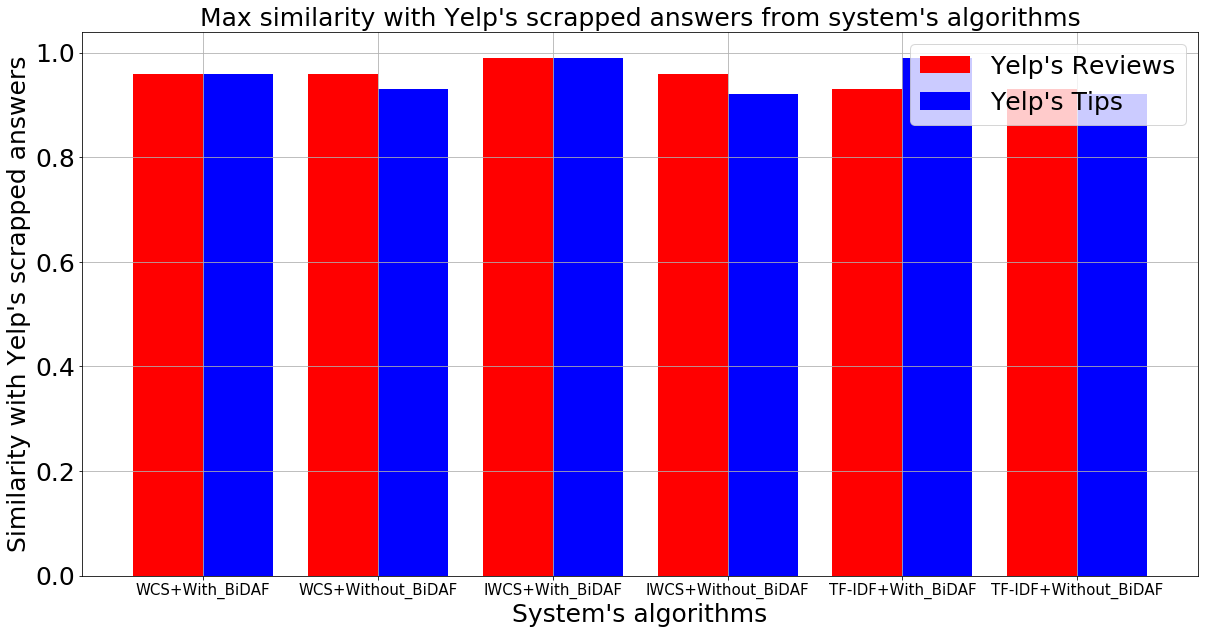

In [43]:
labels = ["WCS+With_BiDAF", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

max_similarity_with_Yelps_scrapped_answers_from_reviews = [0.96, 0.96, 0.99, 0.96, 0.93, 0.93]
max_similarity_with_Yelps_scrapped_answers_from_tips = [0.96, 0.93, 0.99, 0.92, 0.99, 0.92]

x = np.arange(len(labels))
width = 0.4

plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x - width/2, max_similarity_with_Yelps_scrapped_answers_from_reviews,
        width, label="Yelp's Reviews", color="r")
plt.bar(x + width/2, max_similarity_with_Yelps_scrapped_answers_from_tips,
        width, label="Yelp's Tips", color="b")

plt.xlabel("System's algorithms", fontsize=25)
plt.ylabel("Similarity with Yelp's scrapped answers", fontsize=25)
plt.title("Max similarity with Yelp's scrapped answers from system's algorithms", fontsize=25)
plt.yticks(fontsize=25)
plt.xticks( np.arange(6), ("WCS+With_BiDAF", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=15)
plt.grid(True)
plt.legend(fontsize=25)
plt.show()

<Figure size 432x288 with 0 Axes>

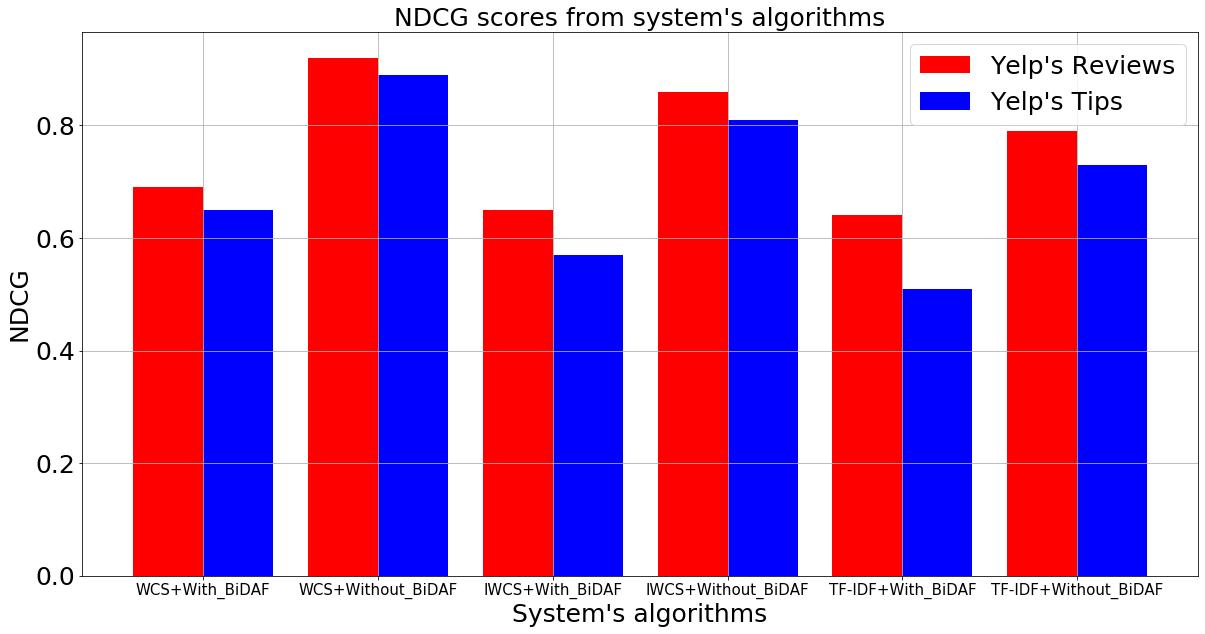

In [44]:
labels = ["WCS+With_BiDAF", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

ndcg_from_reviews = [0.69, 0.92, 0.65, 0.86, 0.64, 0.79]
ndcg_from_tips = [0.65, 0.89, 0.57, 0.81, 0.51, 0.73]

x = np.arange(len(labels))
width = 0.4

plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x - width/2, ndcg_from_reviews,
        width, label="Yelp's Reviews", color="r")
plt.bar(x + width/2, ndcg_from_tips,
        width, label="Yelp's Tips", color="b")

plt.xlabel("System's algorithms", fontsize=25)
plt.ylabel("NDCG", fontsize=25)
plt.title("NDCG scores from system's algorithms", fontsize=25)
plt.yticks(fontsize=25)
plt.xticks( np.arange(6), ("WCS+With_BiDAF", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=15)
plt.grid(True)
plt.legend(fontsize=25)
plt.show()

<Figure size 432x288 with 0 Axes>

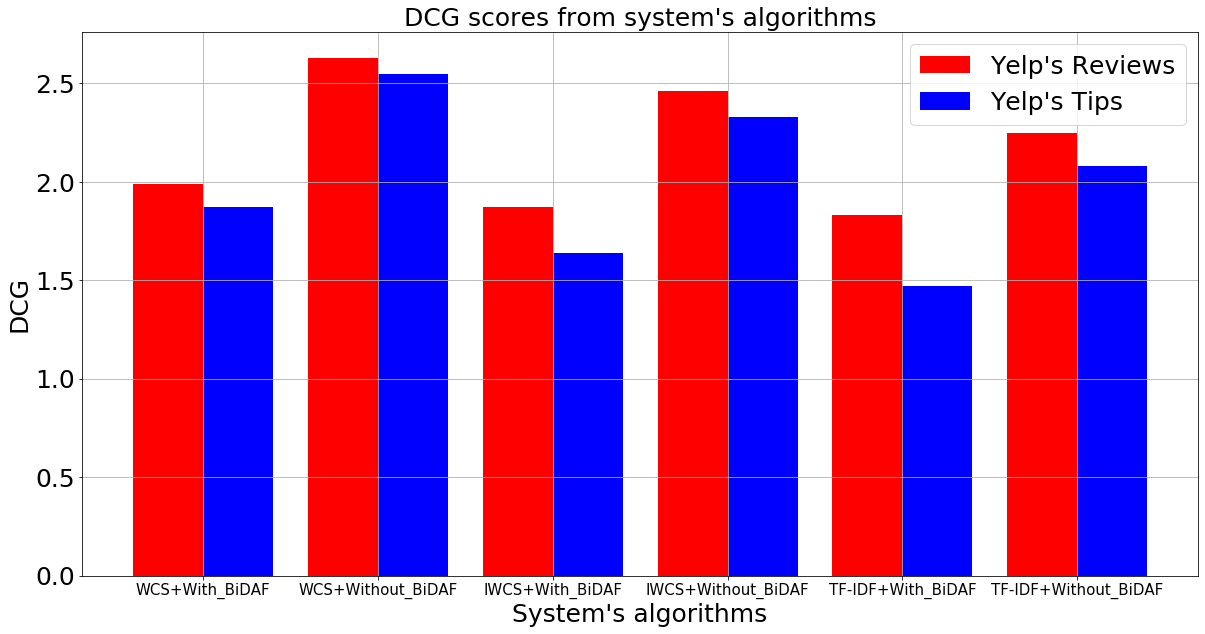

In [45]:
labels = ["WCS+With_BiDAF", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

dcg_from_reviews = [1.99, 2.63, 1.87, 2.46, 1.83, 2.25]
dcg_from_tips = [1.87, 2.55, 1.64, 2.33, 1.47, 2.08]

x = np.arange(len(labels))
width = 0.4

plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x - width/2, dcg_from_reviews,
        width, label="Yelp's Reviews", color="r")
plt.bar(x + width/2, dcg_from_tips,
        width, label="Yelp's Tips", color="b")

plt.xlabel("System's algorithms", fontsize=25)
plt.ylabel("DCG", fontsize=25)
plt.title("DCG scores from system's algorithms", fontsize=25)
plt.yticks(fontsize=25)
plt.xticks( np.arange(6), ("WCS+With_BiDAF", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=15)
plt.grid(True)
plt.legend(fontsize=25)
plt.show()

Evaluation based on Aram's ratings

<Figure size 432x288 with 0 Axes>

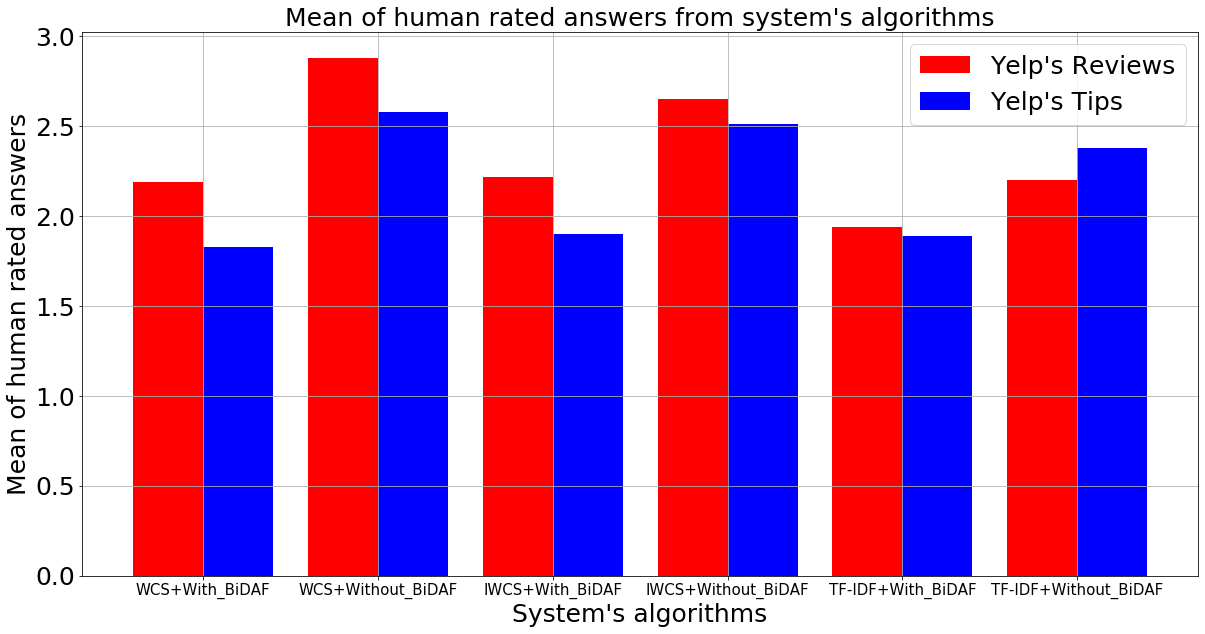

In [46]:
labels = ["WCS+With_BiDAF", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

mean_of_human_rated_answers_from_reviews = [2.19, 2.88, 2.22, 2.65, 1.94, 2.20]
mean_of_human_rated_answers_from_tips = [1.83, 2.58, 1.90, 2.51, 1.89, 2.38]

x = np.arange(len(labels))
width = 0.4

plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x - width/2, mean_of_human_rated_answers_from_reviews, width, label="Yelp's Reviews", color="r")
plt.bar(x + width/2, mean_of_human_rated_answers_from_tips, width, label="Yelp's Tips", color="b")

plt.xlabel("System's algorithms", fontsize=25)
plt.ylabel("Mean of human rated answers", fontsize=25)
plt.title("Mean of human rated answers from system's algorithms", fontsize=25)
plt.yticks(fontsize=25)
plt.xticks( np.arange(6), ("WCS+With_BiDAF", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=15)
plt.grid(True)
plt.legend(fontsize=25)
plt.show()

<Figure size 432x288 with 0 Axes>

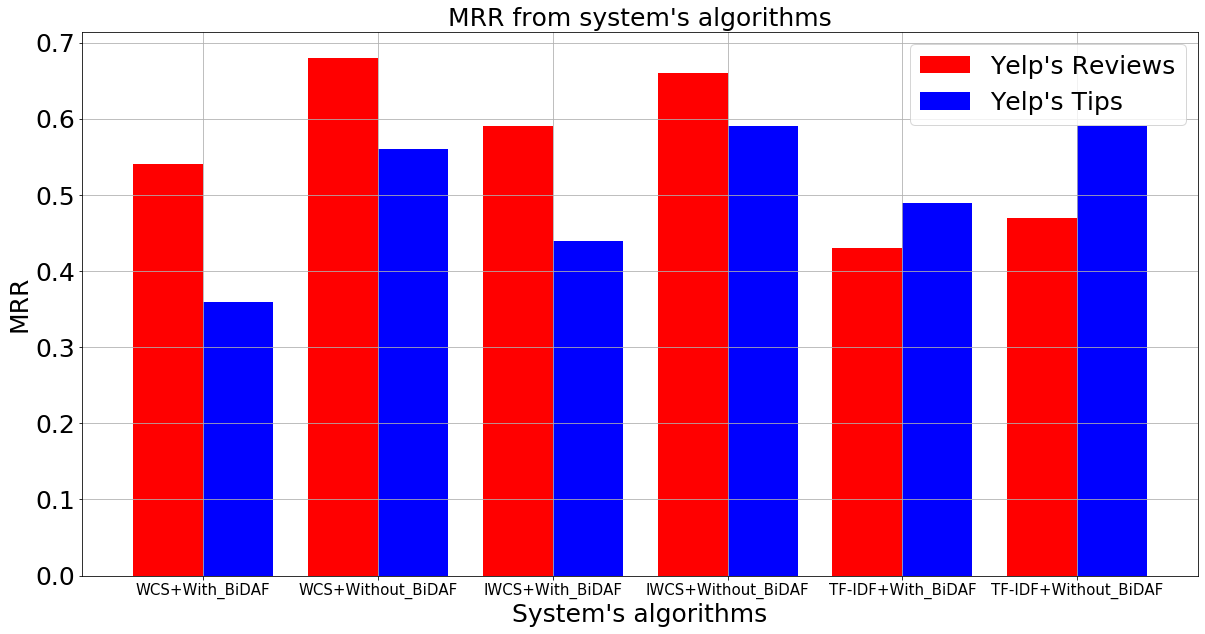

In [47]:
labels = ["WCS+With_BiDAF", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

mrr_reviews = [0.54, 0.68, 0.59, 0.66, 0.43, 0.47]
mrr_tips = [0.36, 0.56, 0.44, 0.59, 0.49, 0.59]

x = np.arange(len(labels))
width = 0.4

plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x - width/2, mrr_reviews, width, label="Yelp's Reviews", color="r")
plt.bar(x + width/2, mrr_tips, width, label="Yelp's Tips", color="b")

plt.xlabel("System's algorithms", fontsize=25)
plt.ylabel("MRR", fontsize=25)
plt.title("MRR from system's algorithms", fontsize=25)
plt.yticks(fontsize=25)
plt.xticks( np.arange(6), ("WCS+With_BiDAF", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=15)
plt.grid(True)
plt.legend(fontsize=25)
plt.show()

<Figure size 432x288 with 0 Axes>

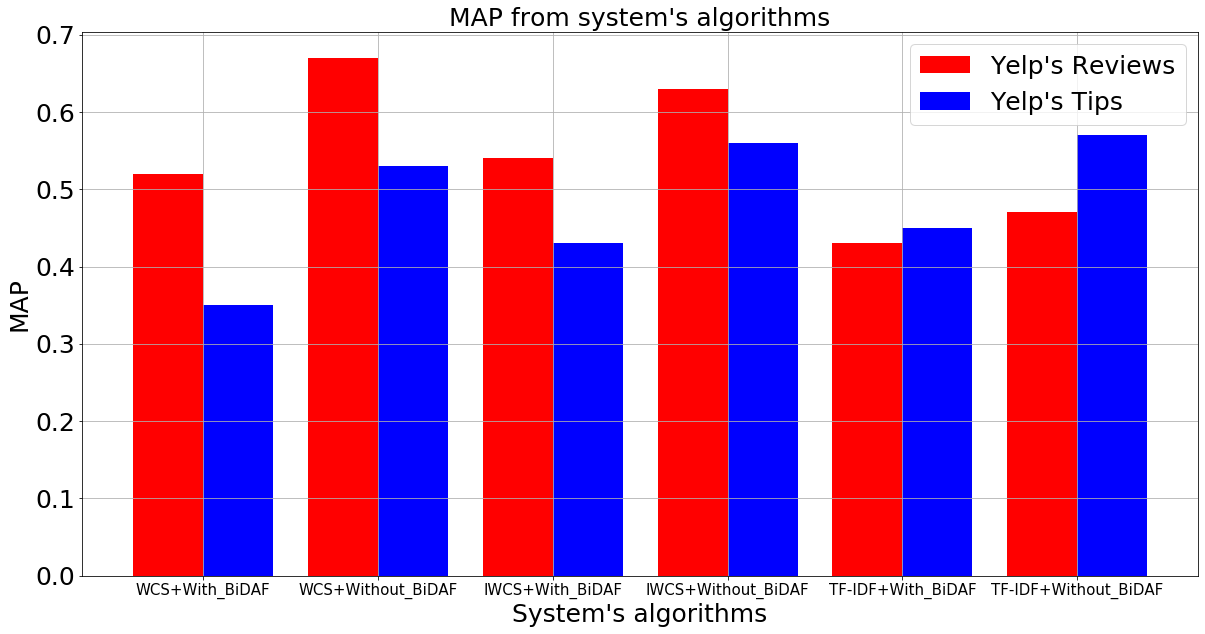

In [48]:
labels = ["WCS+With_BiDAF", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

map_reviews = [0.52, 0.67, 0.54, 0.63, 0.43, 0.47]
map_tips = [0.35, 0.53, 0.43, 0.56, 0.45, 0.57]

x = np.arange(len(labels))
width = 0.4

plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x - width/2, map_reviews, width, label="Yelp's Reviews", color="r")
plt.bar(x + width/2, map_tips, width, label="Yelp's Tips", color="b")

plt.xlabel("System's algorithms", fontsize=25)
plt.ylabel("MAP", fontsize=25)
plt.title("MAP from system's algorithms", fontsize=25)
plt.yticks(fontsize=25)
plt.xticks( np.arange(6), ("WCS+With_BiDAF", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=15)
plt.grid(True)
plt.legend(fontsize=25)
plt.show()

<Figure size 432x288 with 0 Axes>

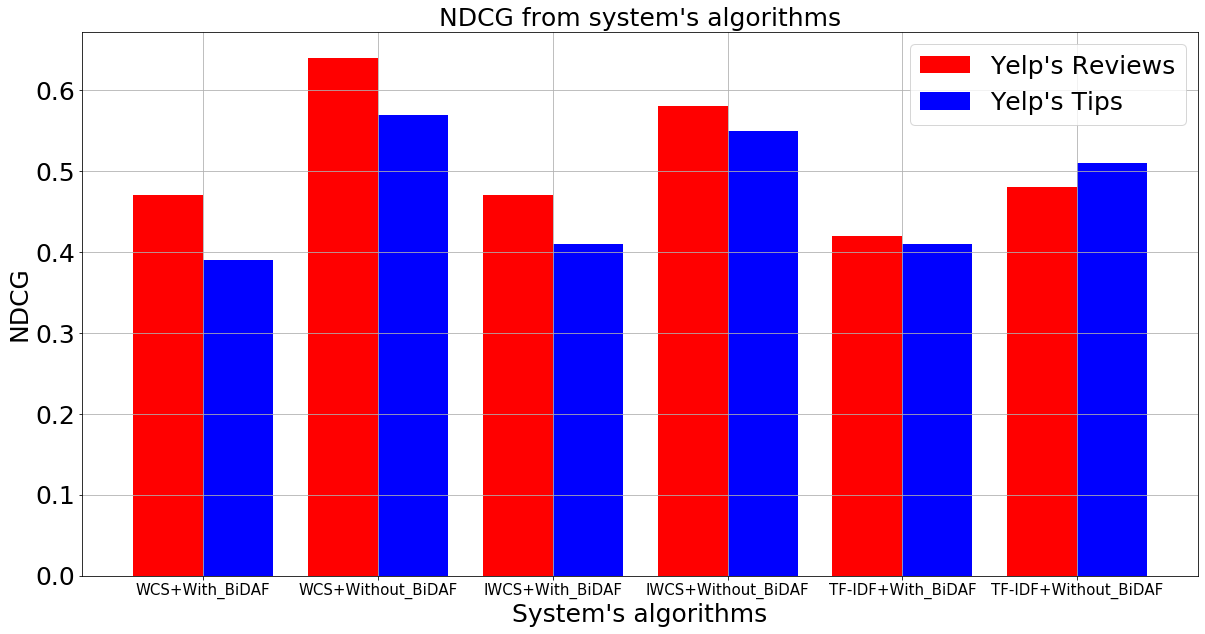

In [49]:
labels = ["WCS+With_BiDAF", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

NDCG_reviews = [0.47, 0.64, 0.47, 0.58, 0.42, 0.48]
NDCG_tips = [0.39, 0.57, 0.41, 0.55, 0.41, 0.51]

x = np.arange(len(labels))
width = 0.4

plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x - width/2, NDCG_reviews, width, label="Yelp's Reviews", color="r")
plt.bar(x + width/2, NDCG_tips, width, label="Yelp's Tips", color="b")

plt.xlabel("System's algorithms", fontsize=25)
plt.ylabel("NDCG", fontsize=25)
plt.title("NDCG from system's algorithms", fontsize=25)
plt.yticks(fontsize=25)
plt.xticks( np.arange(6), ("WCS+With_BiDAF", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=15)
plt.grid(True)
plt.legend(fontsize=25)
plt.show()

<Figure size 432x288 with 0 Axes>

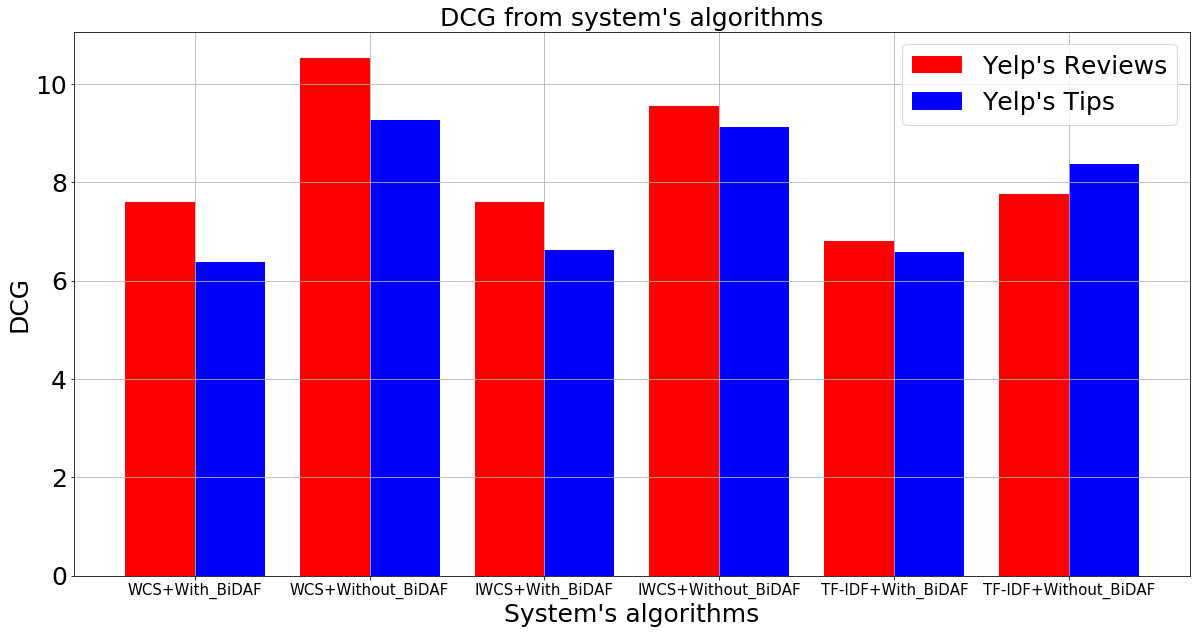

In [50]:
labels = ["WCS+With_BiDAF", "WCS+Without_BiDAF",
          "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
          "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"]

DCG_reviews = [7.60, 10.53, 7.60, 9.56, 6.80, 7.76]
DCG_tips = [6.38, 9.26, 6.63, 9.12, 6.59, 8.37]

x = np.arange(len(labels))
width = 0.4

plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x - width/2, DCG_reviews, width, label="Yelp's Reviews", color="r")
plt.bar(x + width/2, DCG_tips, width, label="Yelp's Tips", color="b")

plt.xlabel("System's algorithms", fontsize=25)
plt.ylabel("DCG", fontsize=25)
plt.title("DCG from system's algorithms", fontsize=25)
plt.yticks(fontsize=25)
plt.xticks( np.arange(6), ("WCS+With_BiDAF", "WCS+Without_BiDAF",
                           "IWCS+With_BiDAF", "IWCS+Without_BiDAF",
                           "TF-IDF+With_BiDAF", "TF-IDF+Without_BiDAF"), fontsize=15)
plt.grid(True)
plt.legend(fontsize=25)
plt.show()